Streaming output truncated to the last 5000 lines.
q2 1.1808002873441692
-1.0471975511965979 1.0471975511965979
[[ 0.22714926]
 [-0.01689384]]
(4, 1)
(4, 1)
q1 -1.089389833739799
q2 1.1808066831016382
-1.0471975511965979 1.0471975511965979
[[ 0.22704836]
 [-0.01728903]]
q1 -1.0882545919642839
q2 1.1807202379432673
-1.0471975511965979 1.0471975511965979
[[ 0.21583265]
 [-0.1379999 ]]
q1 -1.0883106704898957
q2 1.1801166836251076
-1.0471975511965979 1.0471975511965979
[[ 0.21548814]
 [-0.13810663]]
q1 -1.087234952332423
q2 1.1794256168097907
-1.0471975511965979 1.0471975511965979
[[ 0.20424202]
 [-0.2577083 ]]
(4, 1)
(4, 1)
q1 -1.0872332804772893
q2 1.1794279991359549
-1.0471975511965979 1.0471975511965979
[[ 0.20413768]
 [-0.25811296]]
q1 -1.086212592101139
q2 1.1781374343174473
-1.0471975511965979 1.0471975511965979
[[ 0.19254702]
 [-0.37782208]]
q1 -1.0862705453771178
q2 1.1775388887517062
-1.0471975511965979 1.0471975511965979
[[ 0.19251517]
 [-0.37671569]]
q1 -1.0853081287447097
q2 1

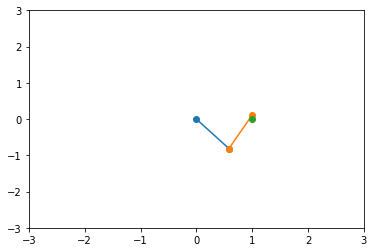

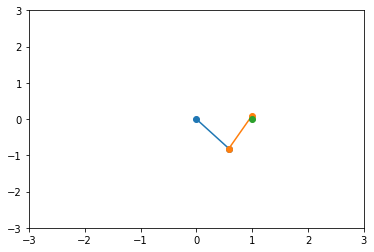

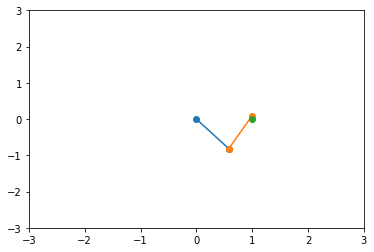

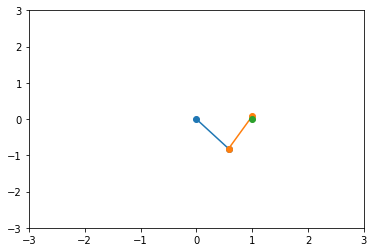

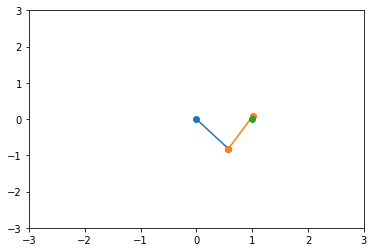

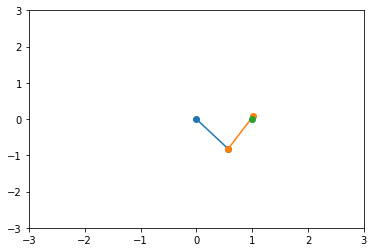

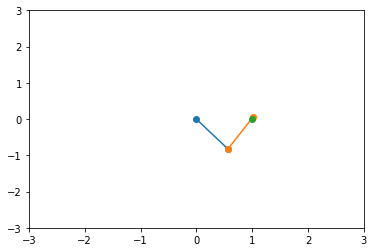

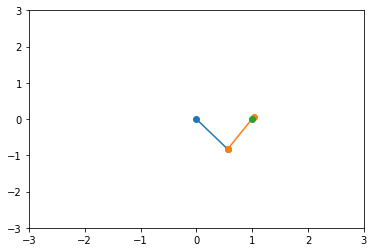

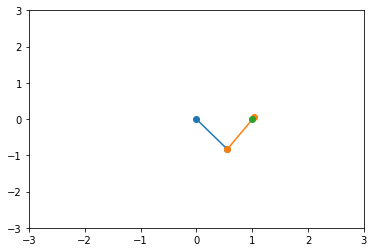

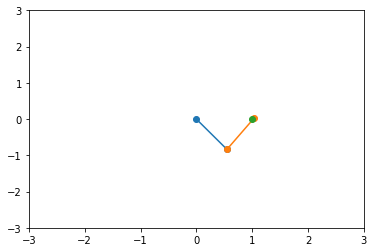

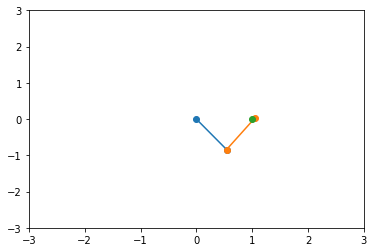

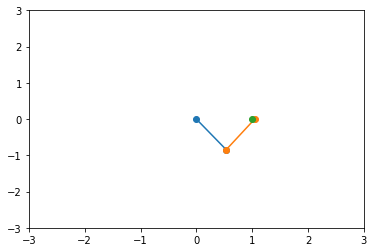

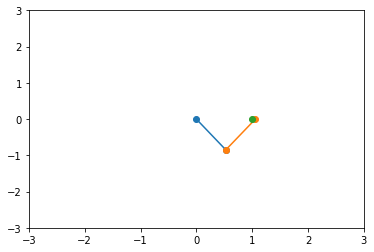

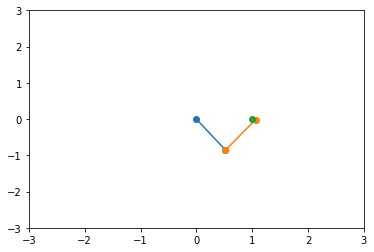

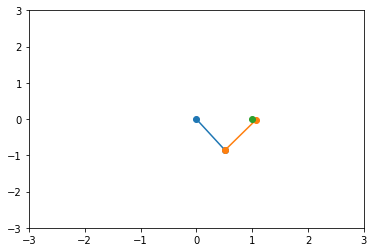

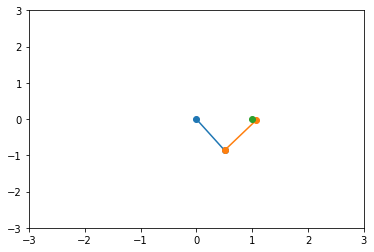

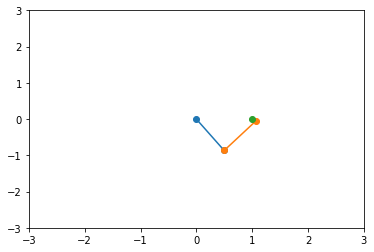

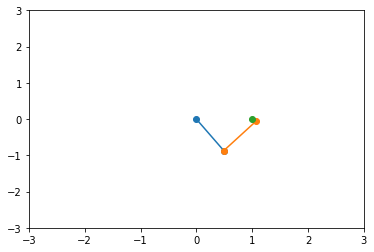

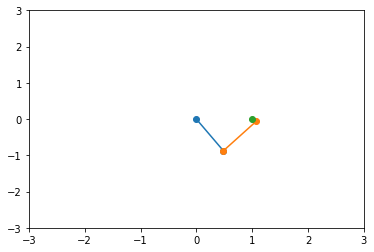

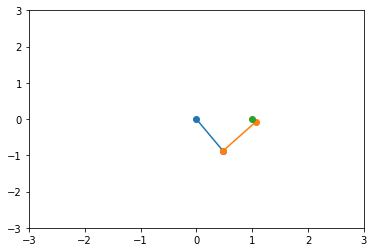

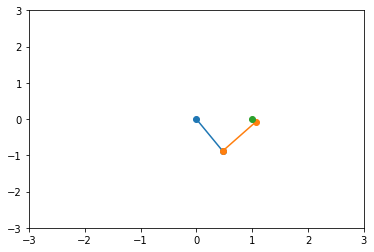

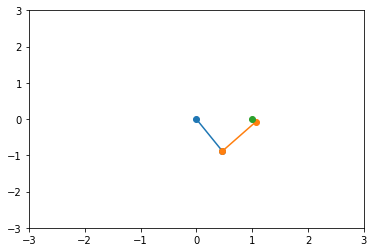

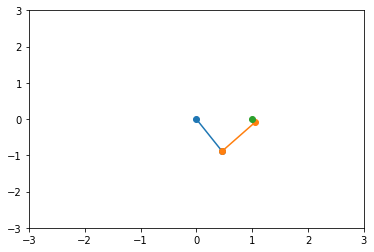

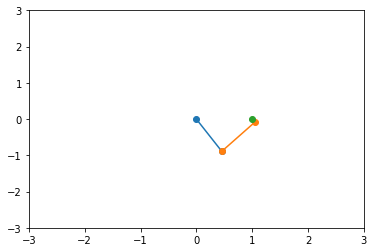

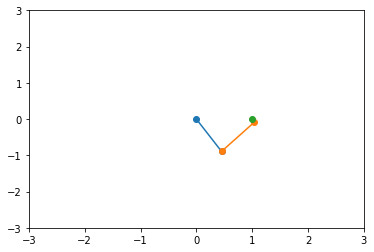

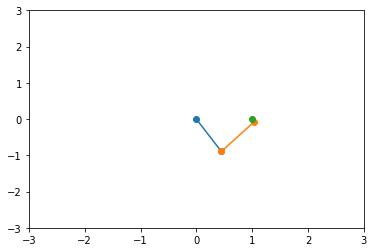

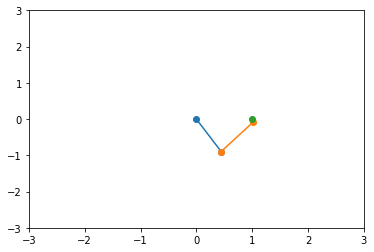

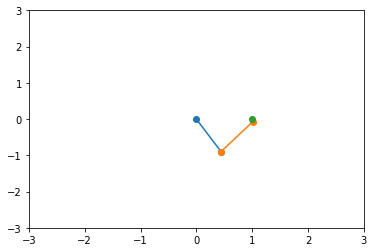

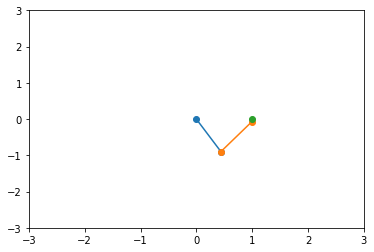

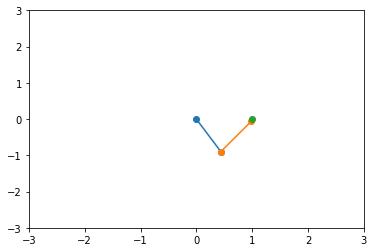

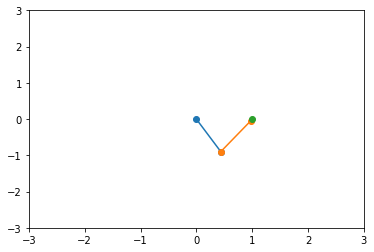

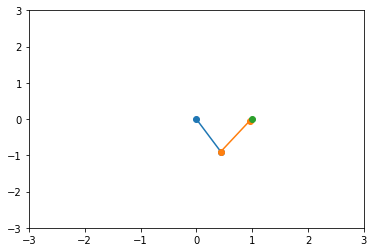

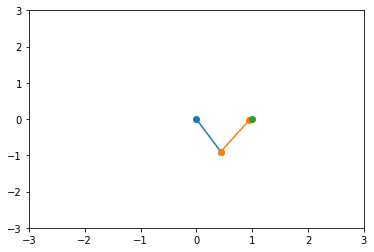

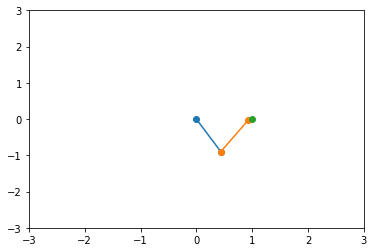

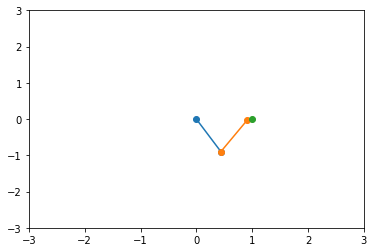

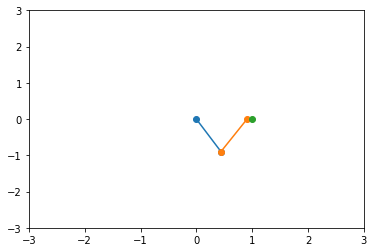

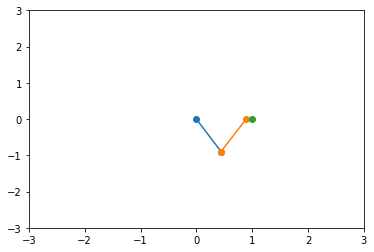

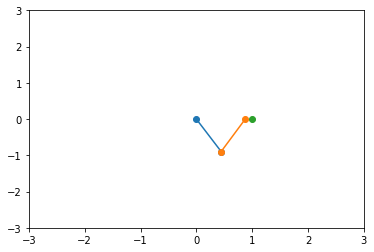

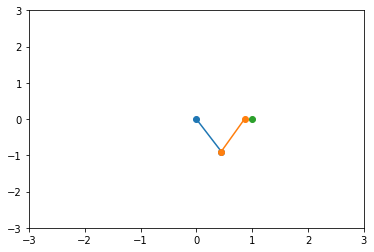

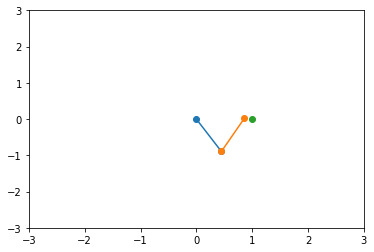

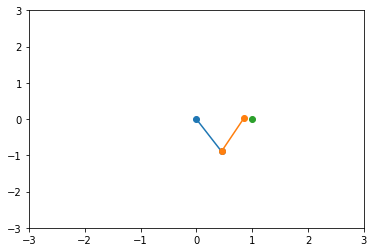

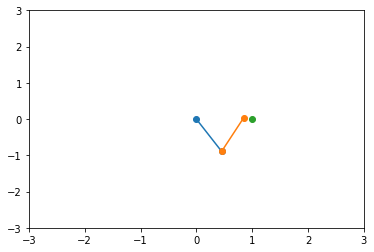

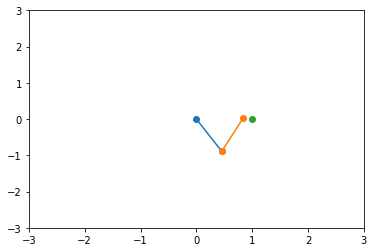

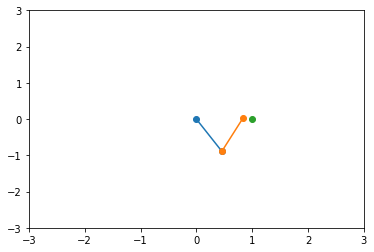

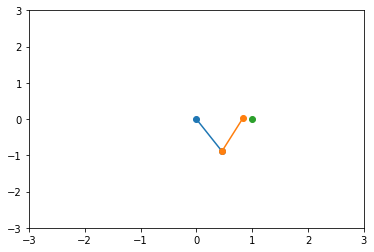

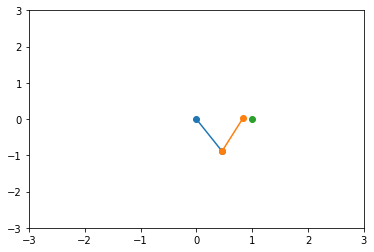

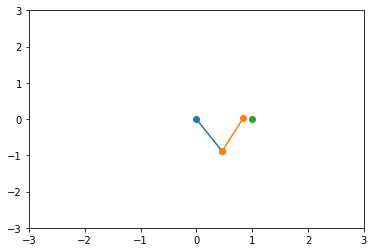

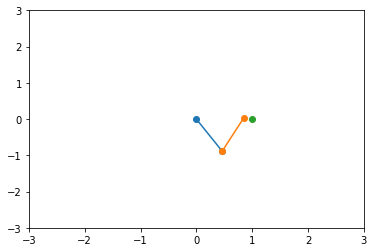

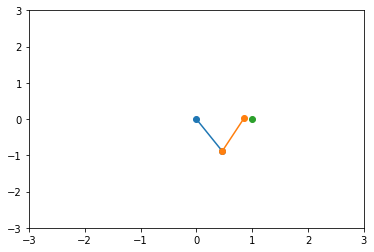

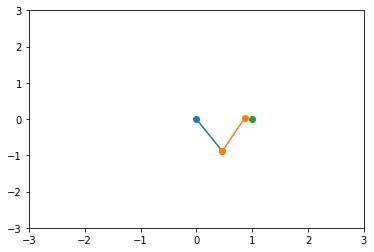

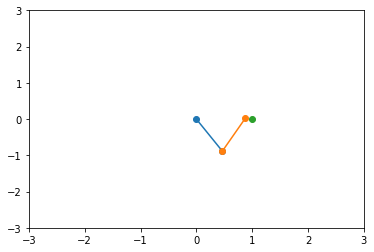

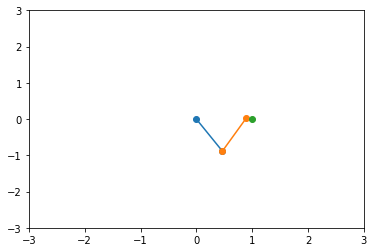

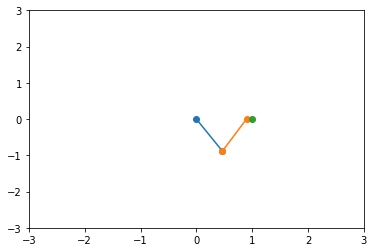

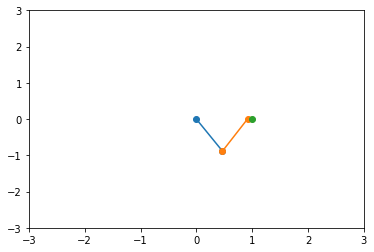

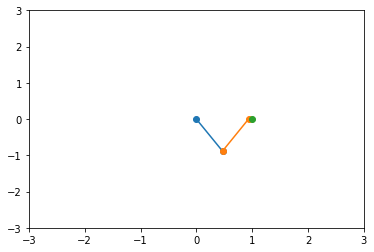

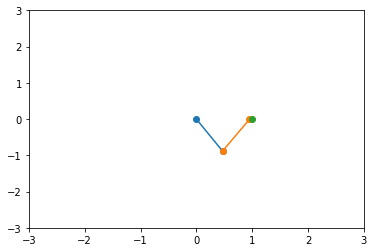

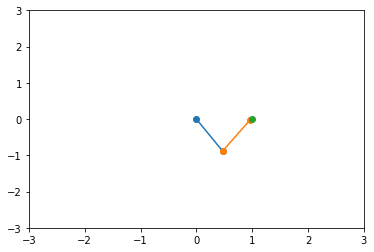

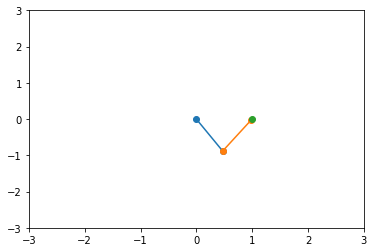

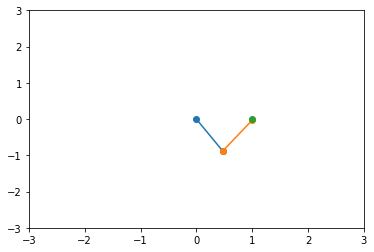

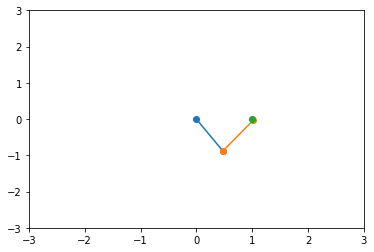

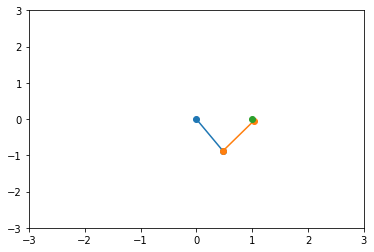

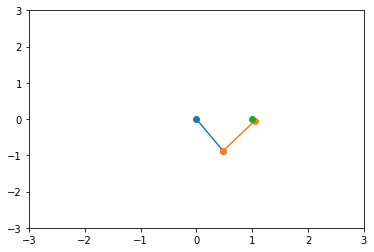

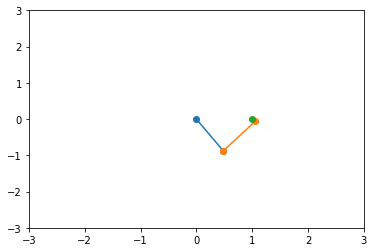

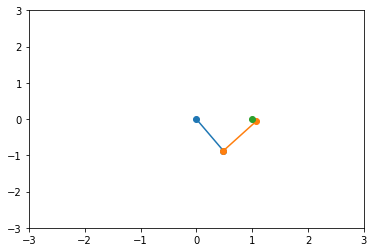

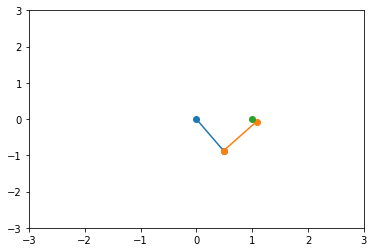

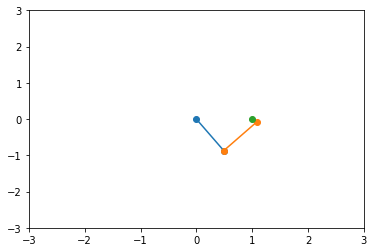

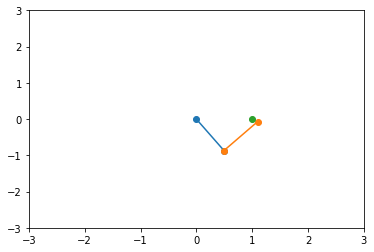

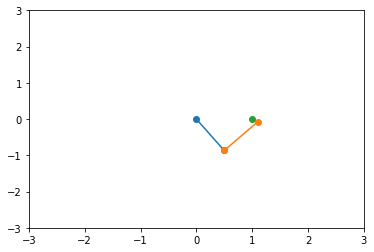

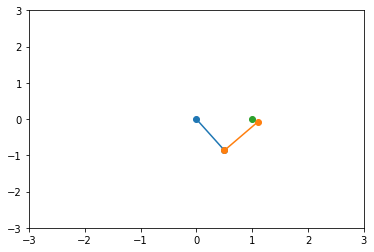

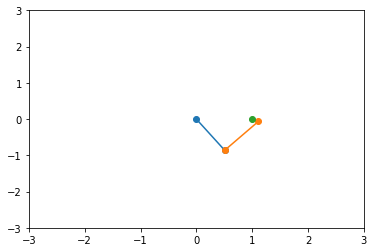

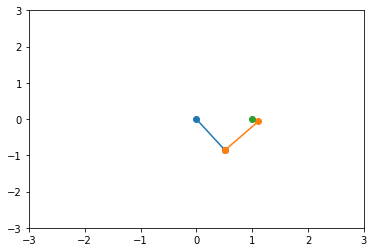

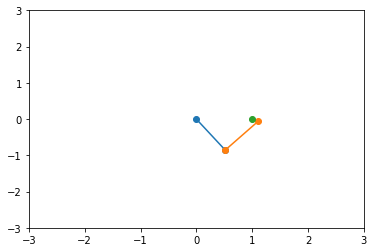

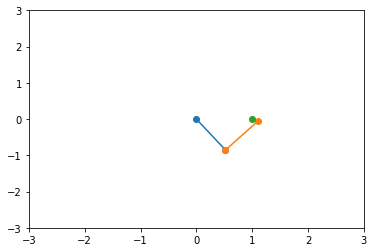

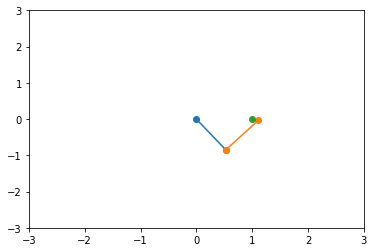

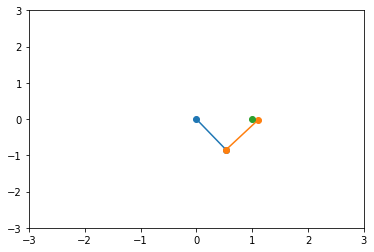

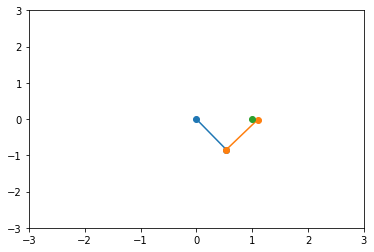

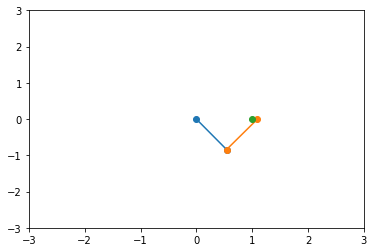

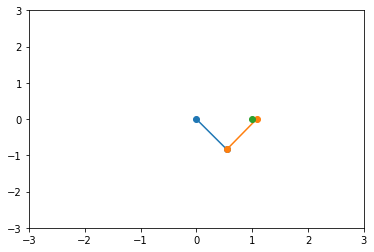

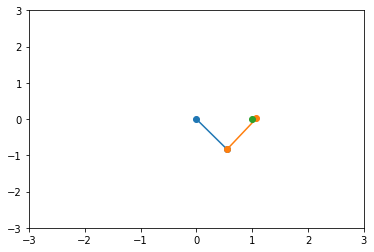

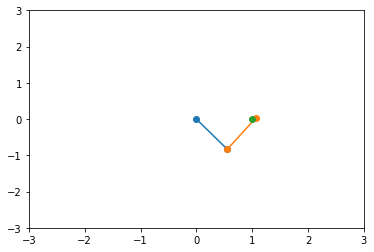

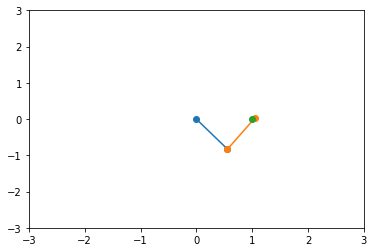

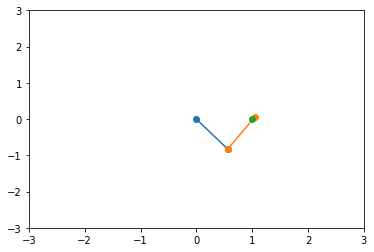

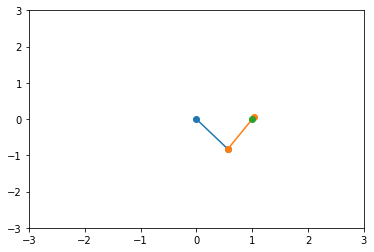

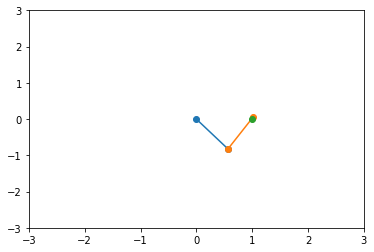

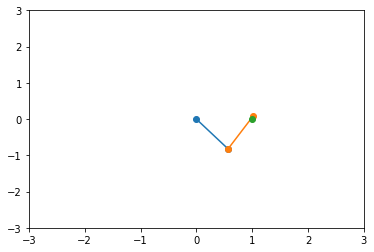

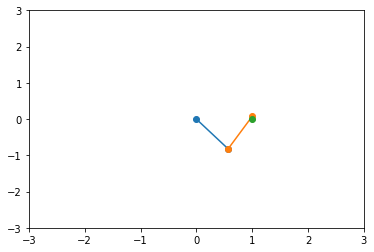

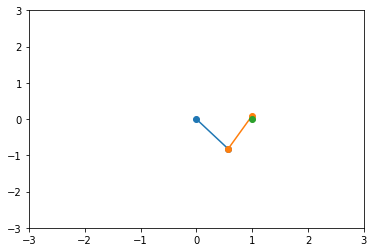

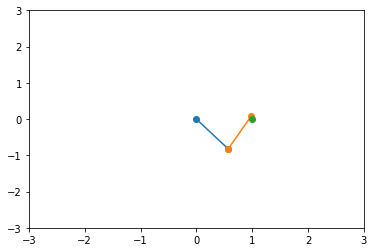

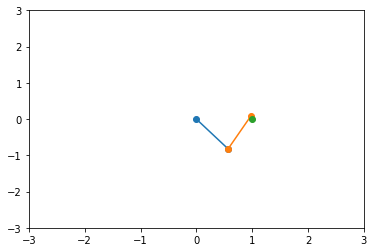

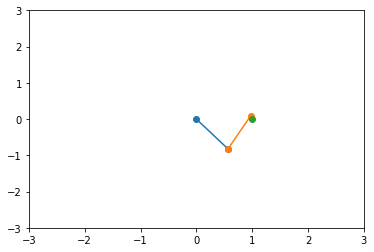

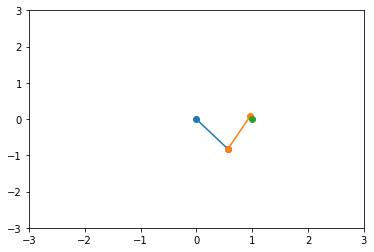

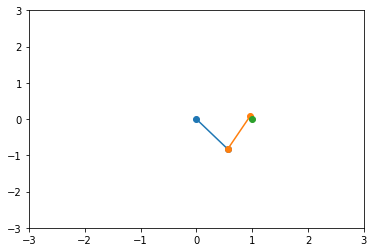

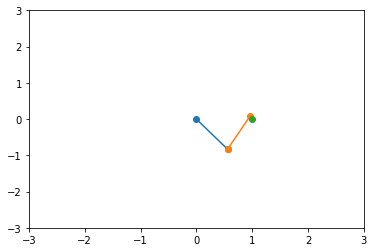

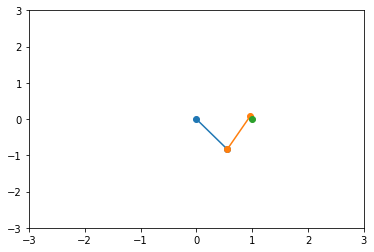

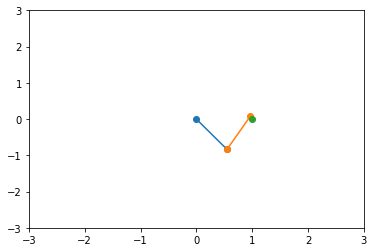

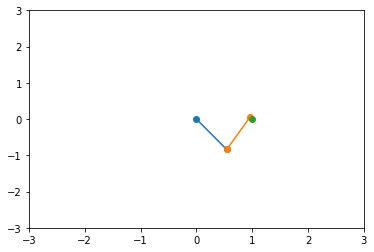

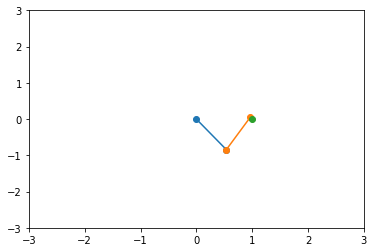

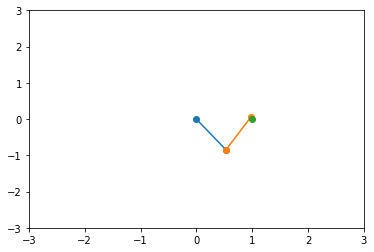

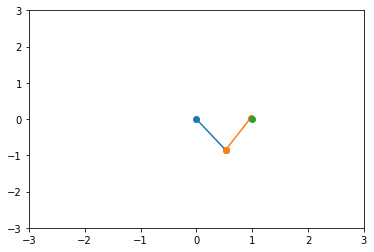

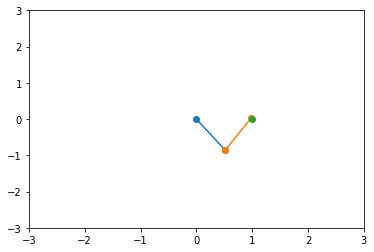

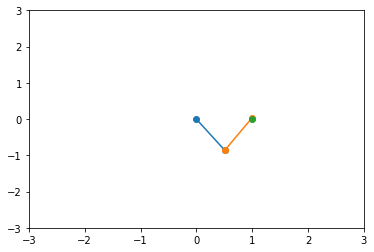

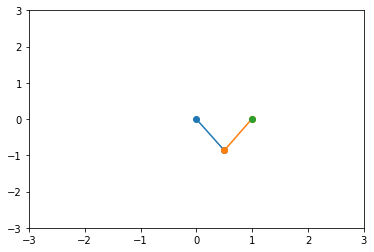

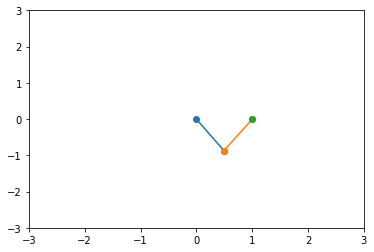

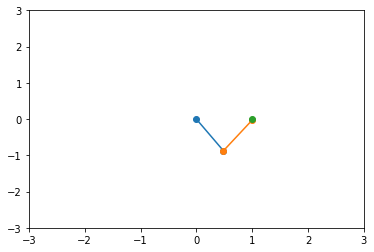

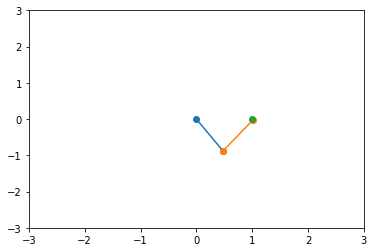

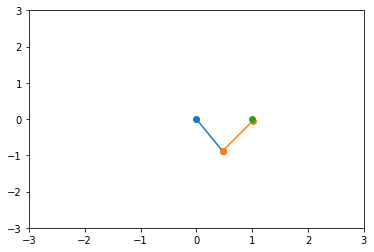

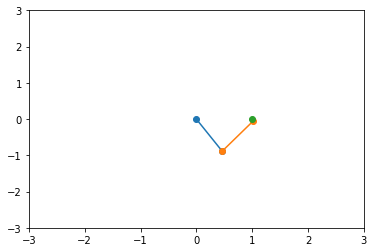

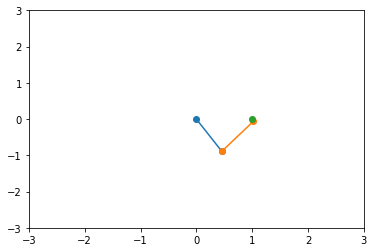

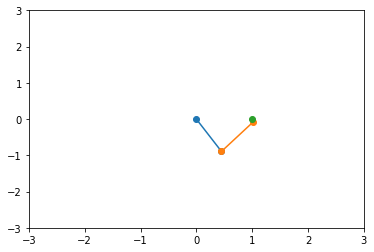

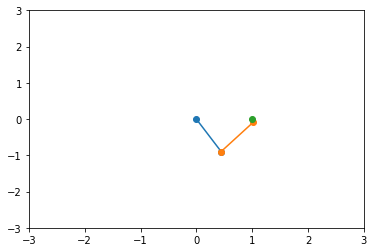

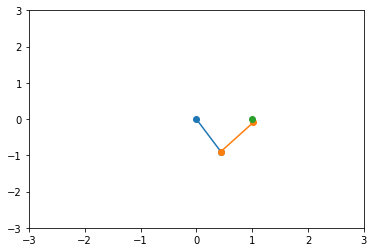

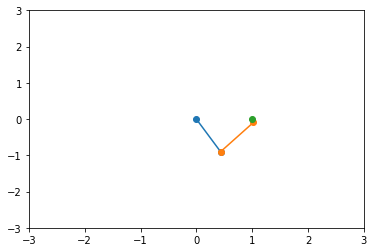

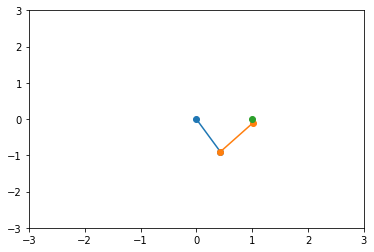

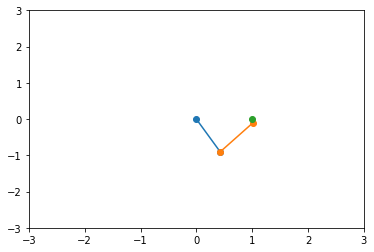

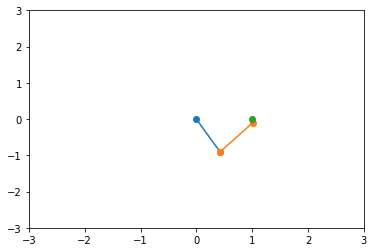

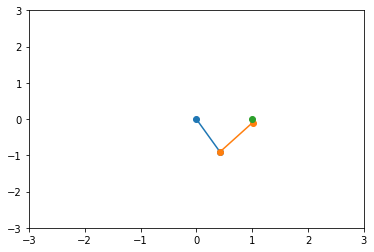

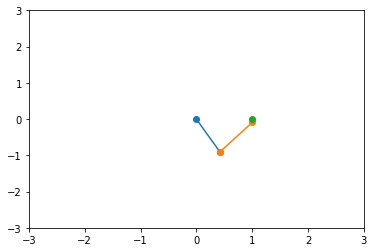

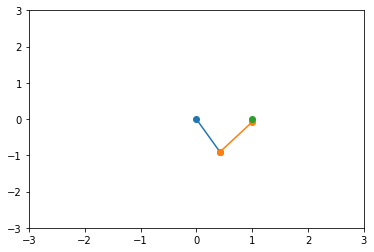

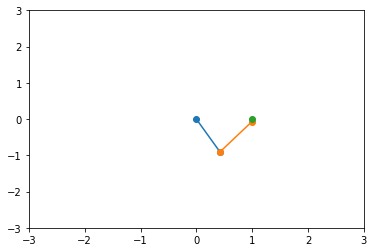

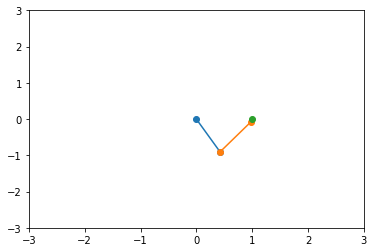

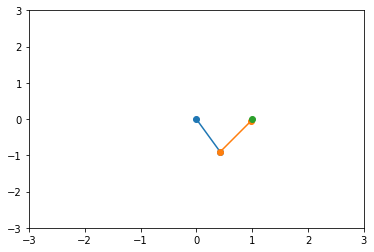

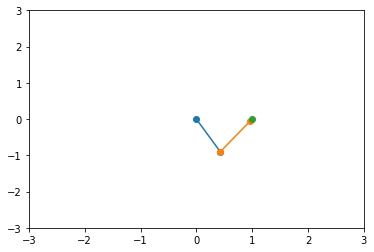

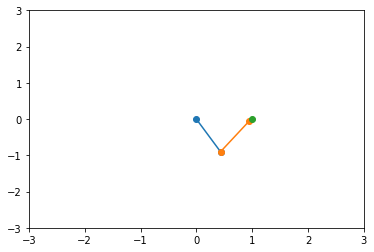

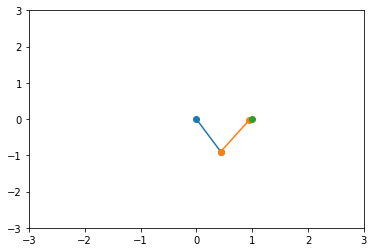

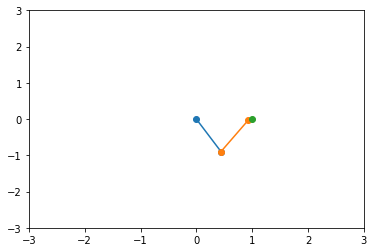

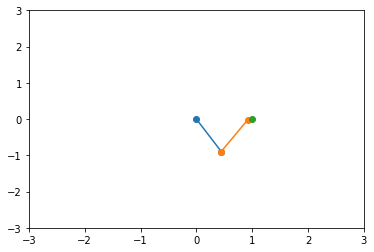

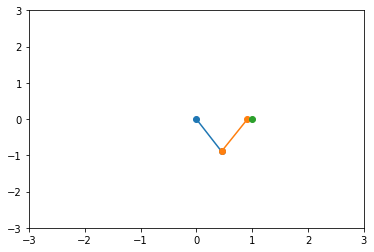

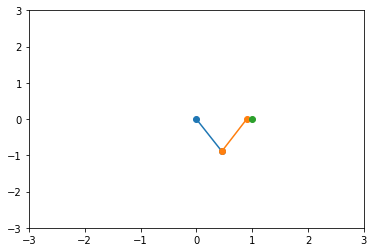

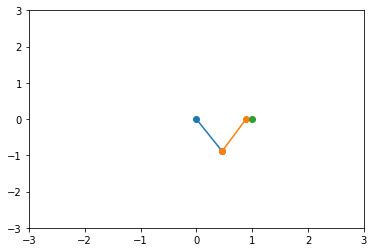

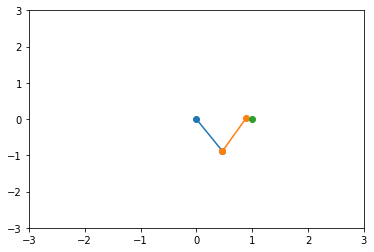

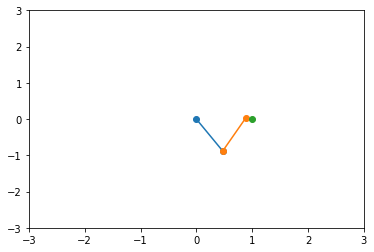

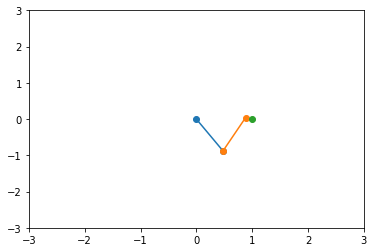

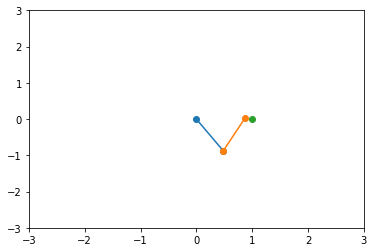

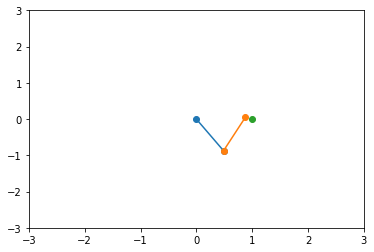

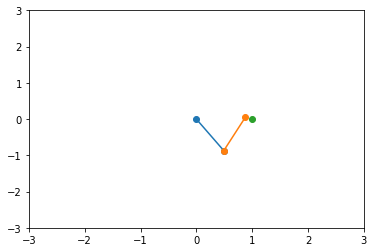

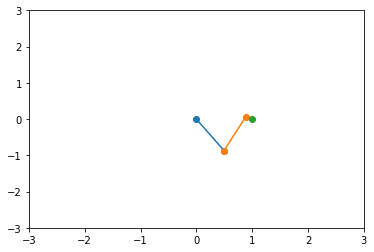

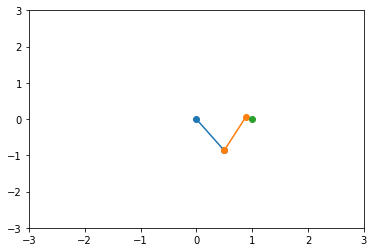

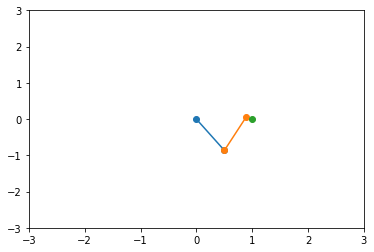

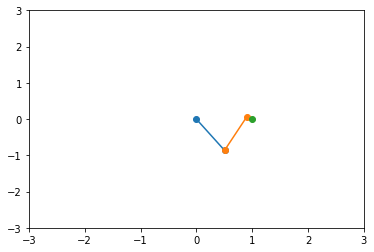

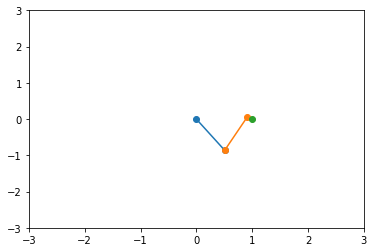

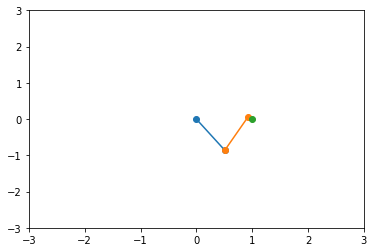

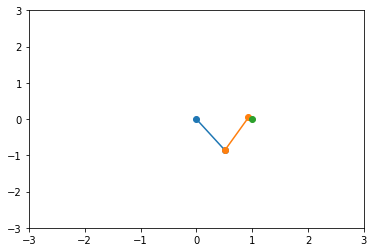

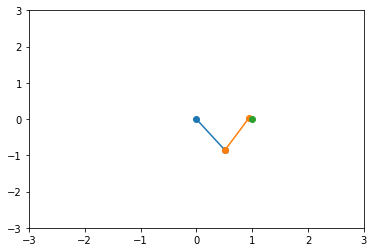

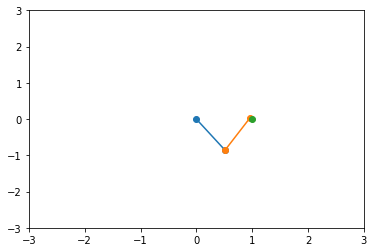

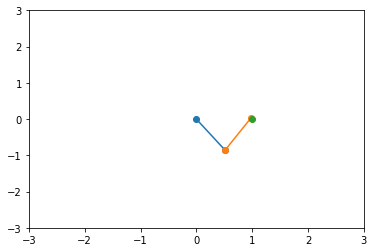

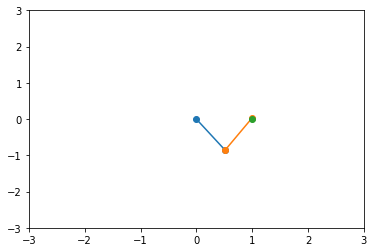

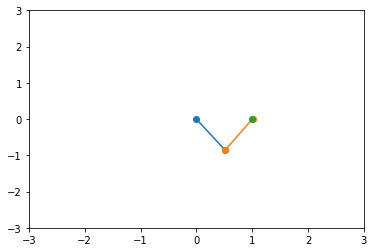

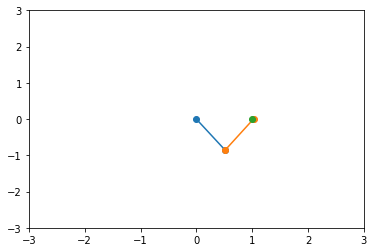

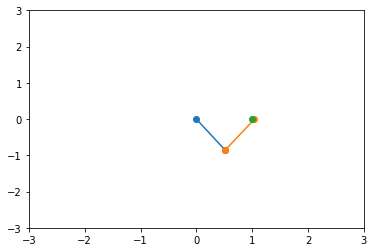

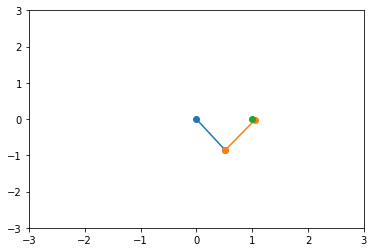

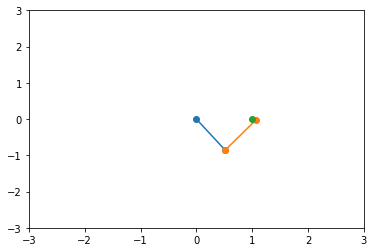

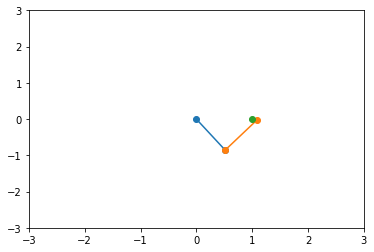

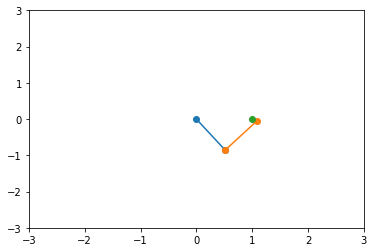

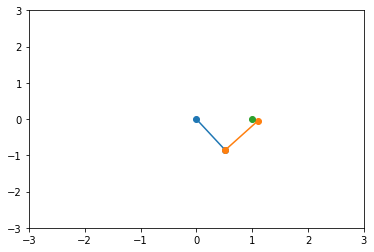

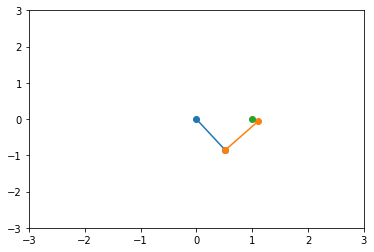

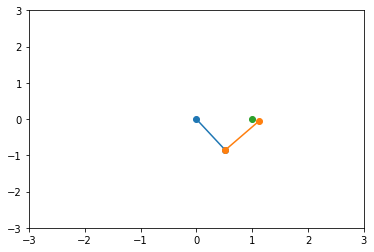

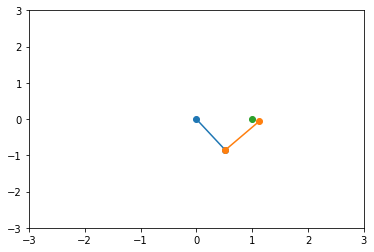

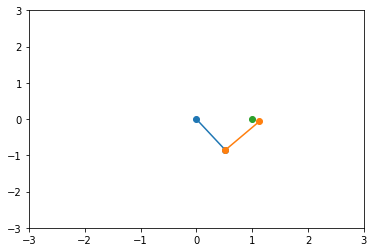

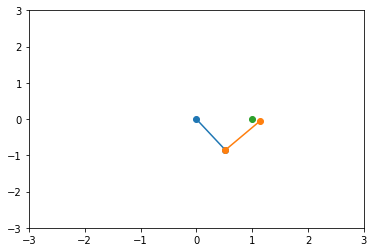

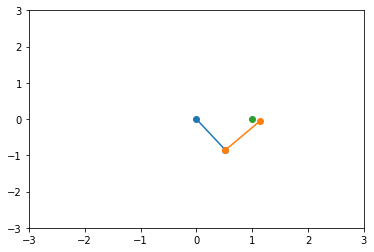

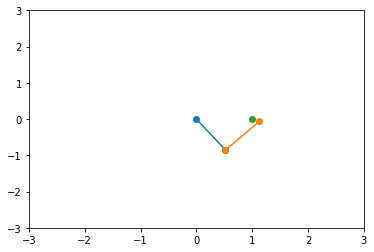

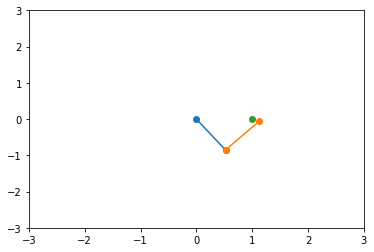

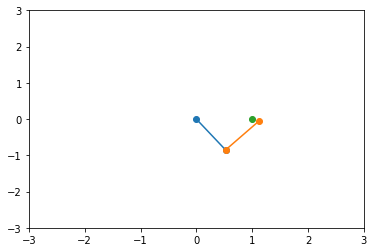

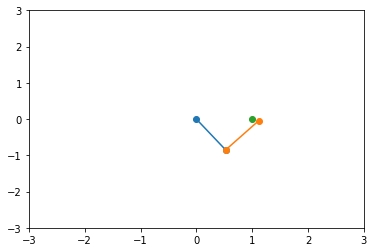

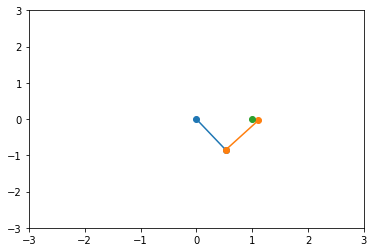

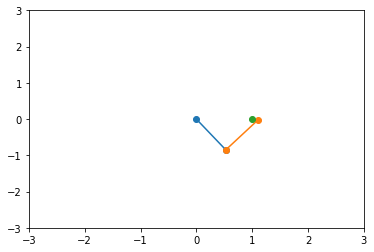

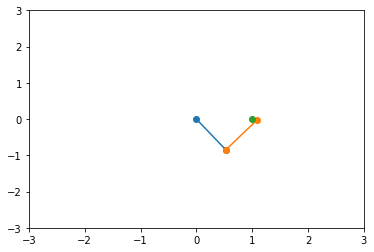

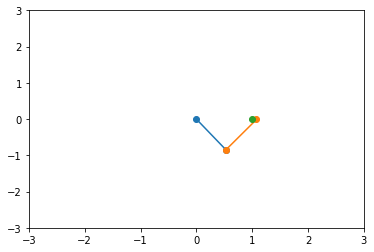

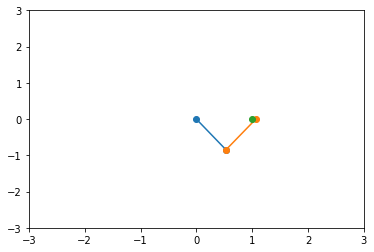

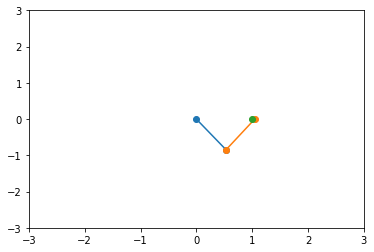

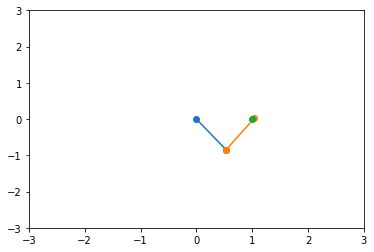

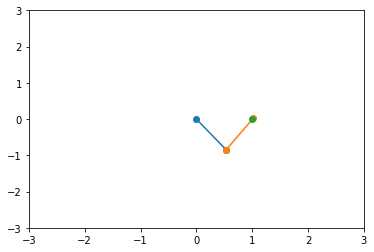

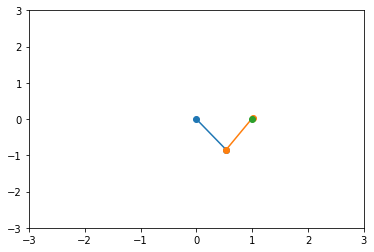

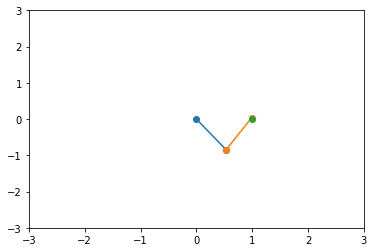

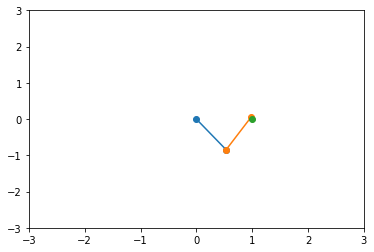

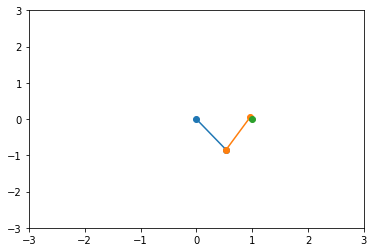

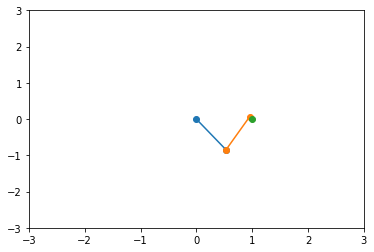

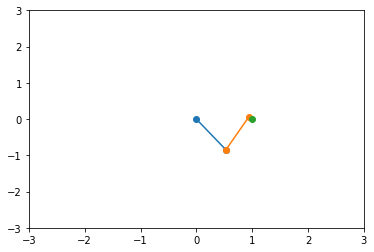

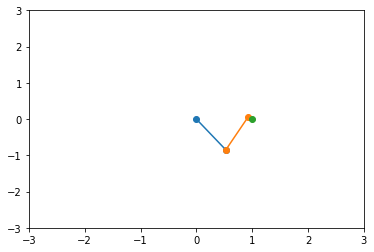

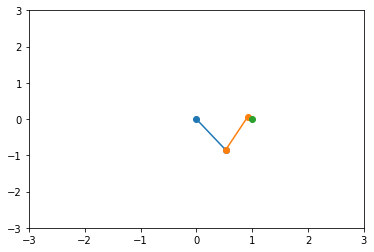

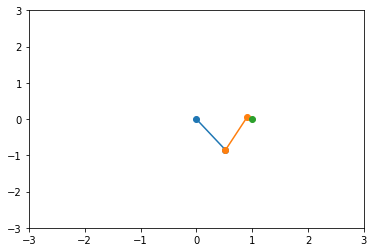

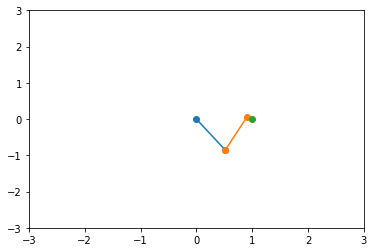

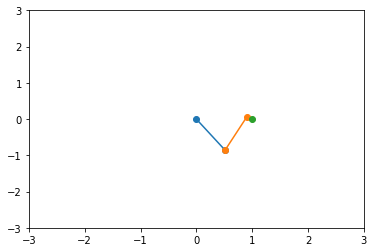

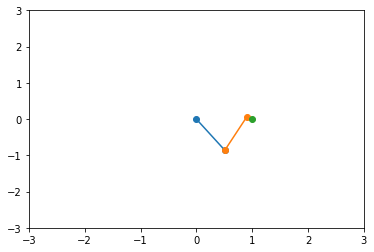

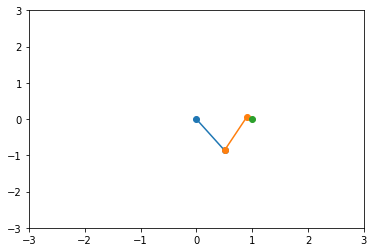

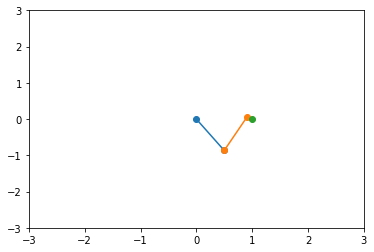

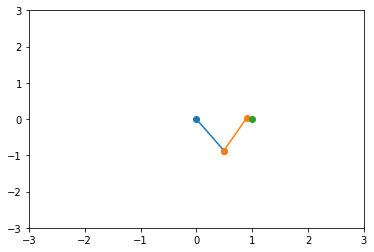

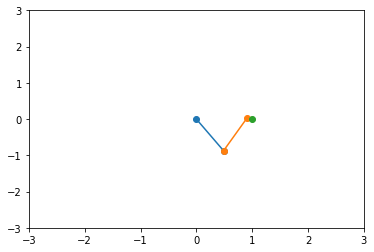

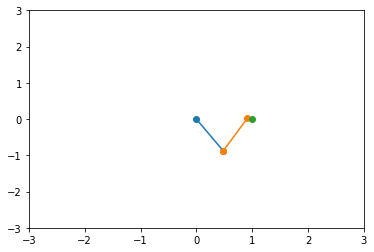

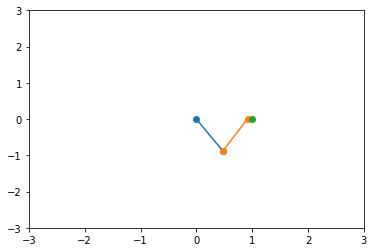

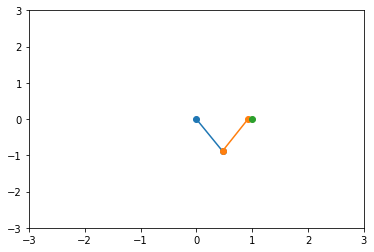

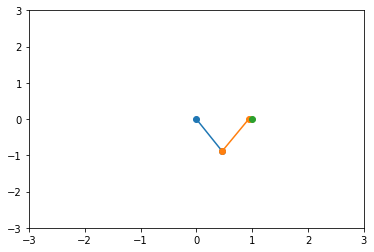

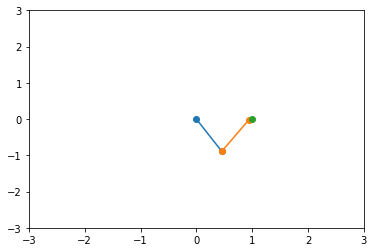

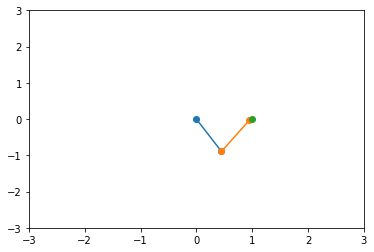

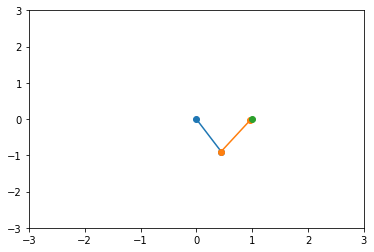

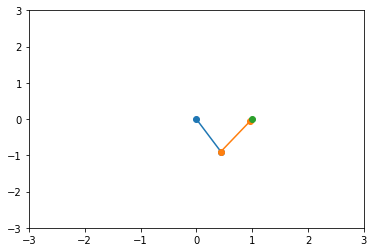

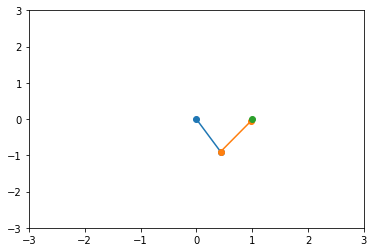

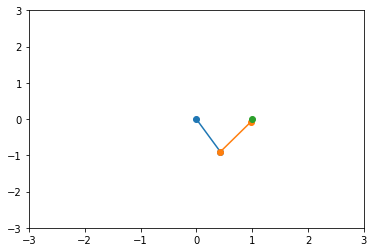

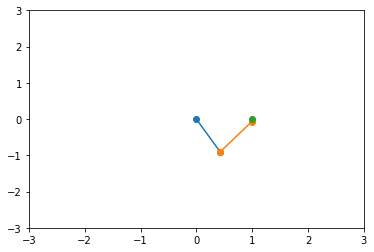

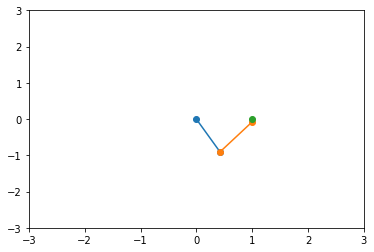

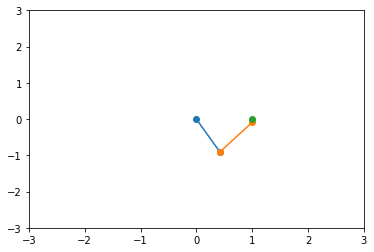

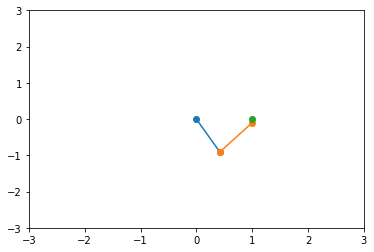

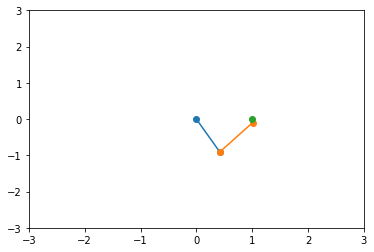

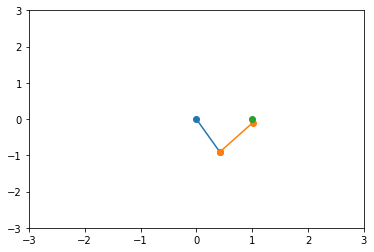

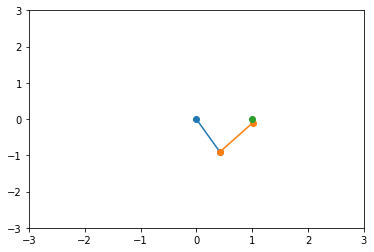

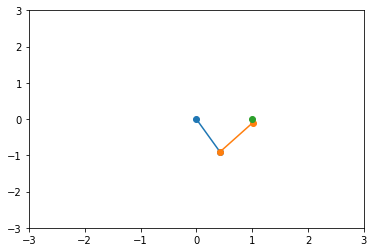

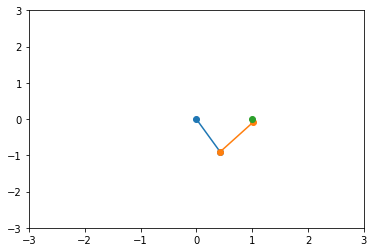

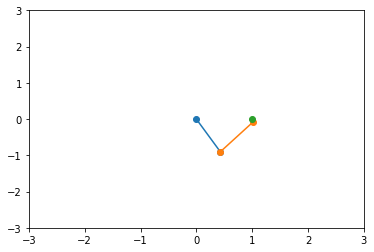

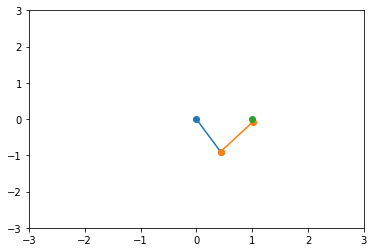

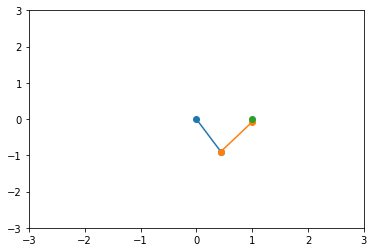

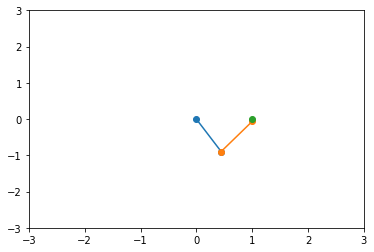

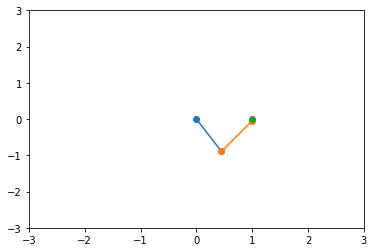

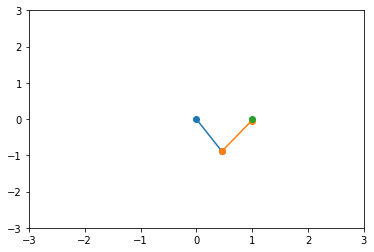

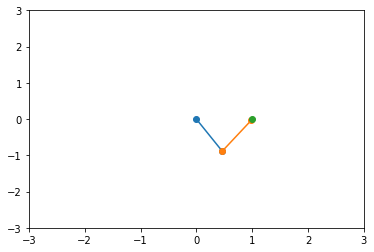

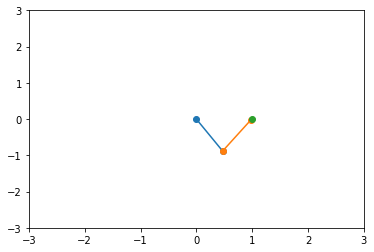

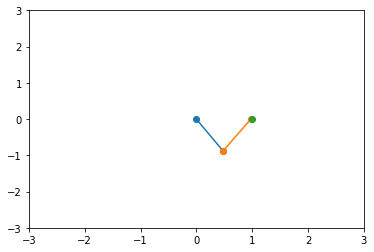

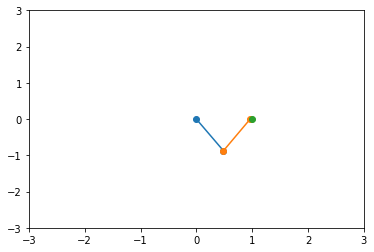

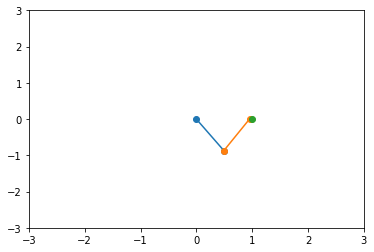

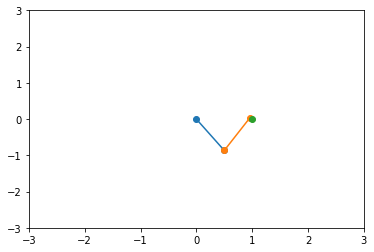

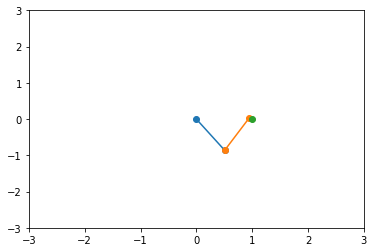

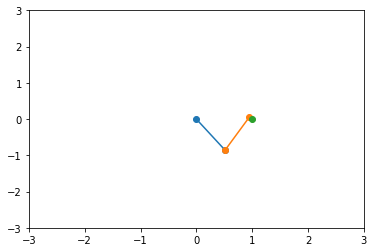

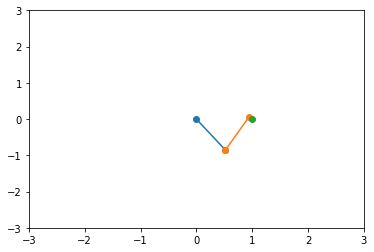

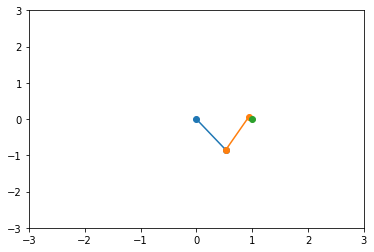

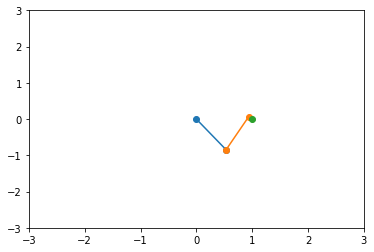

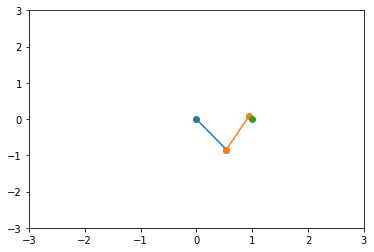

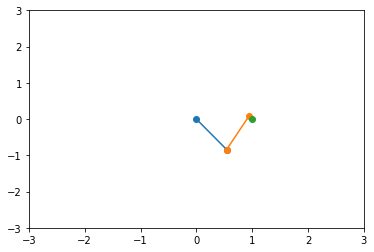

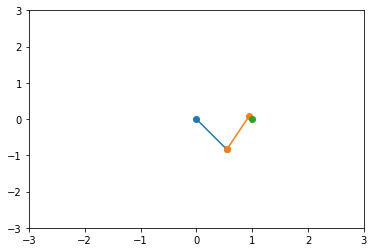

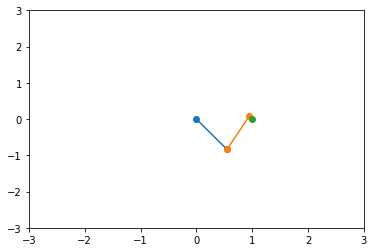

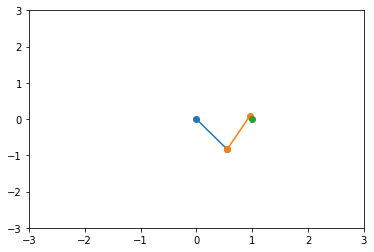

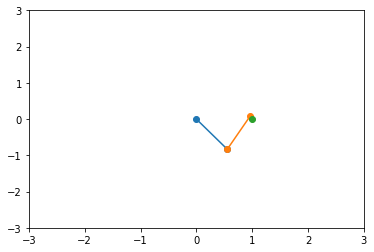

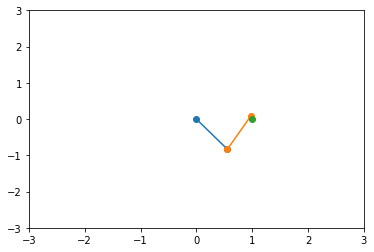

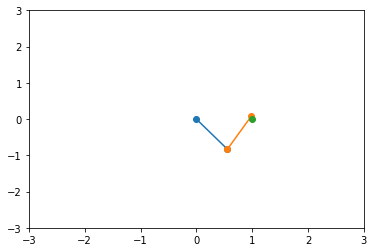

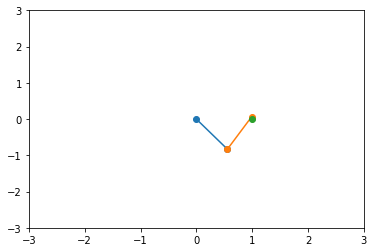

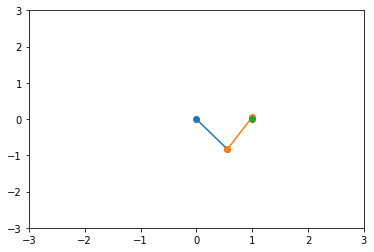

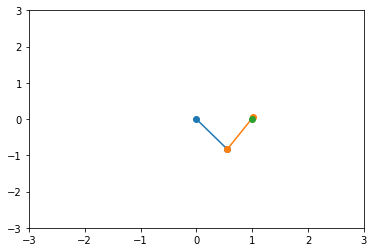

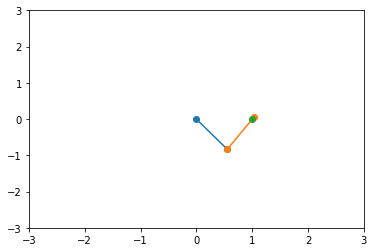

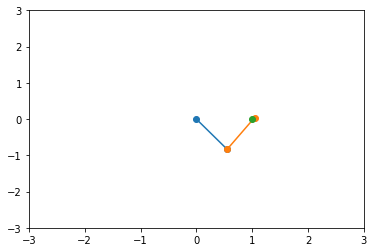

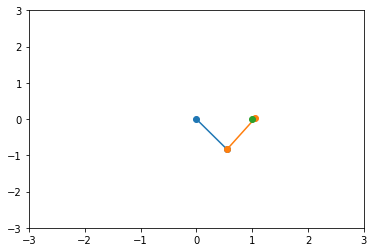

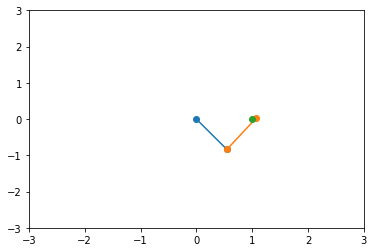

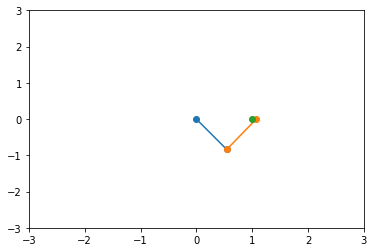

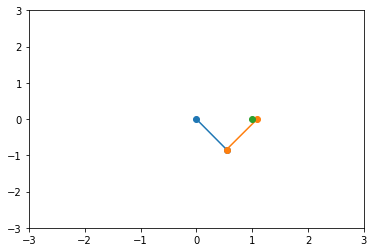

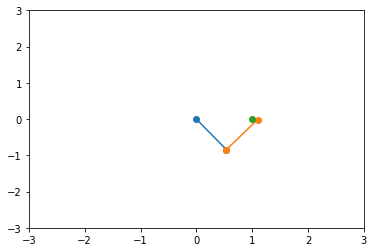

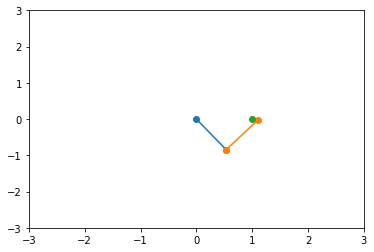

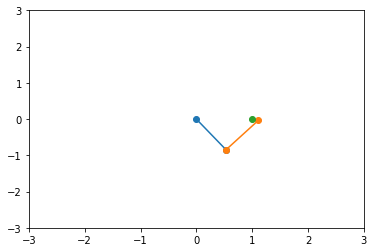

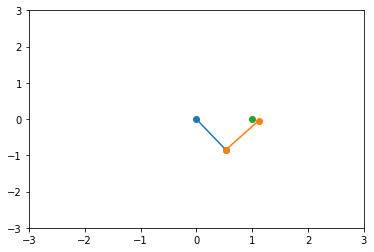

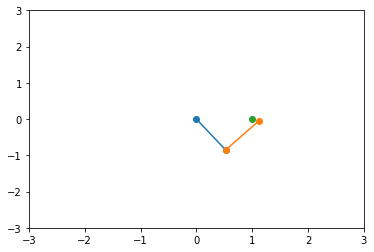

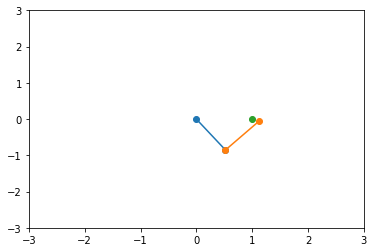

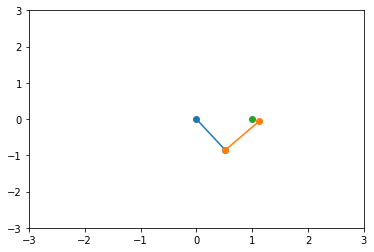

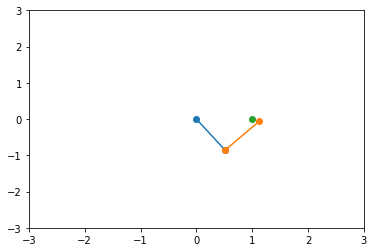

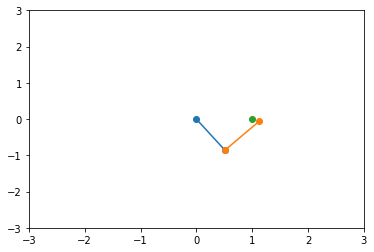

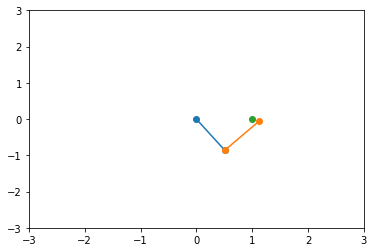

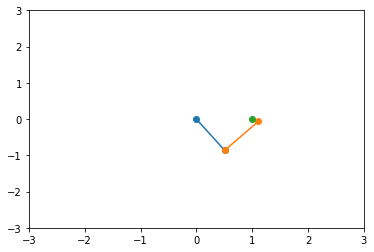

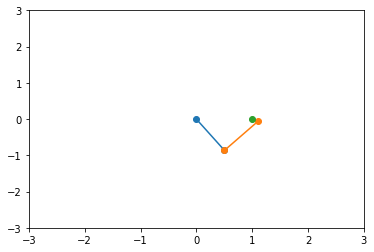

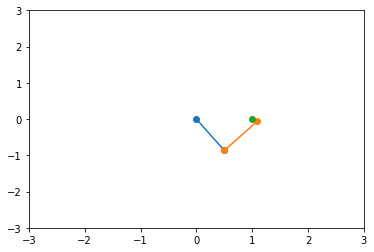

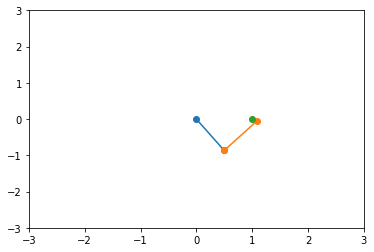

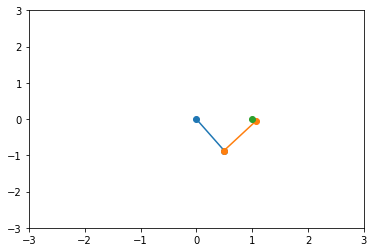

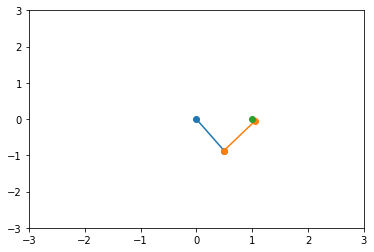

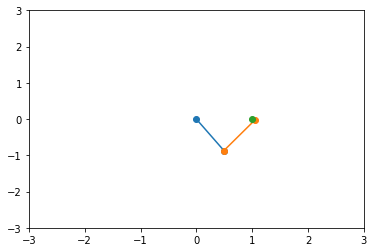

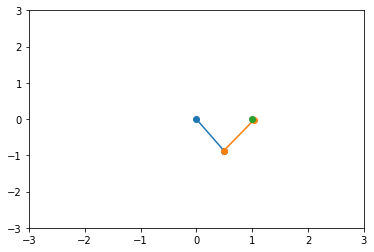

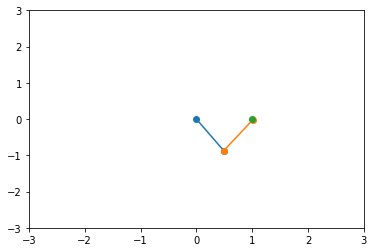

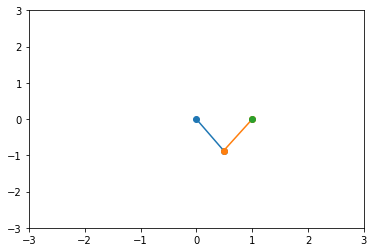

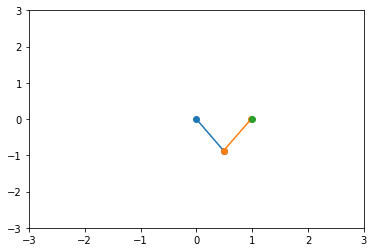

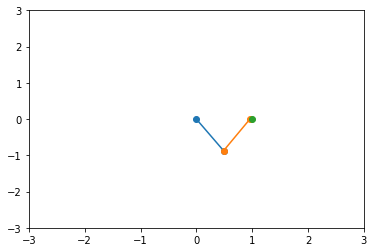

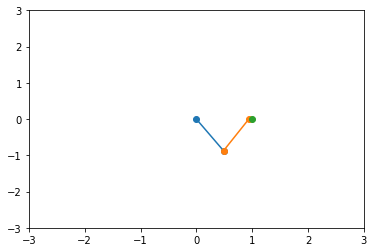

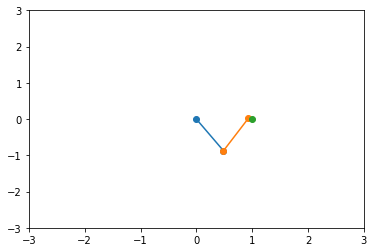

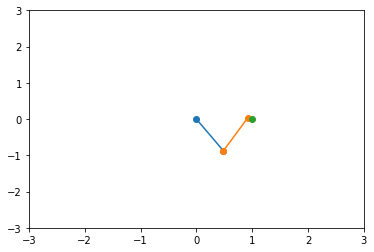

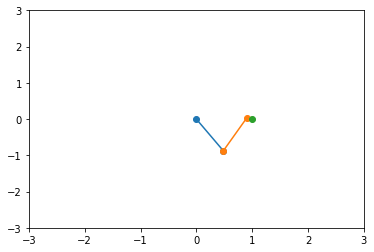

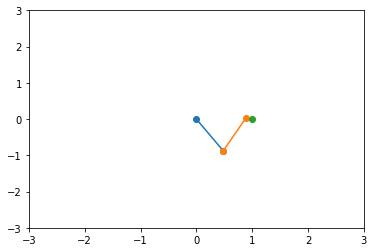

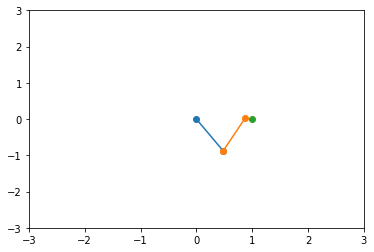

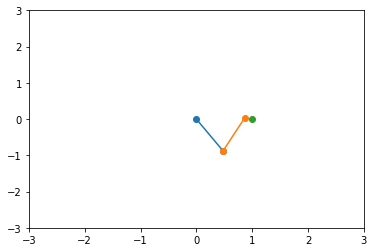

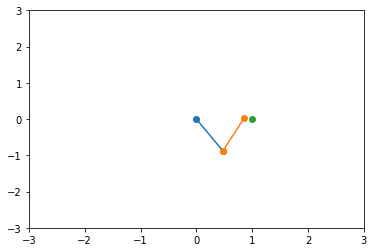

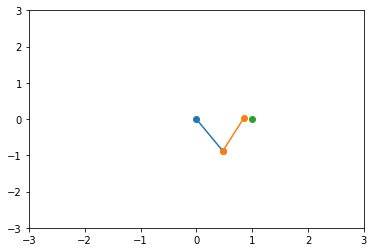

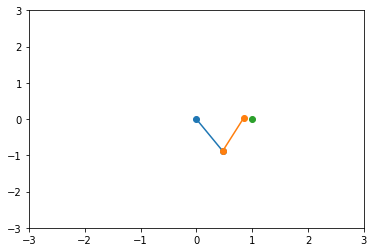

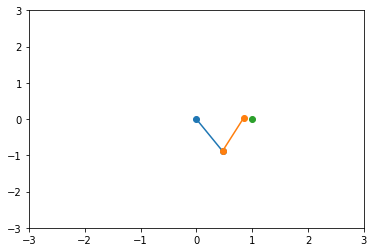

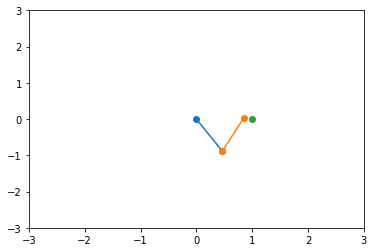

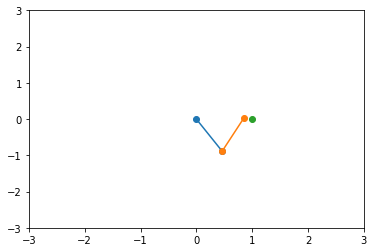

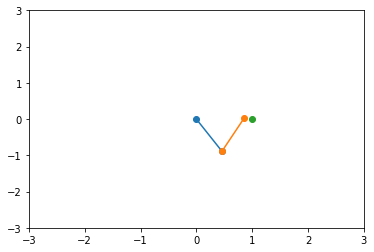

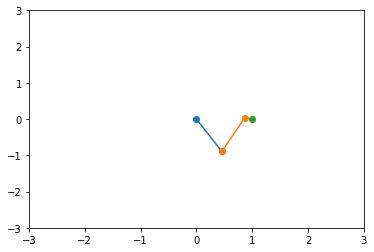

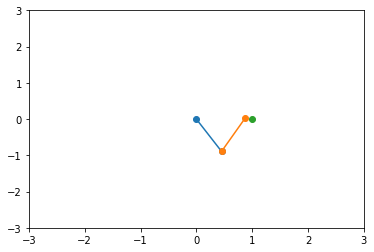

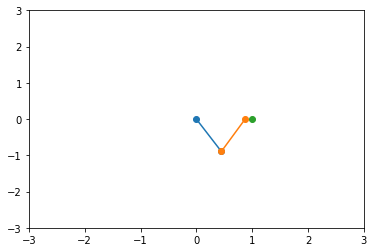

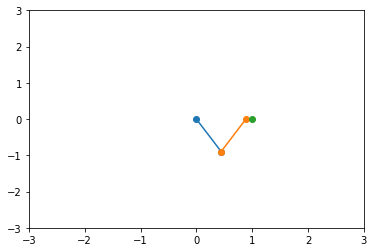

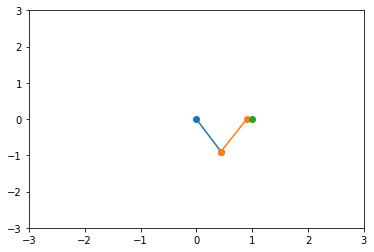

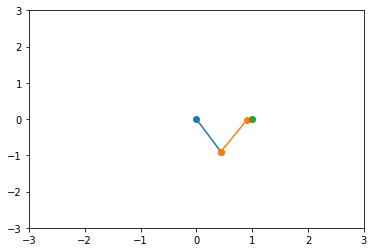

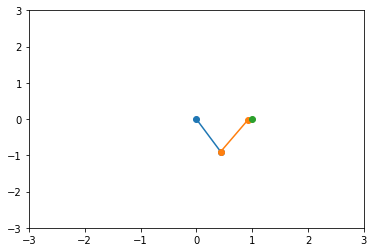

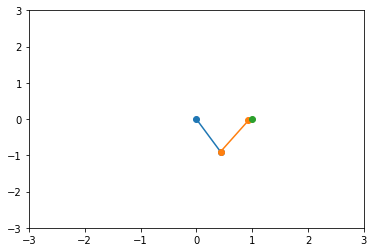

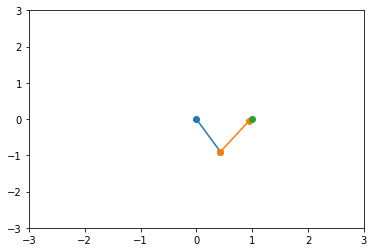

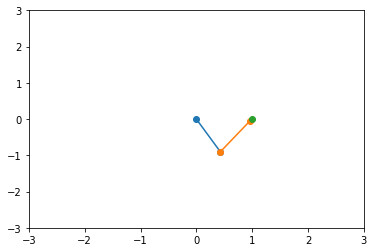

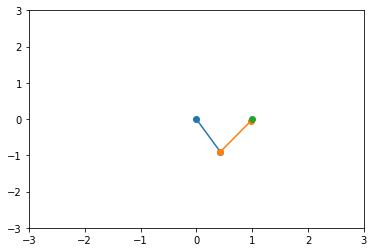

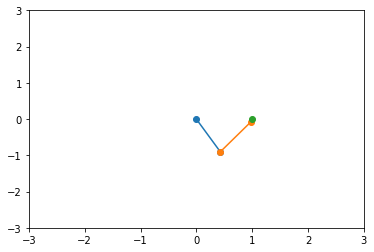

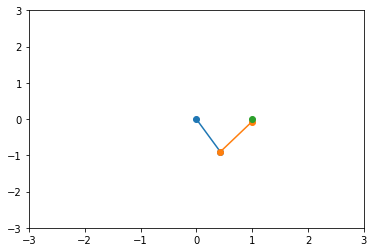

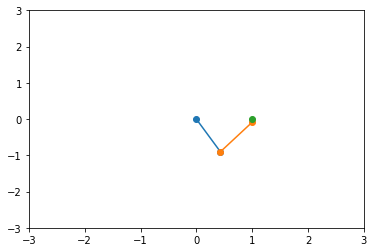

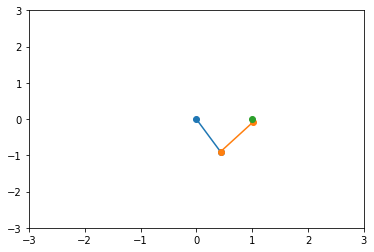

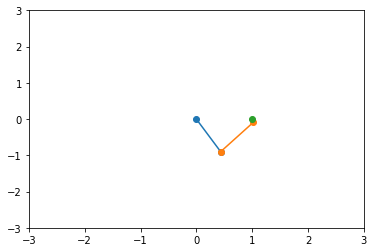

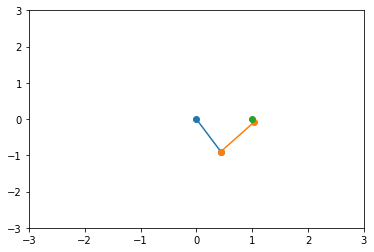

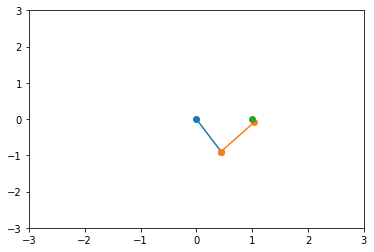

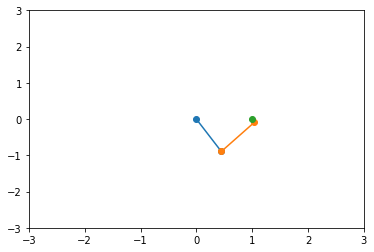

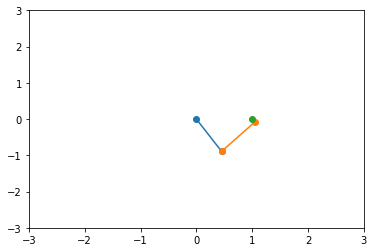

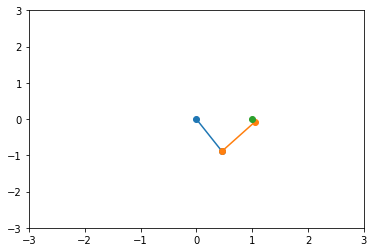

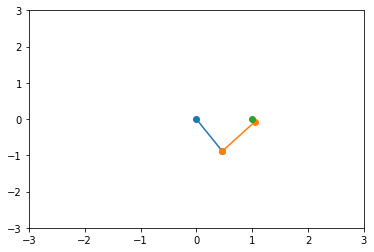

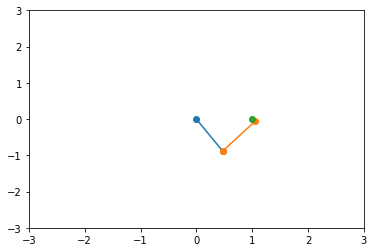

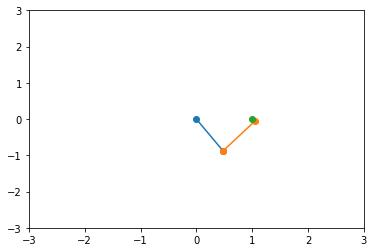

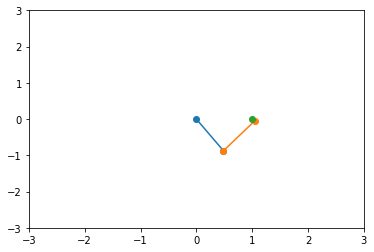

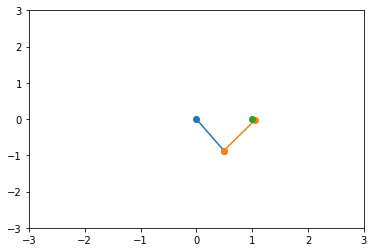

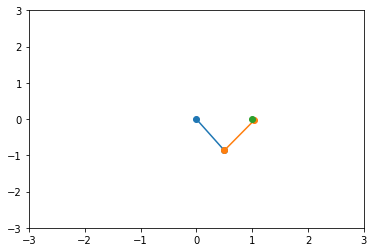

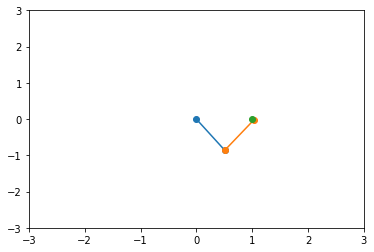

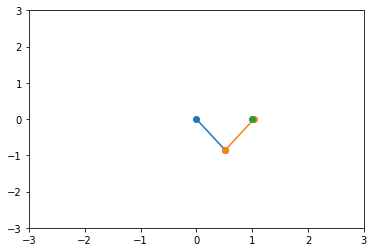

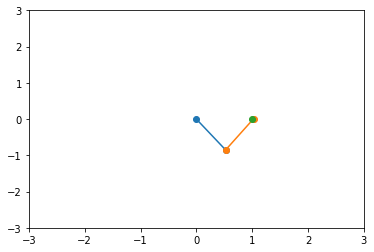

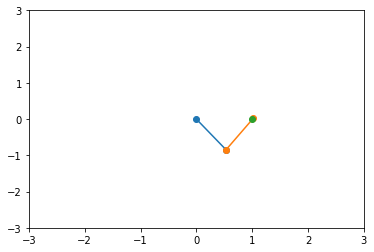

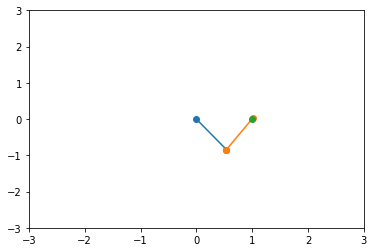

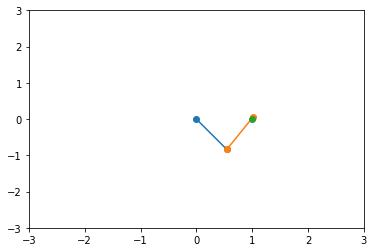

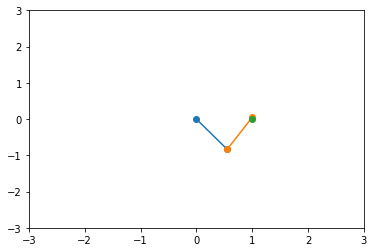

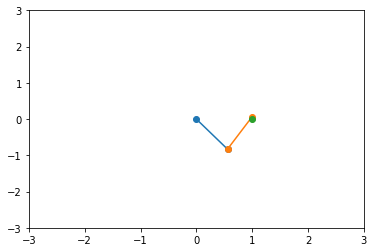

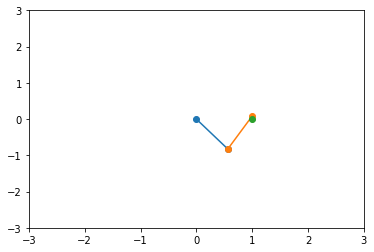

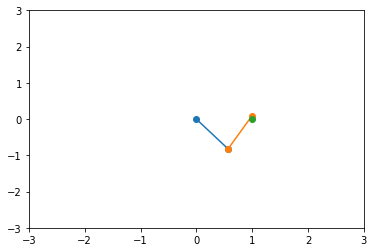

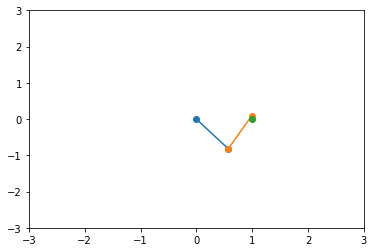

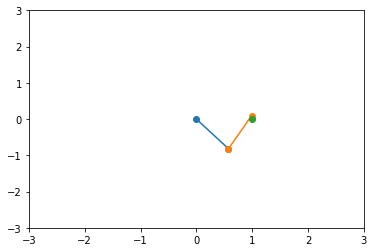

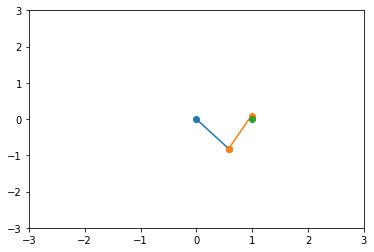

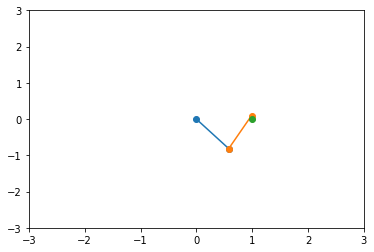

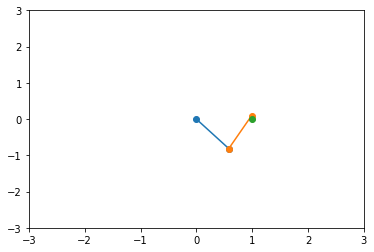

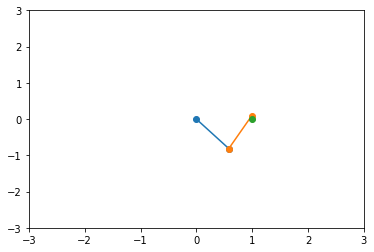

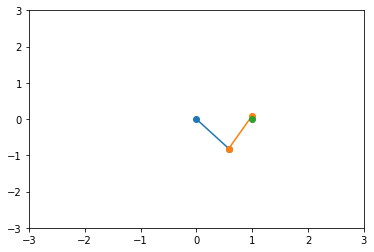

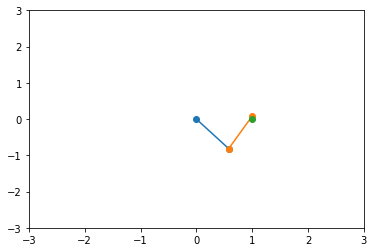

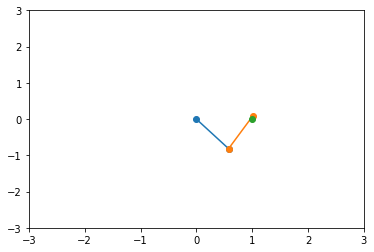

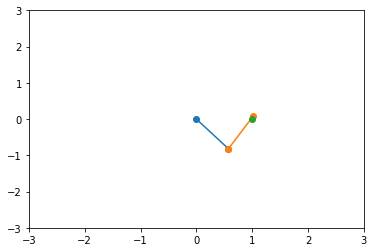

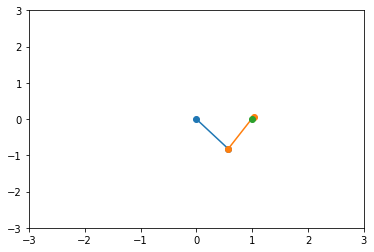

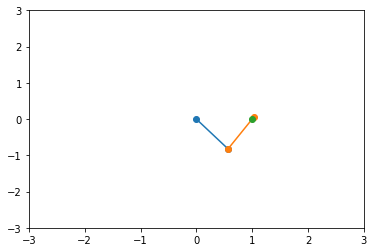

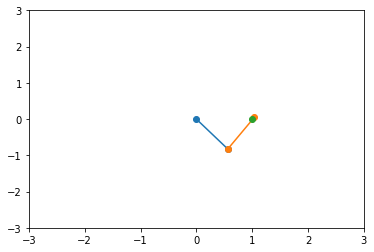

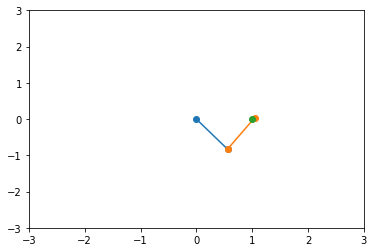

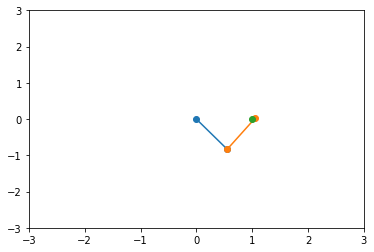

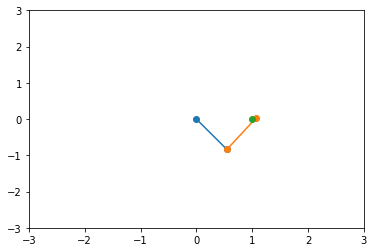

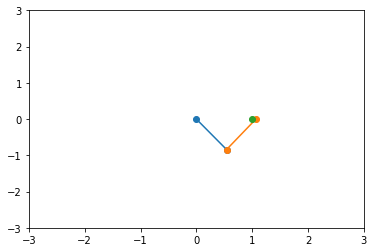

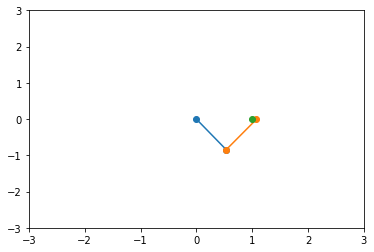

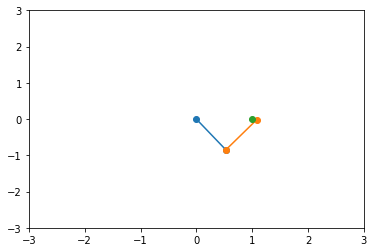

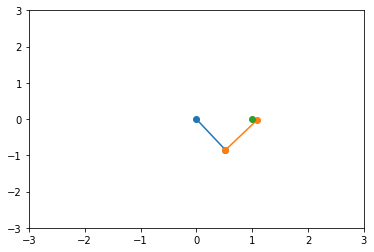

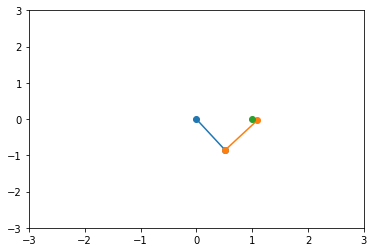

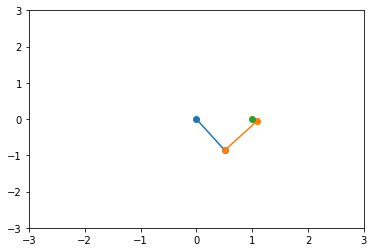

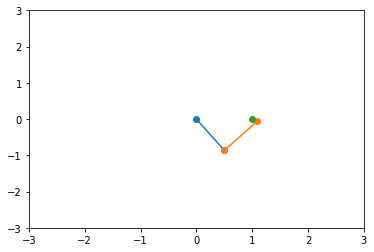

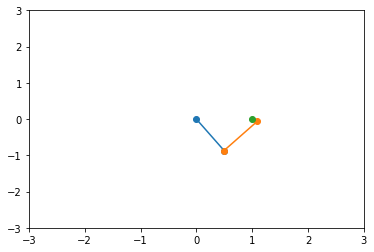

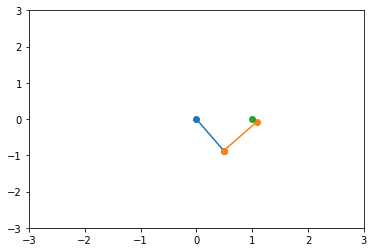

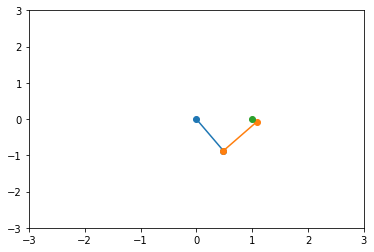

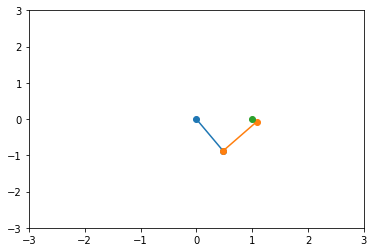

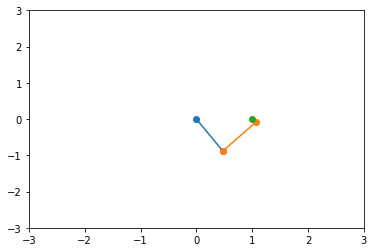

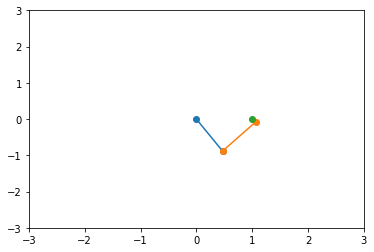

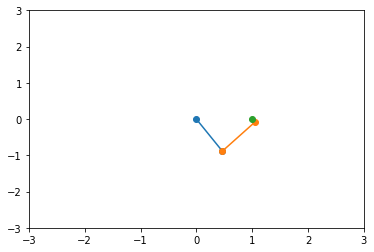

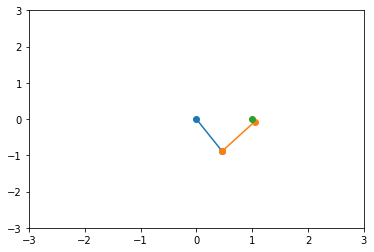

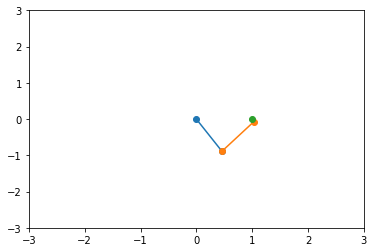

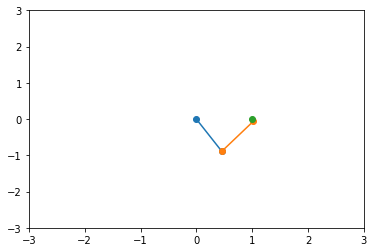

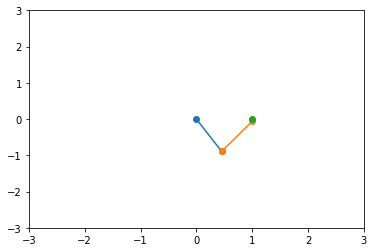

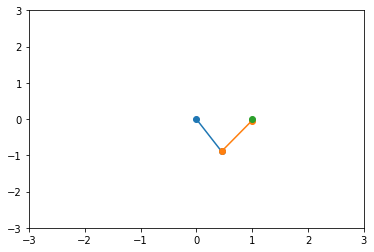

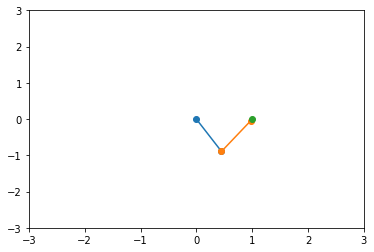

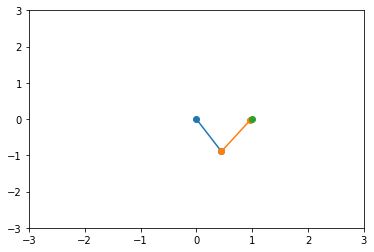

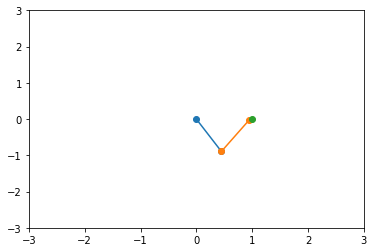

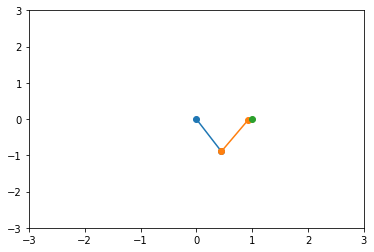

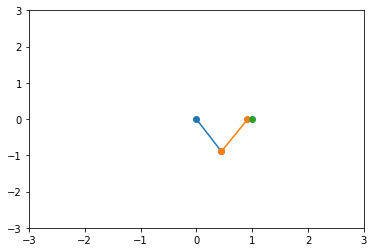

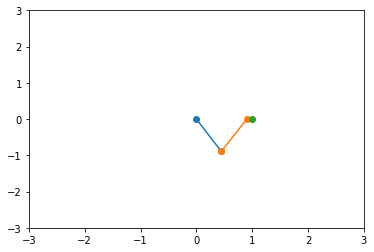

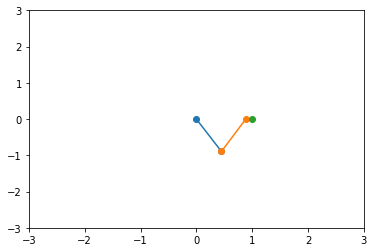

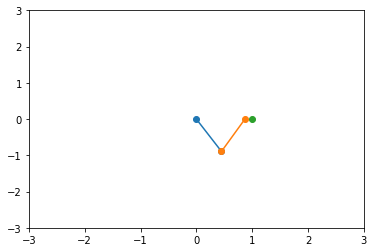

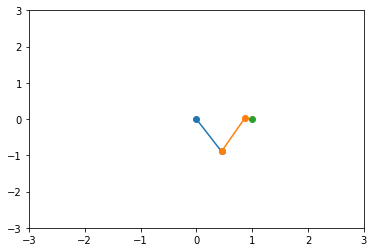

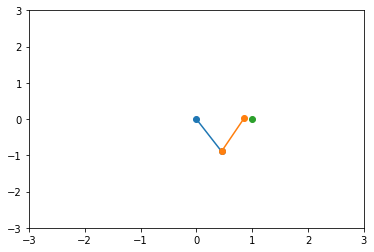

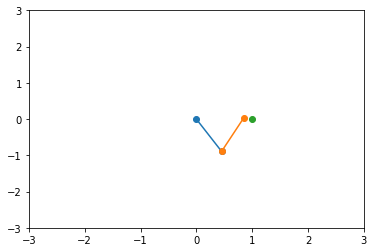

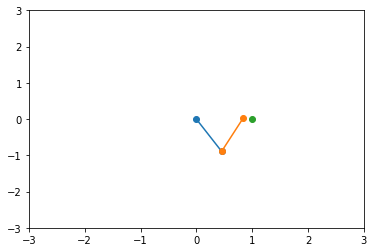

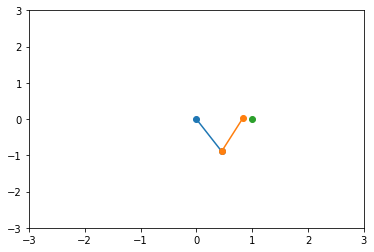

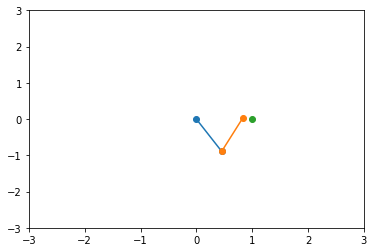

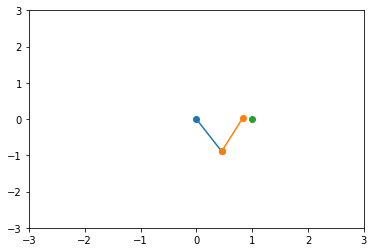

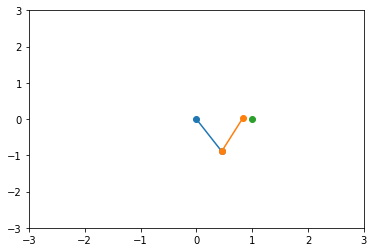

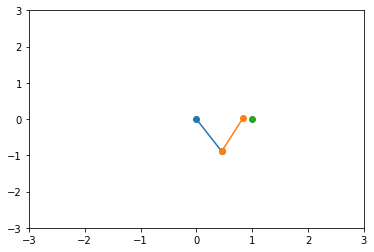

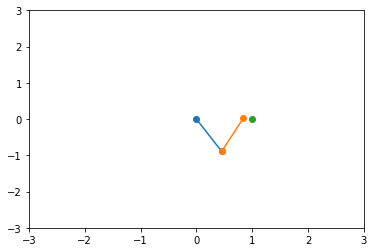

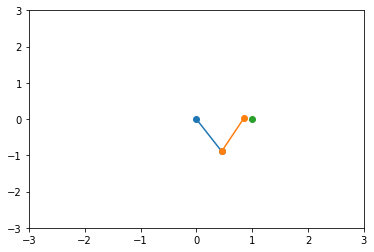

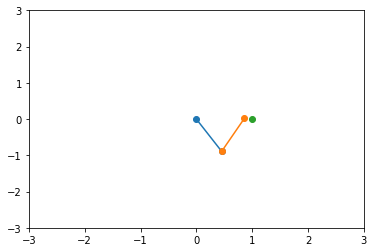

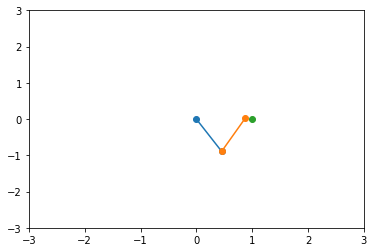

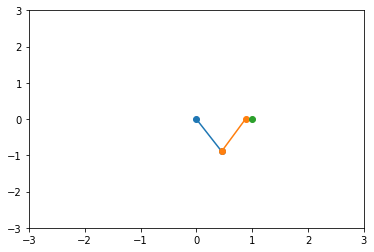

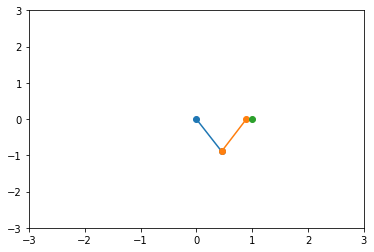

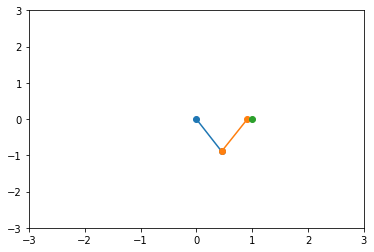

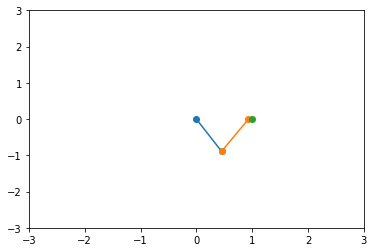

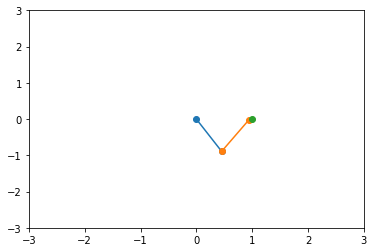

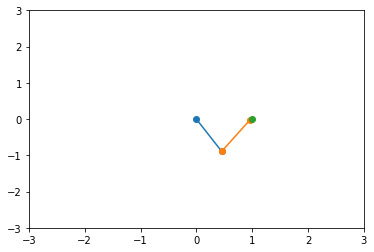

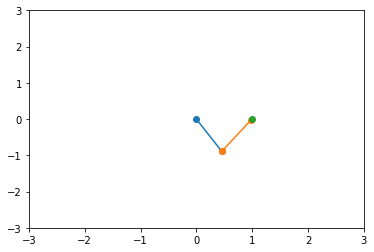

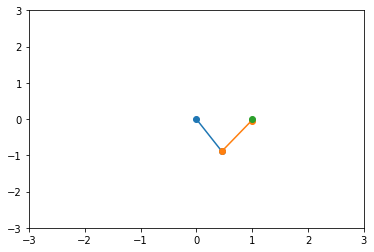

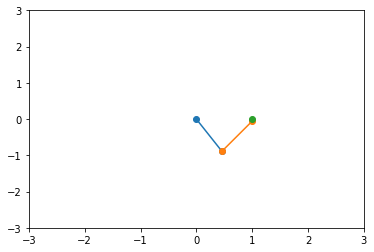

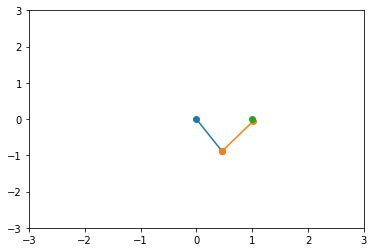

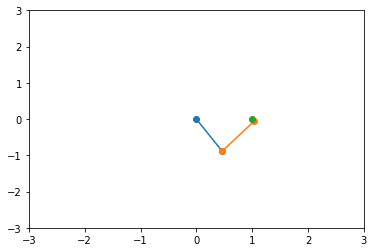

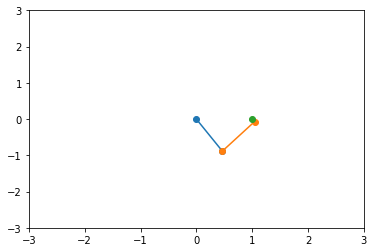

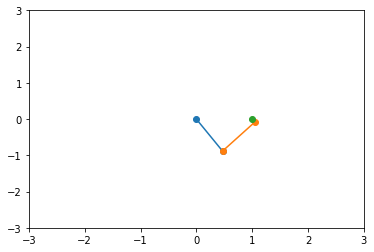

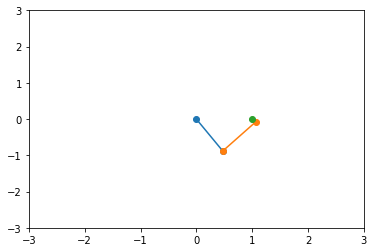

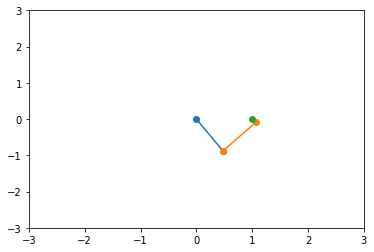

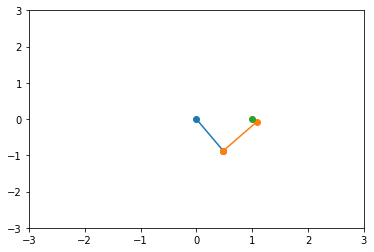

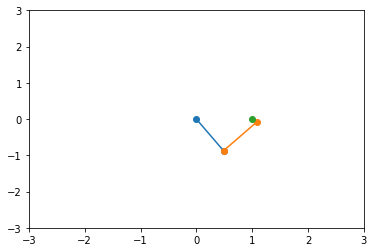

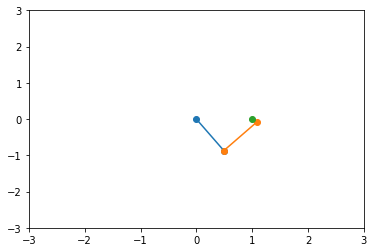

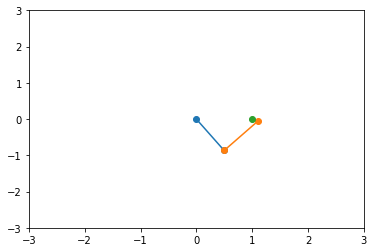

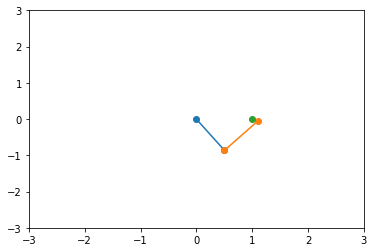

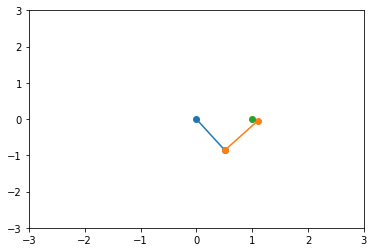

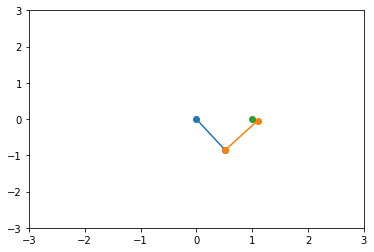

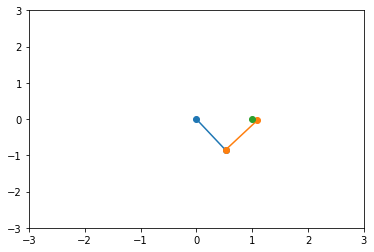

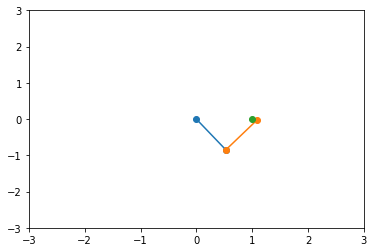

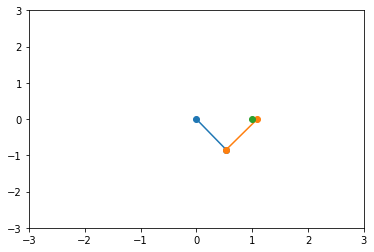

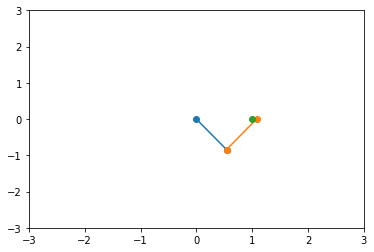

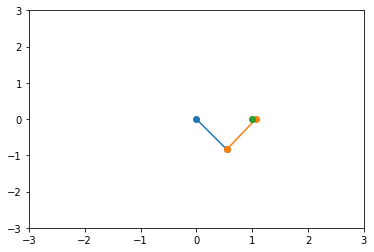

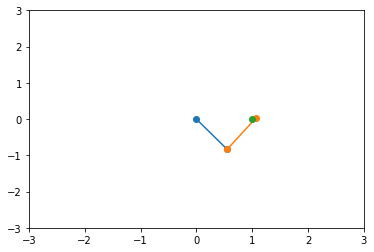

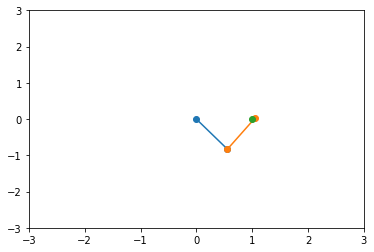

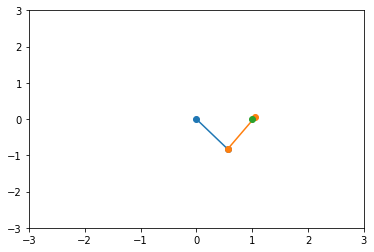

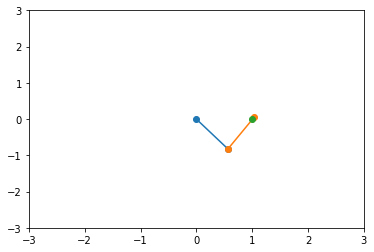

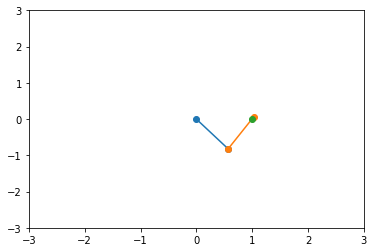

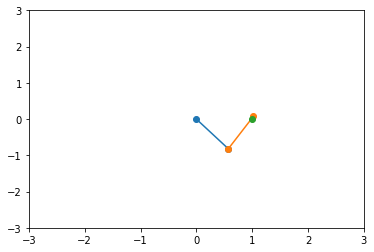

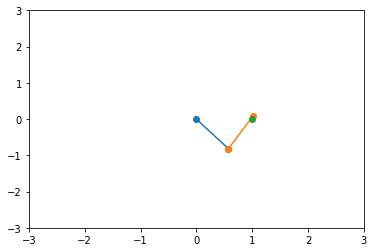

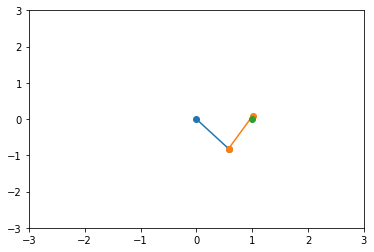

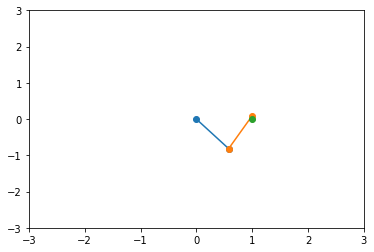

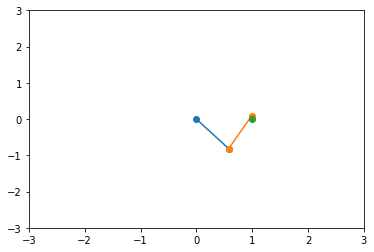

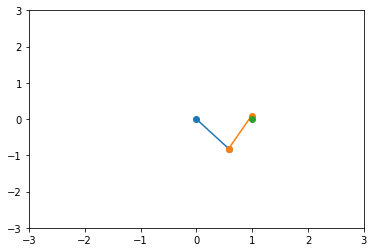

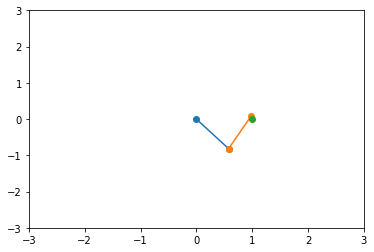

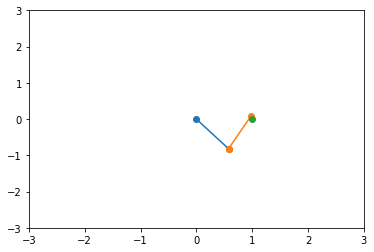

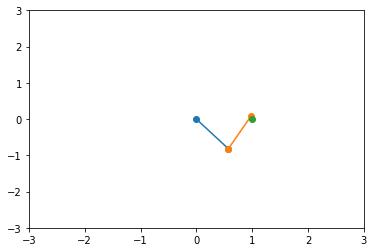

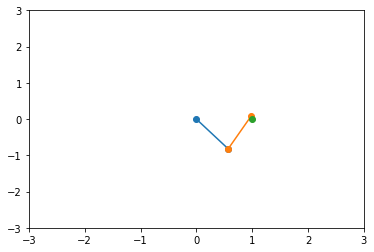

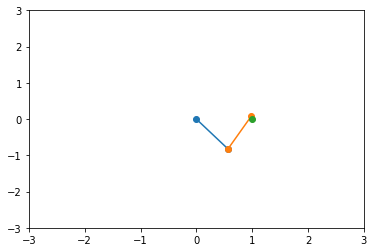

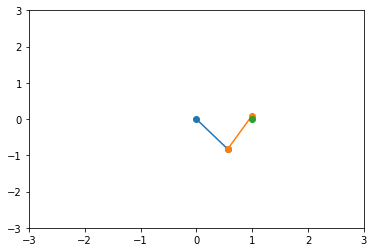

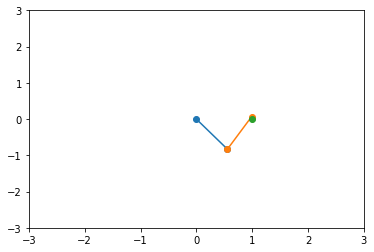

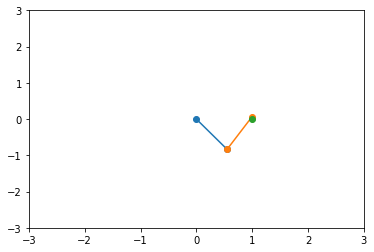

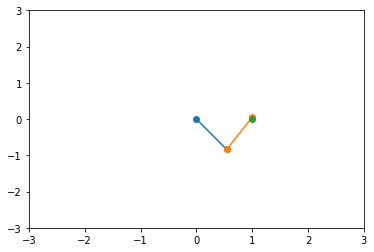

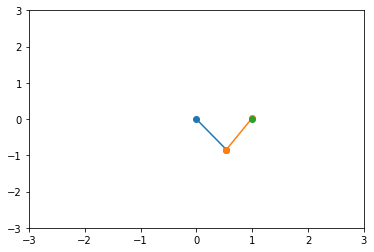

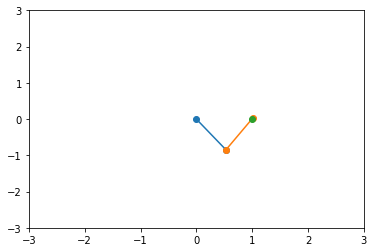

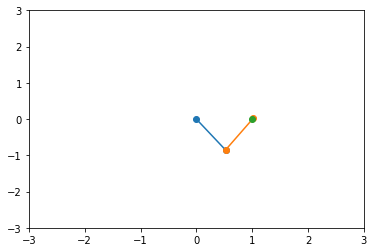

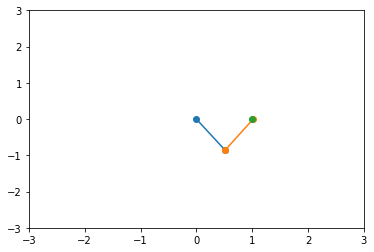

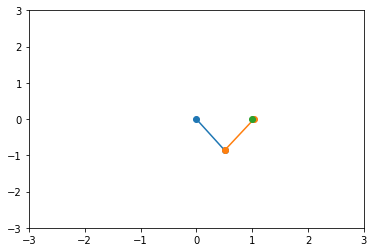

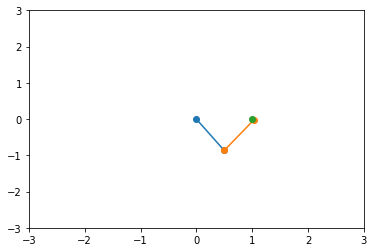

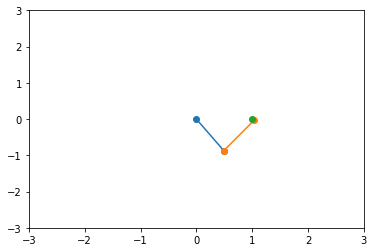

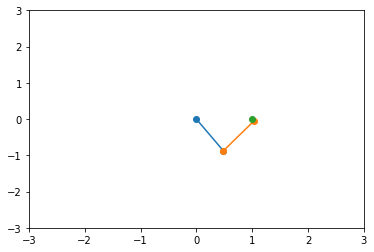

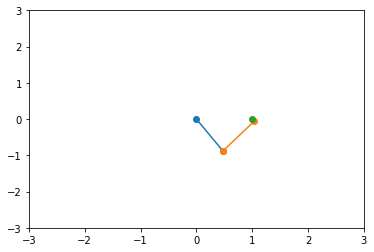

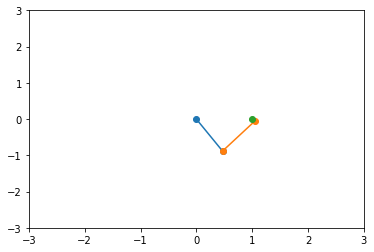

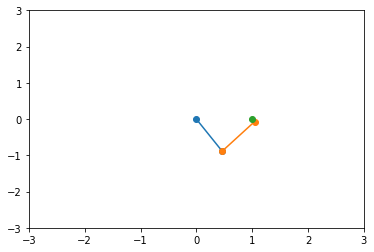

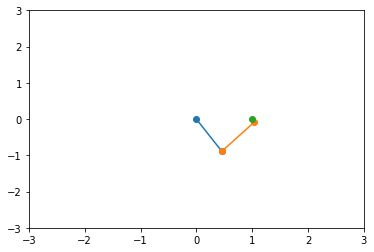

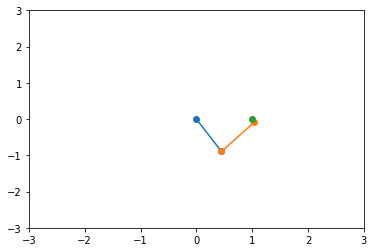

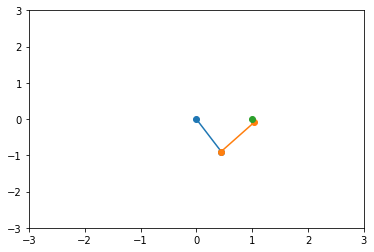

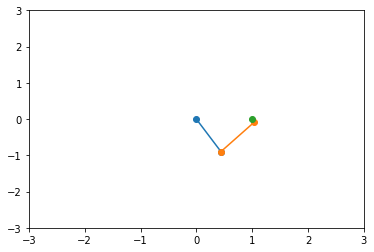

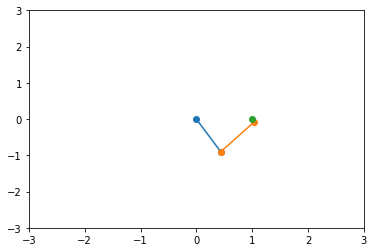

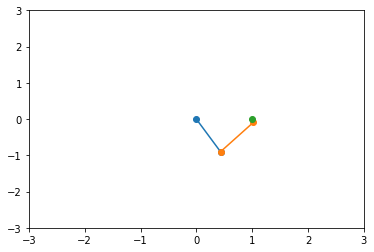

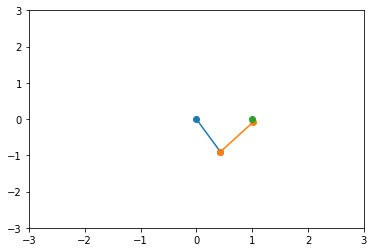

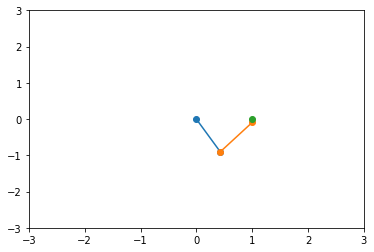

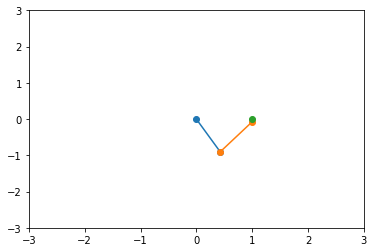

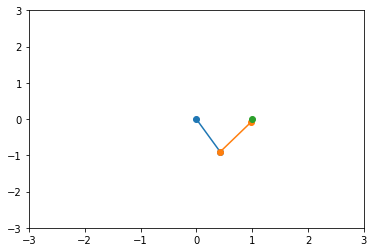

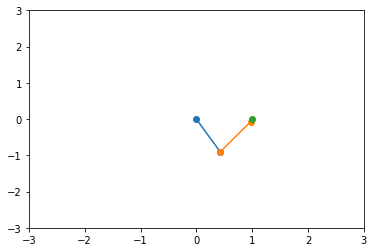

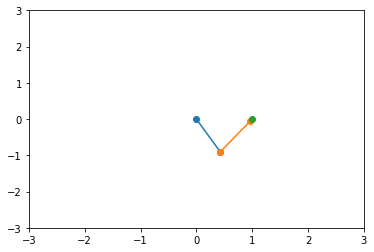

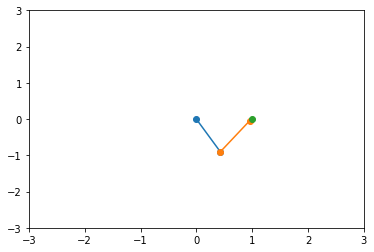

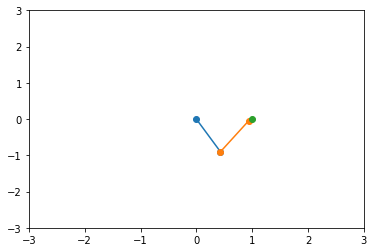

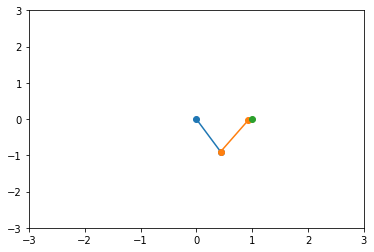

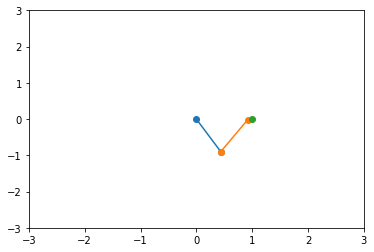

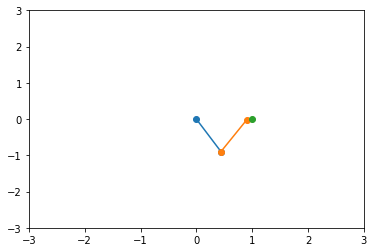

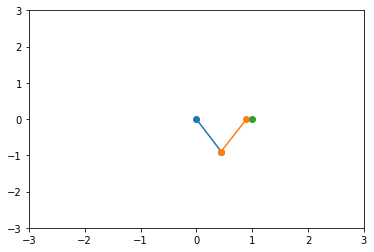

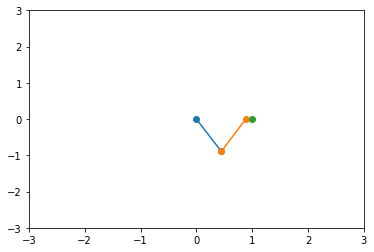

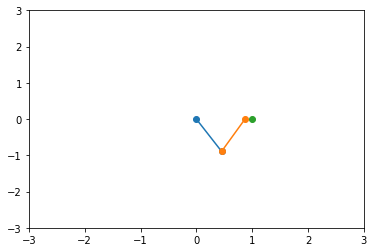

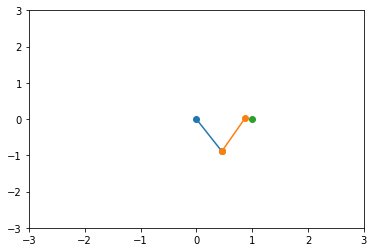

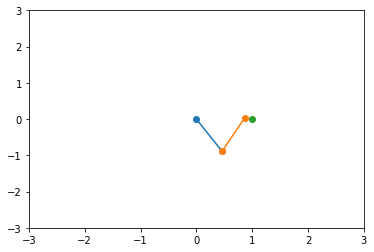

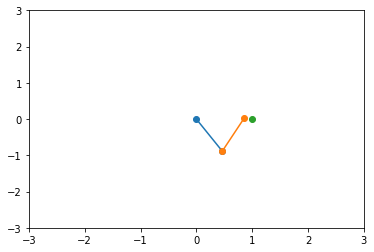

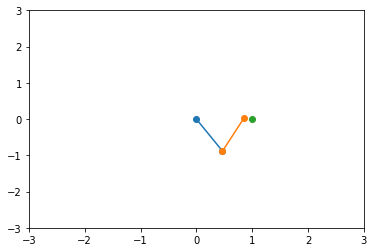

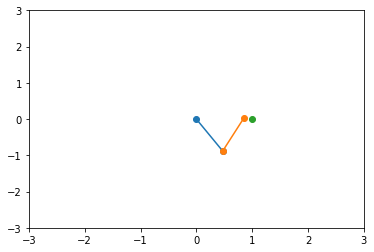

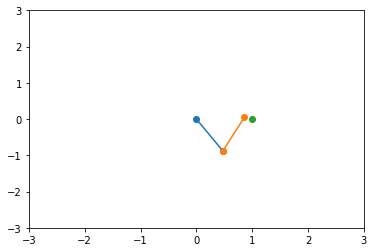

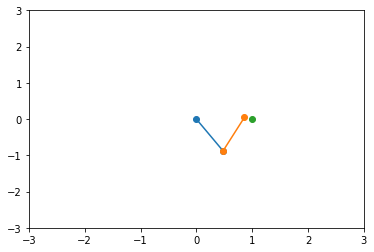

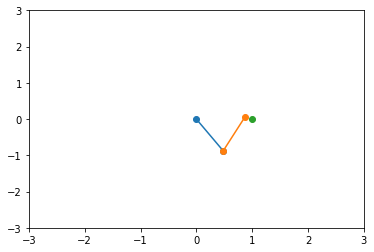

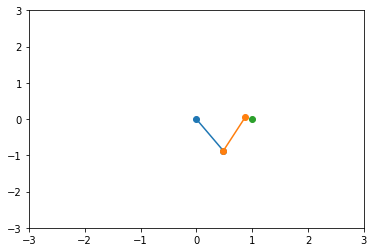

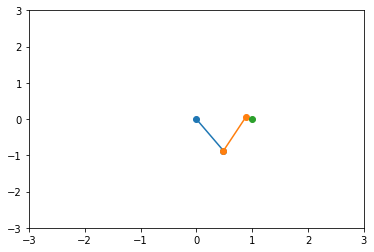

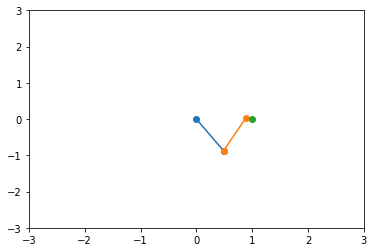

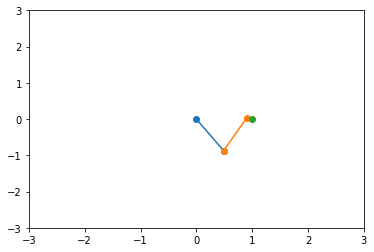

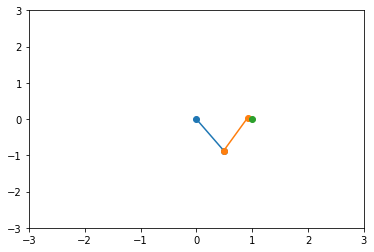

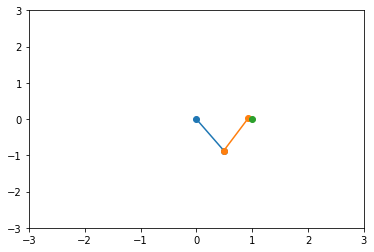

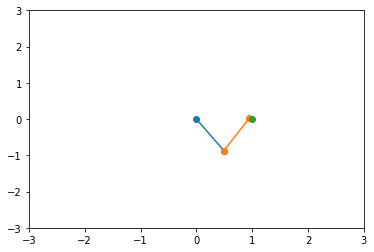

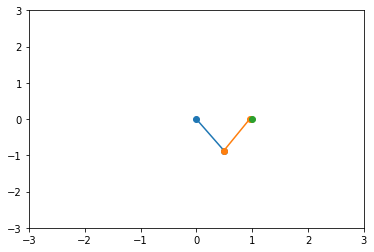

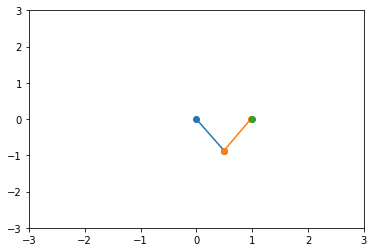

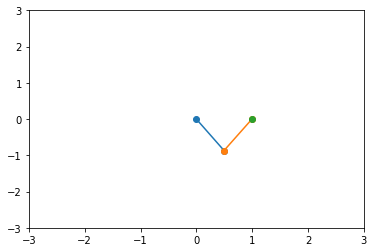

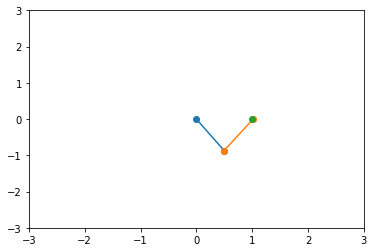

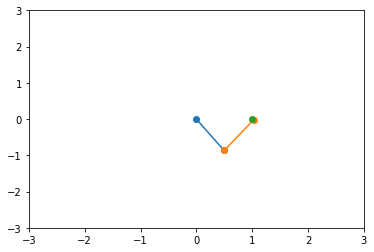

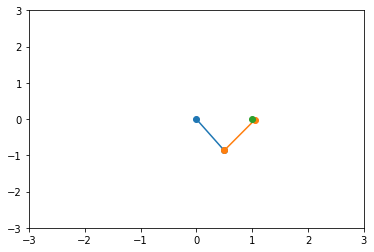

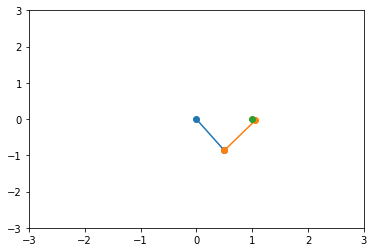

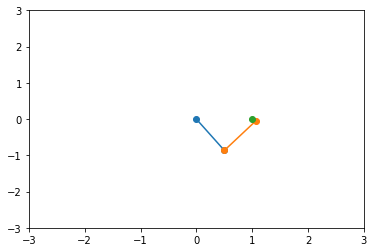

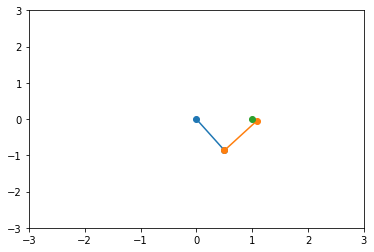

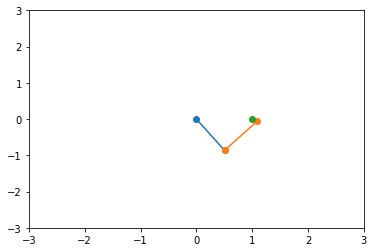

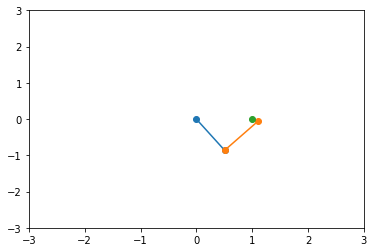

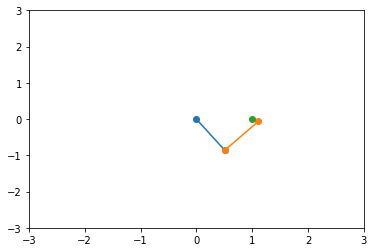

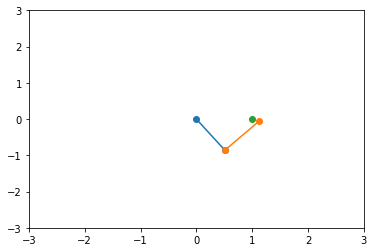

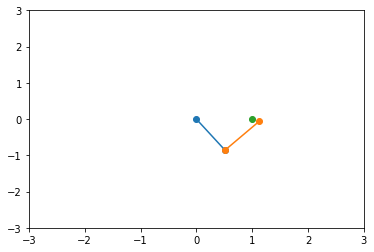

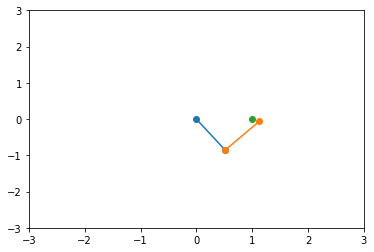

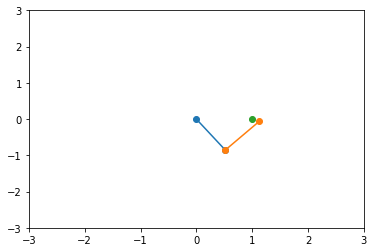

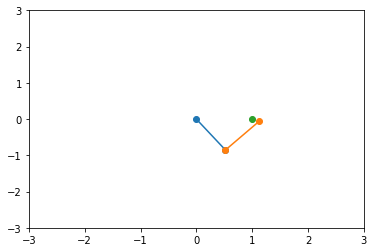

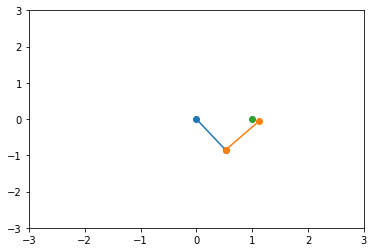

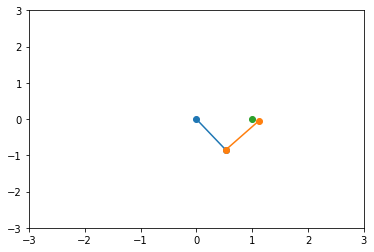

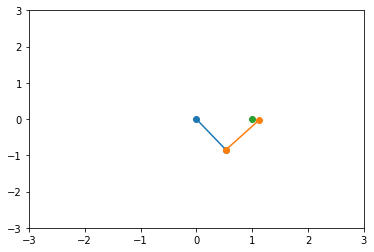

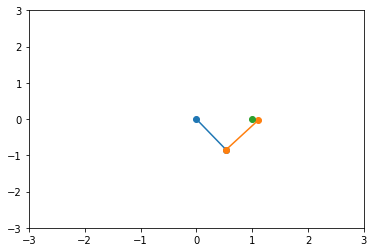

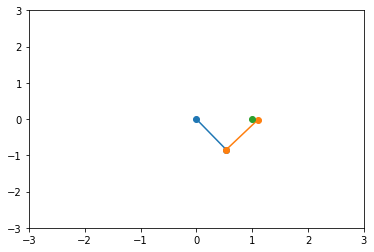

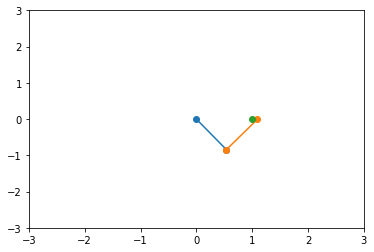

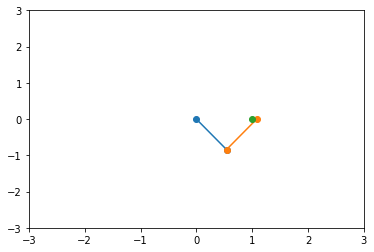

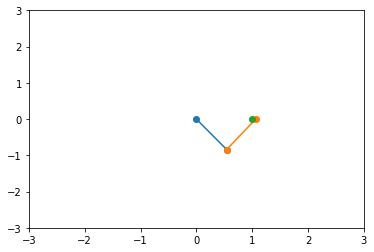

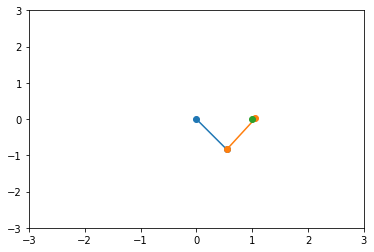

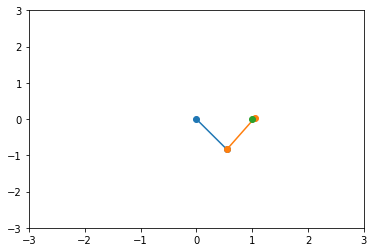

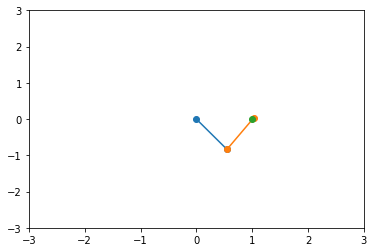

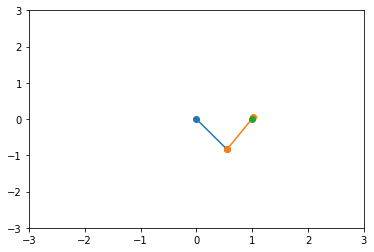

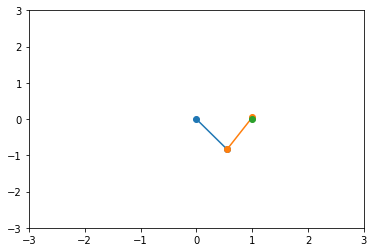

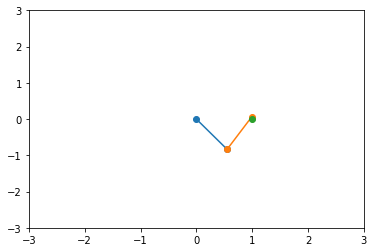

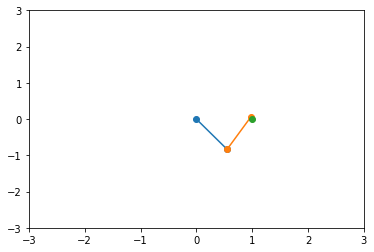

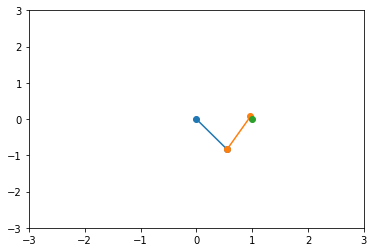

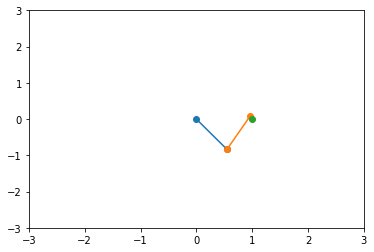

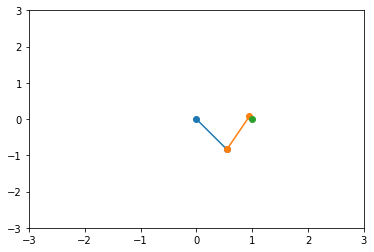

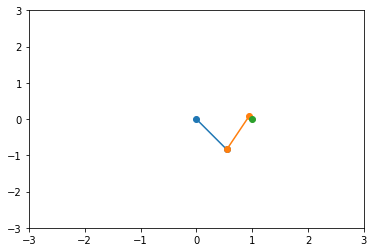

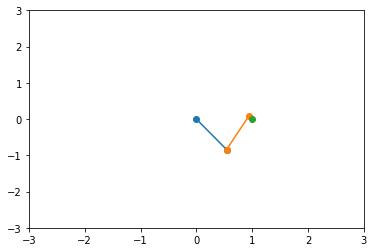

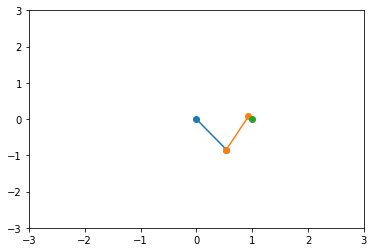

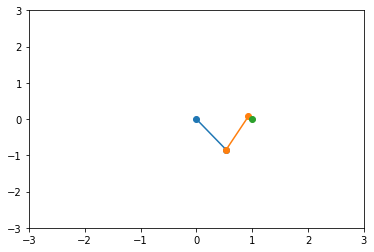

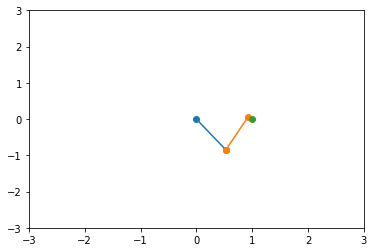

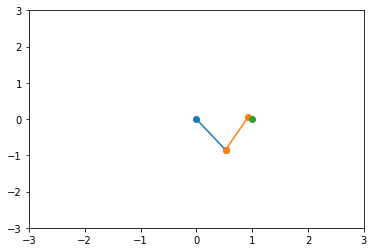

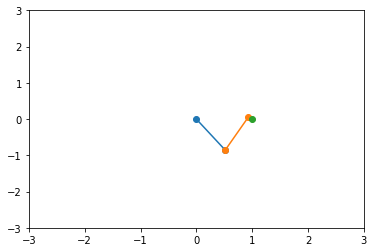

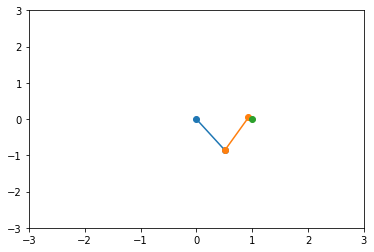

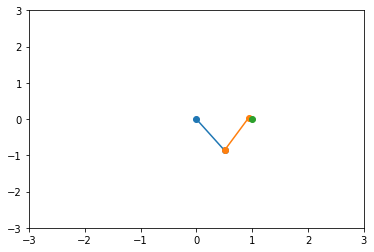

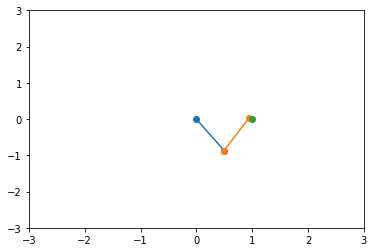

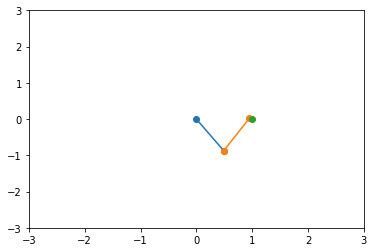

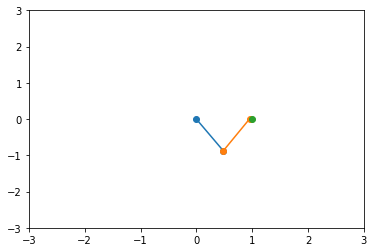

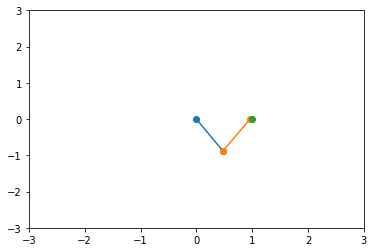

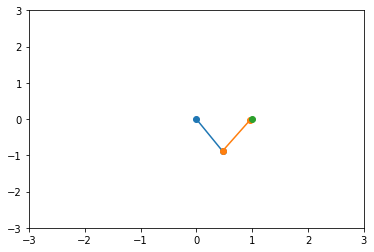

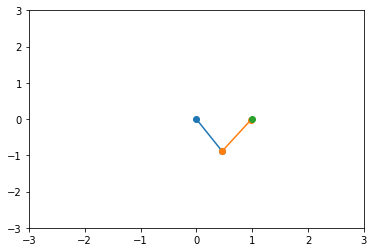

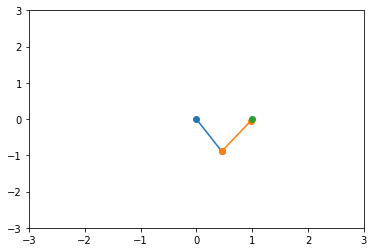

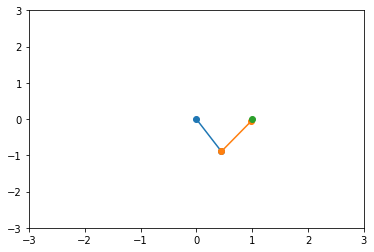

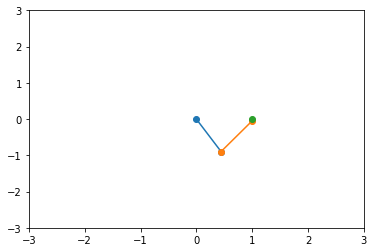

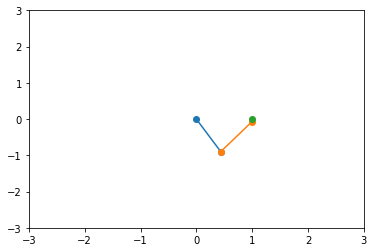

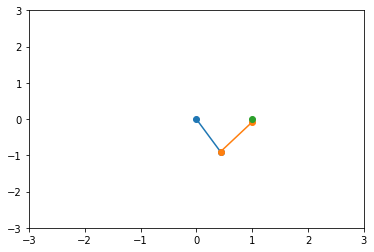

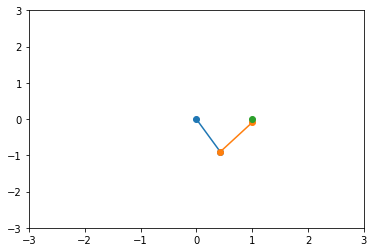

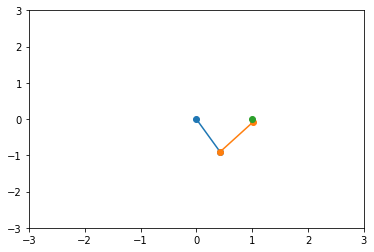

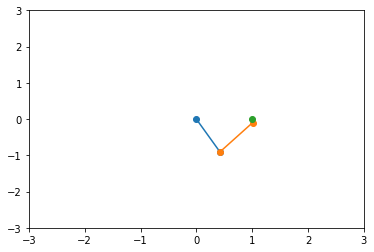

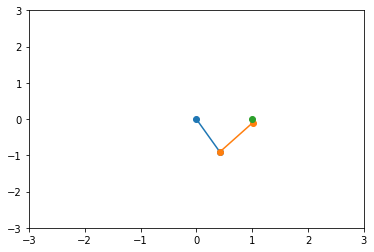

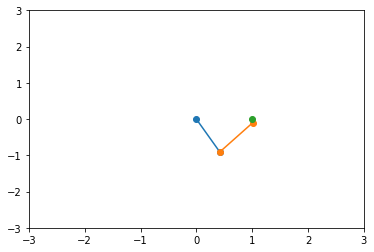

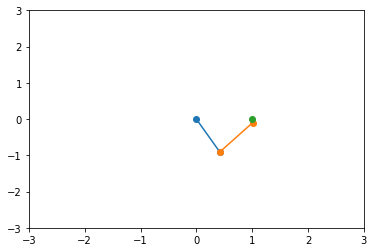

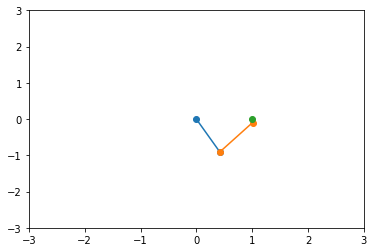

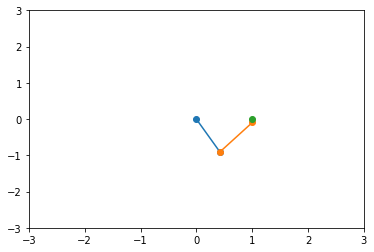

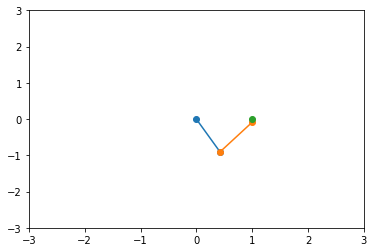

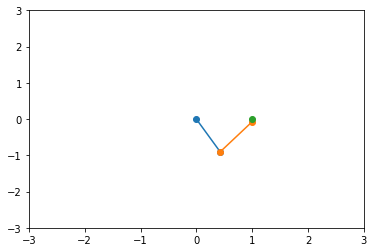

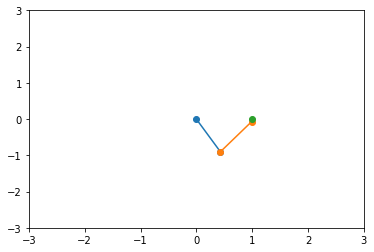

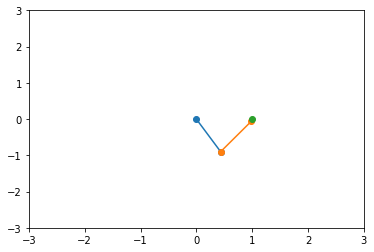

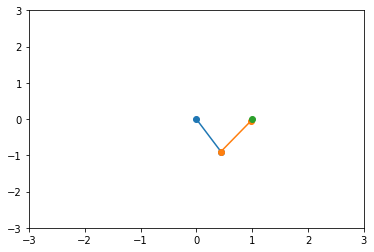

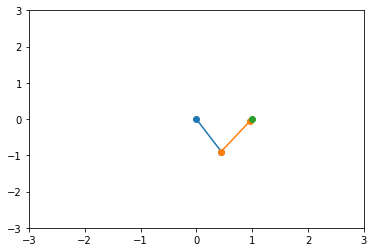

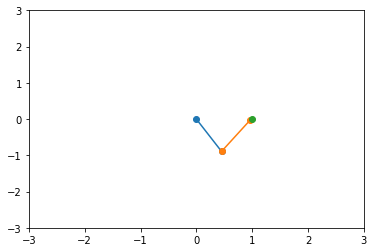

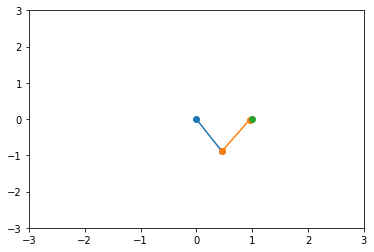

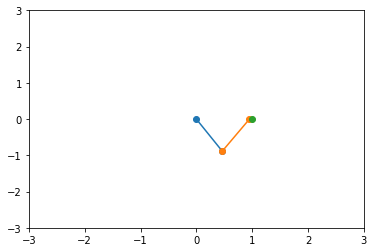

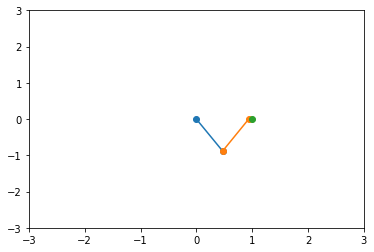

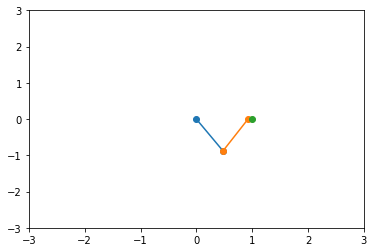

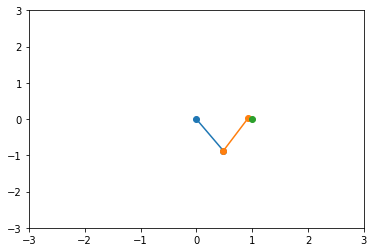

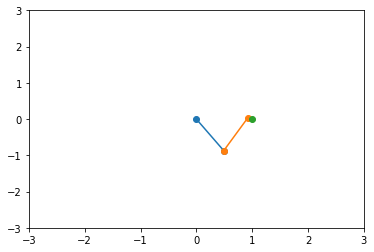

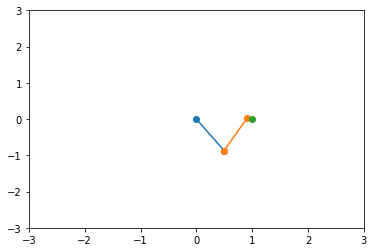

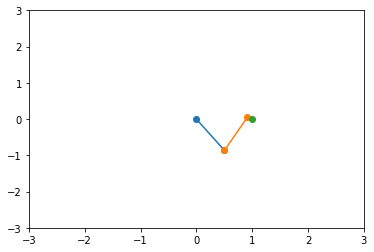

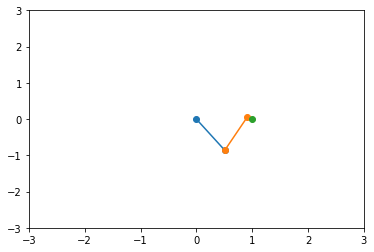

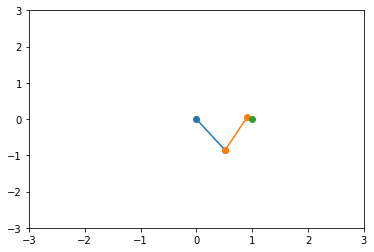

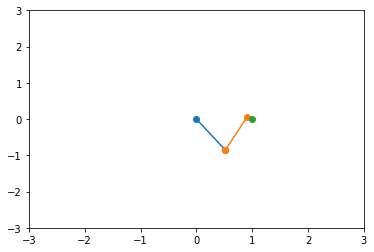

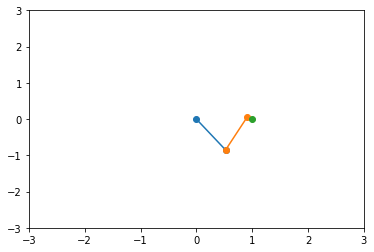

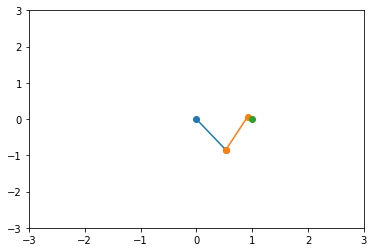

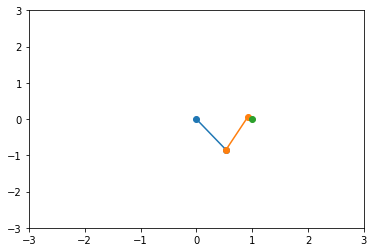

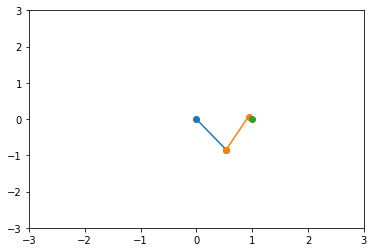

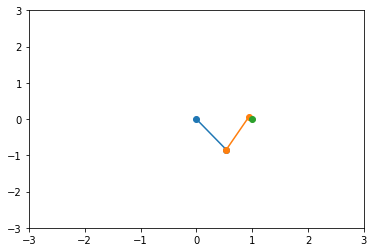

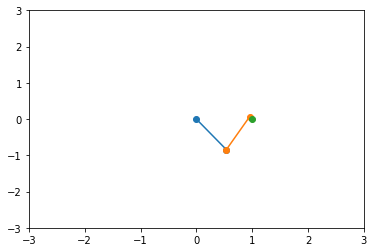

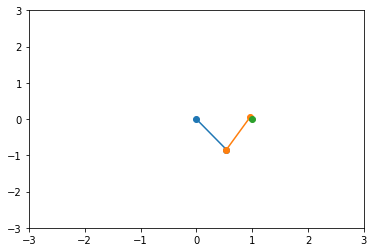

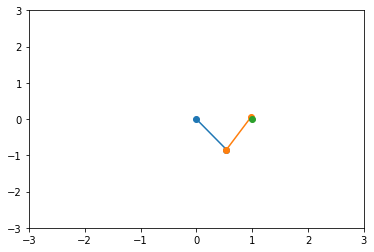

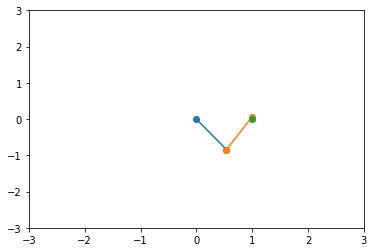

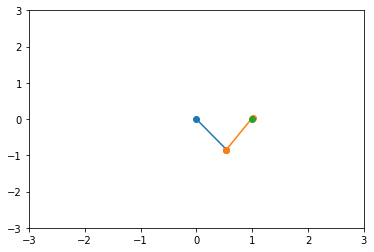

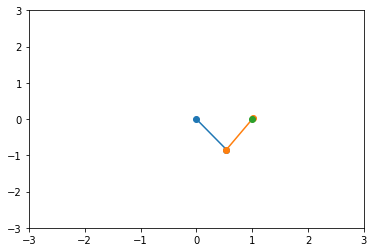

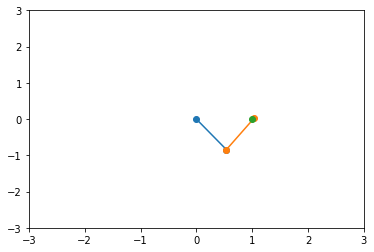

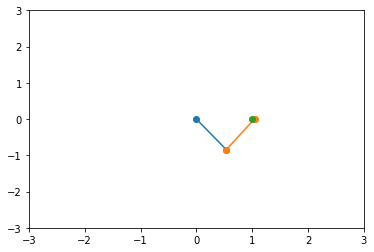

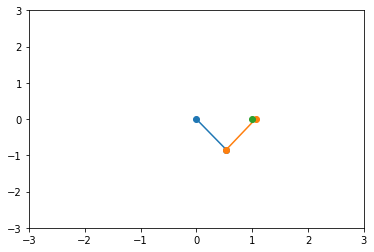

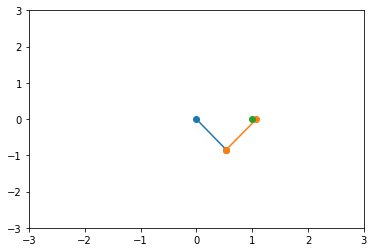

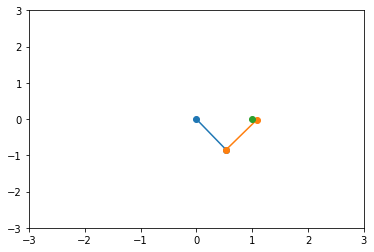

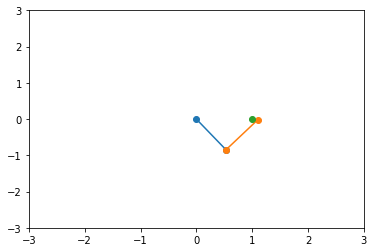

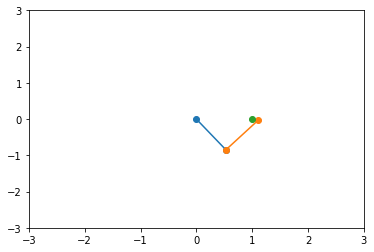

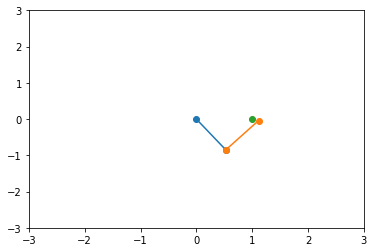

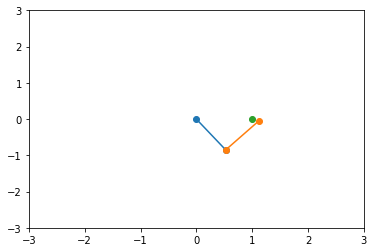

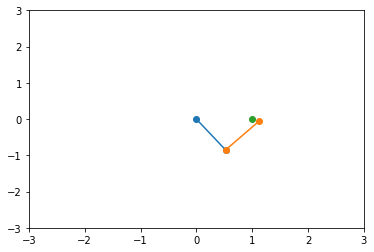

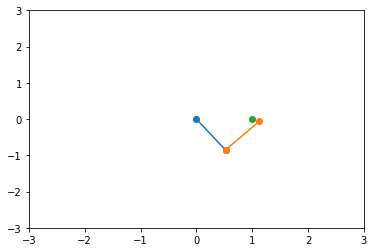

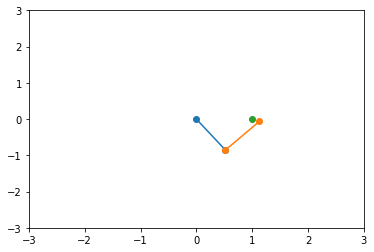

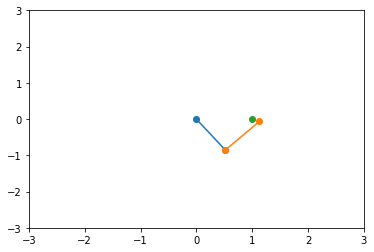

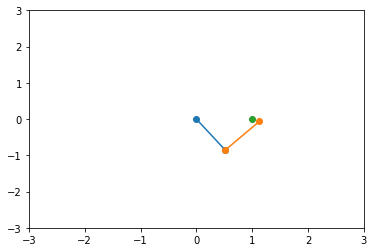

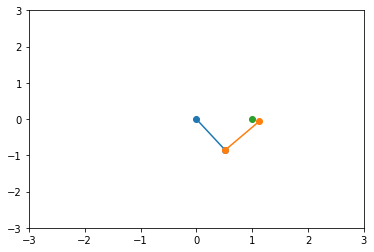

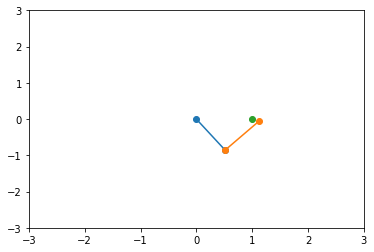

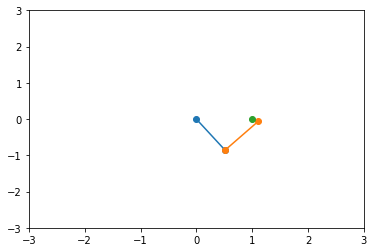

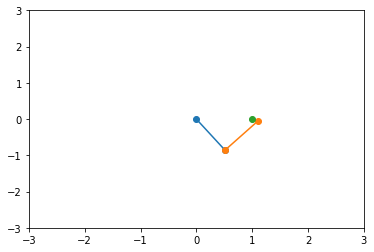

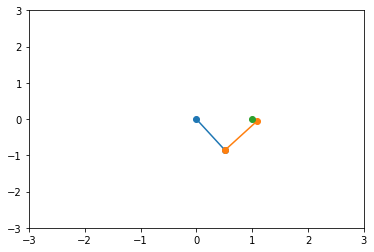

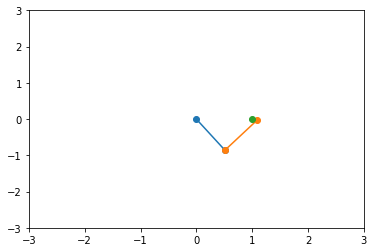

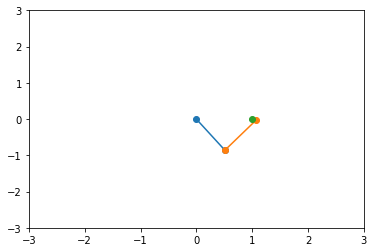

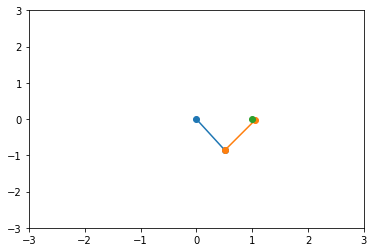

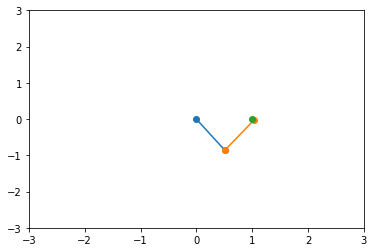

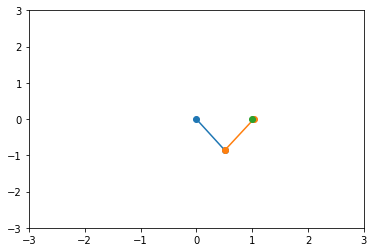

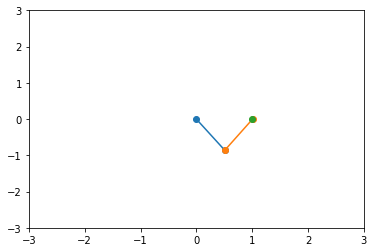

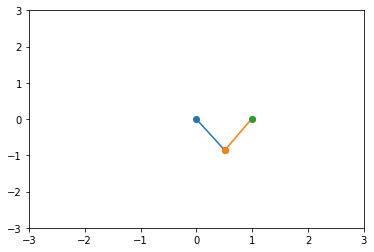

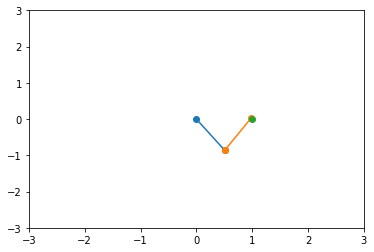

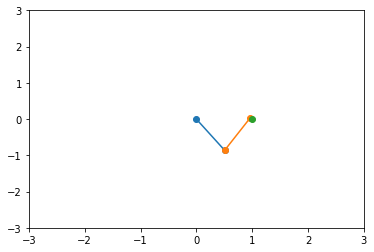

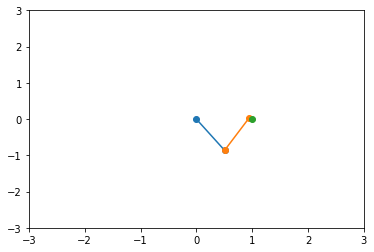

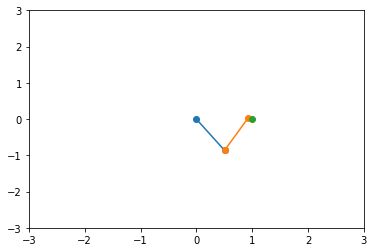

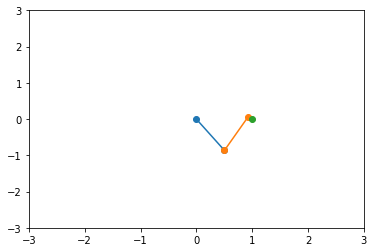

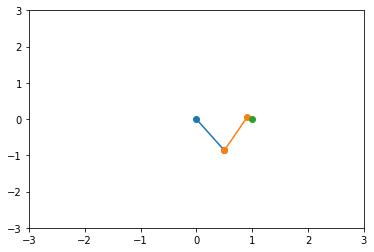

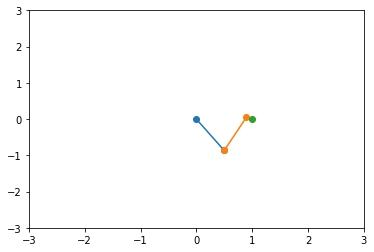

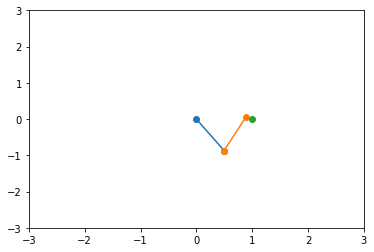

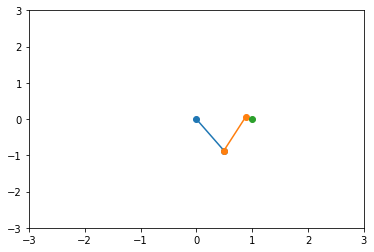

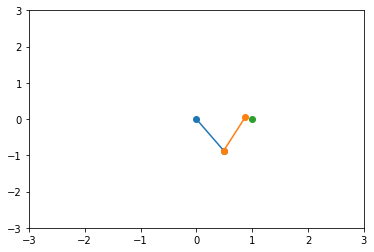

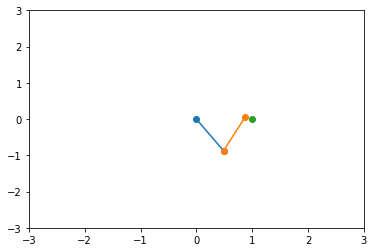

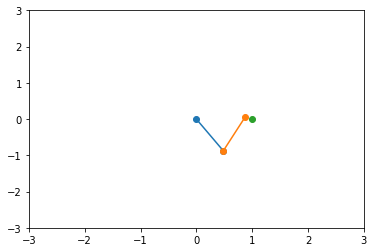

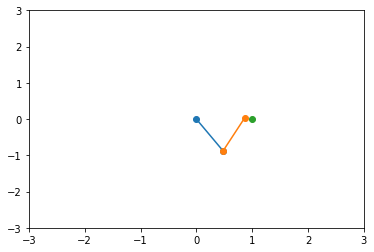

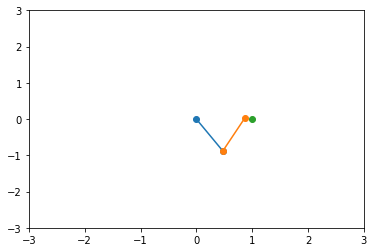

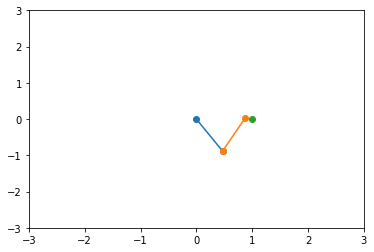

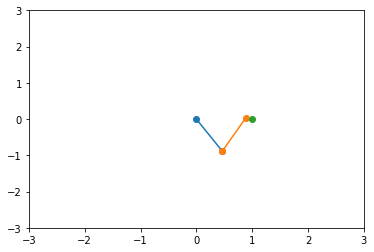

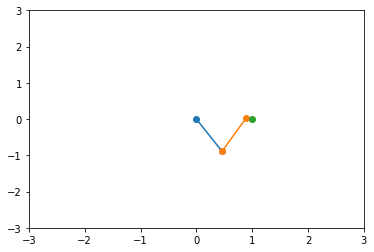

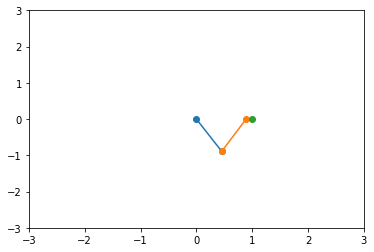

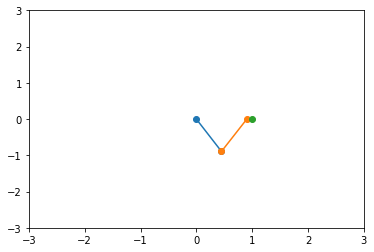

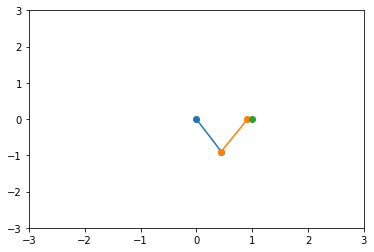

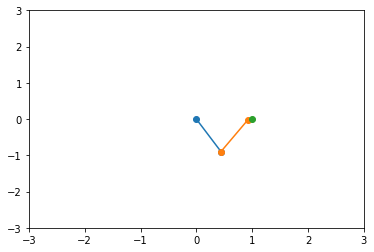

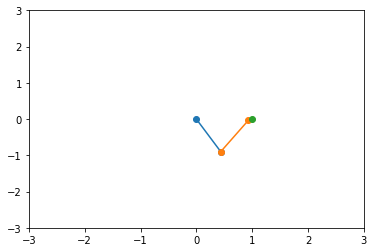

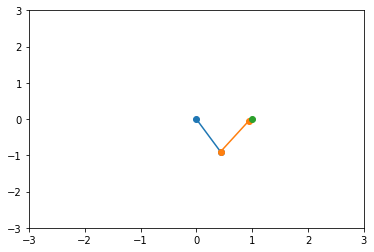

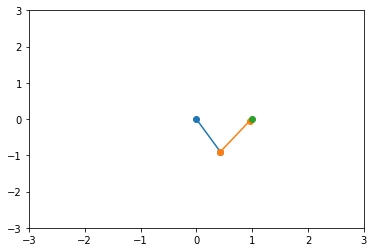

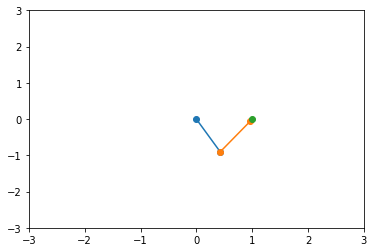

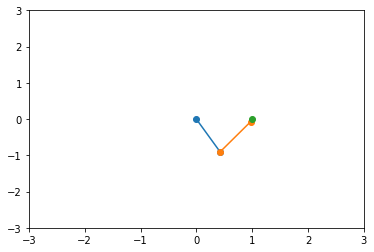

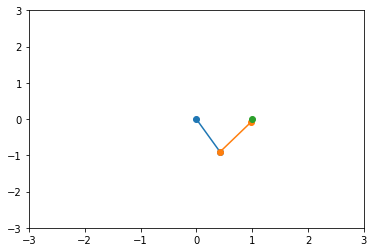

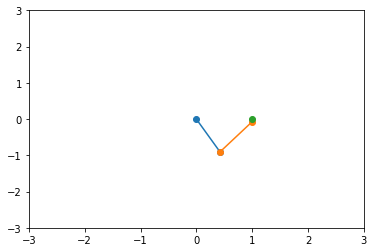

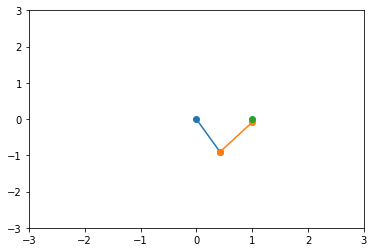

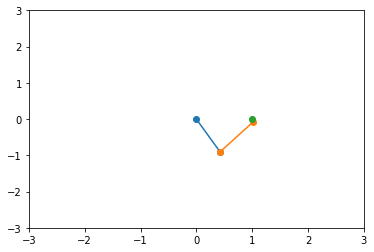

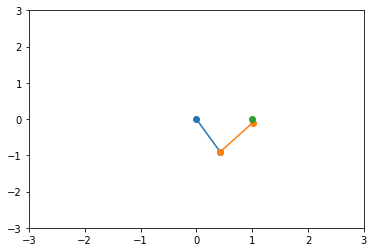

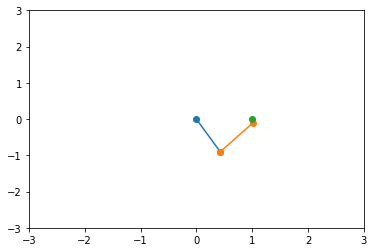

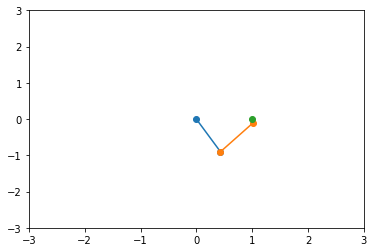

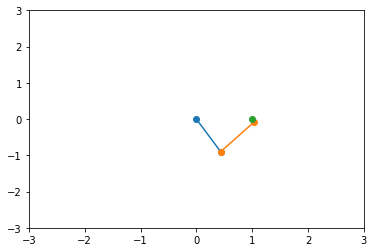

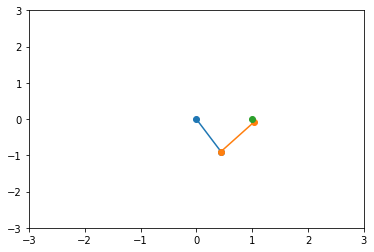

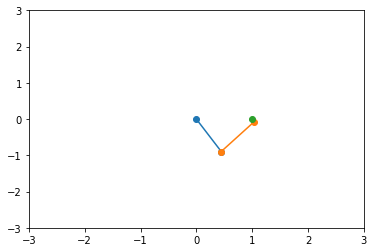

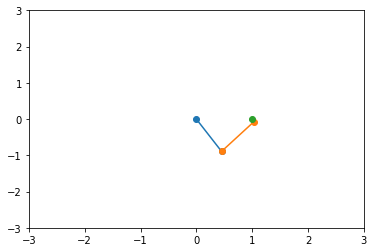

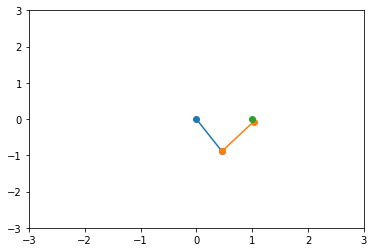

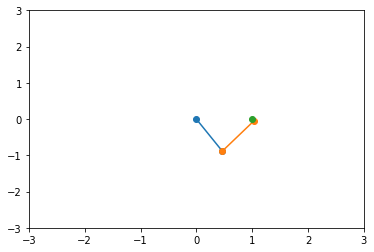

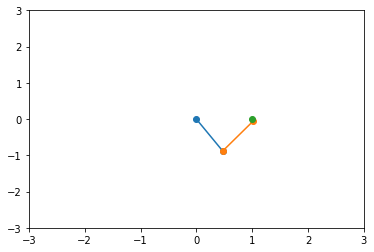

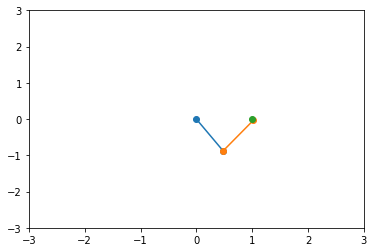

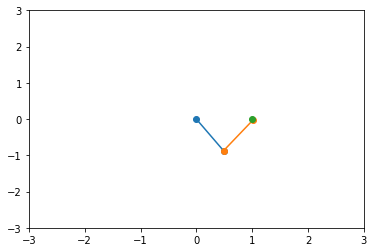

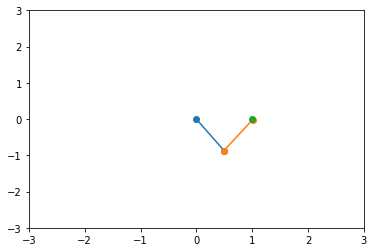

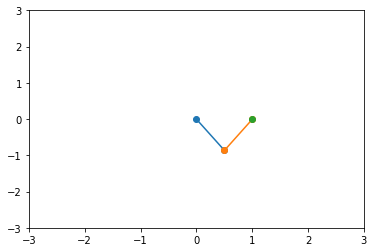

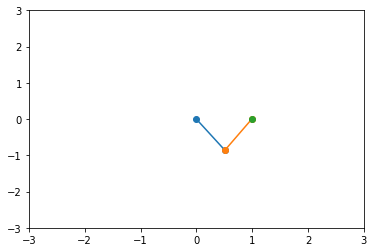

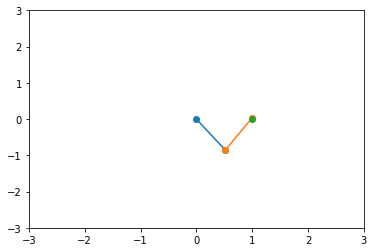

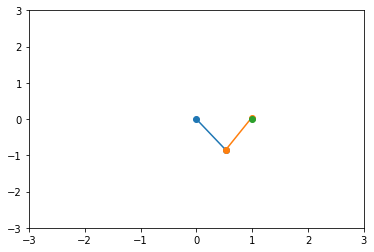

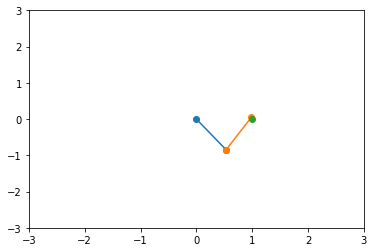

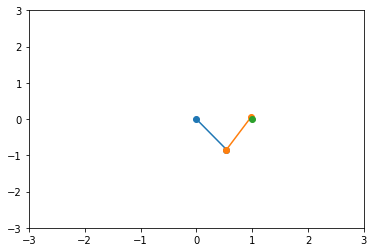

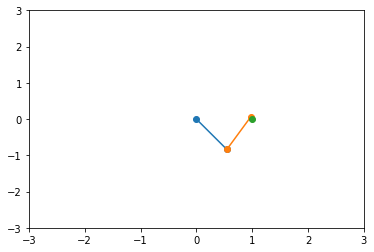

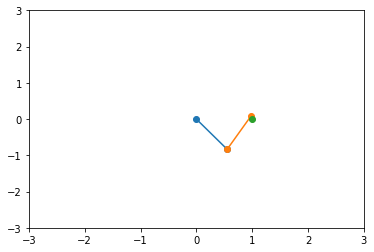

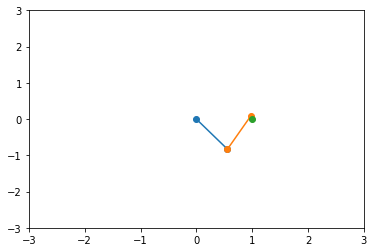

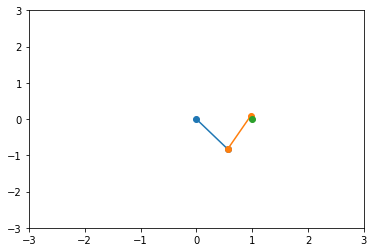

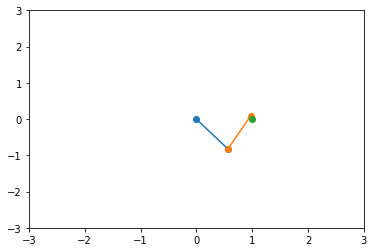

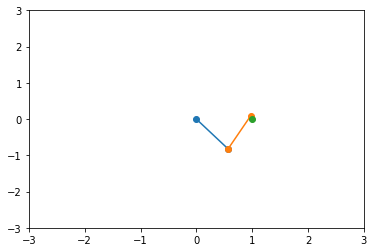

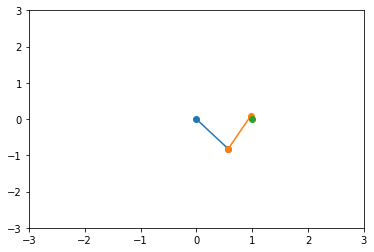

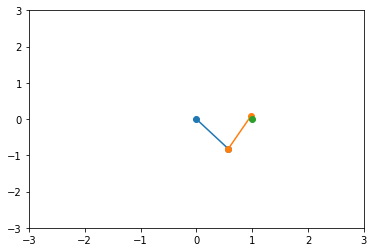

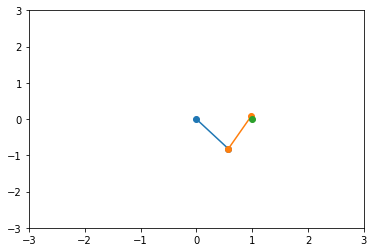

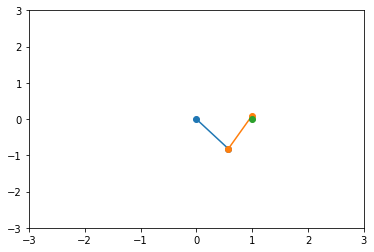

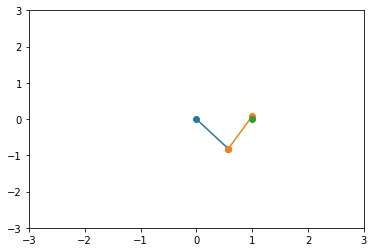

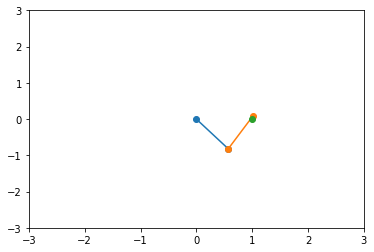

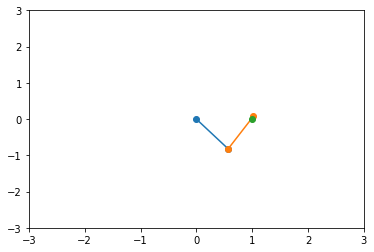

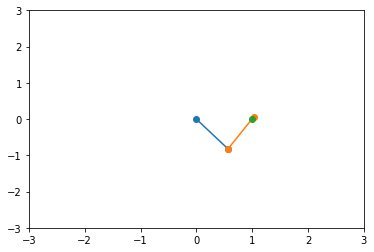

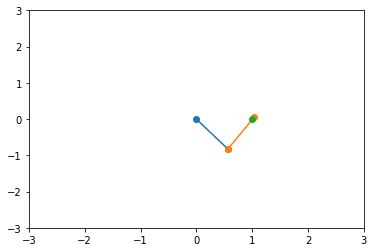

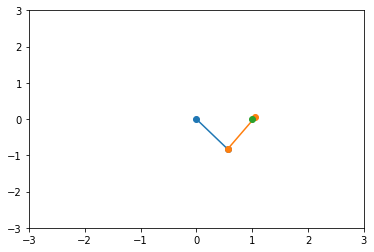

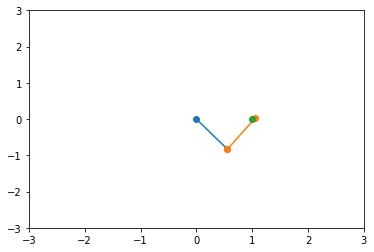

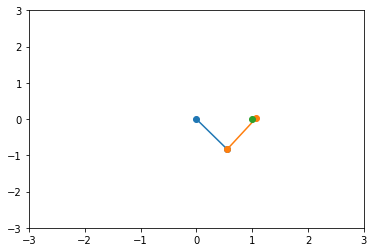

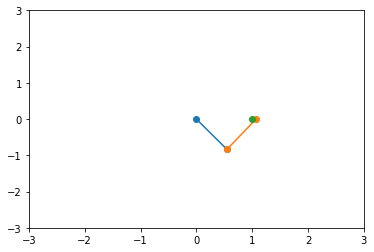

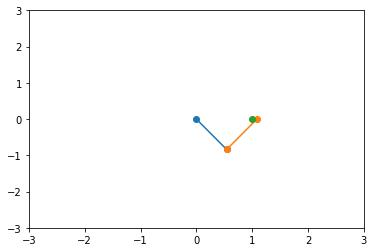

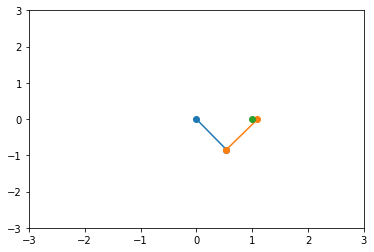

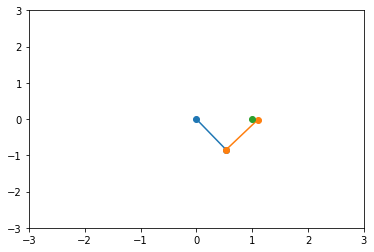

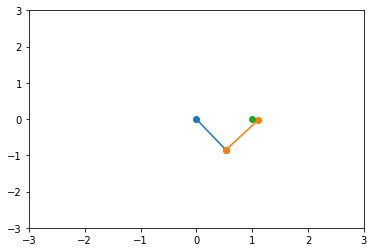

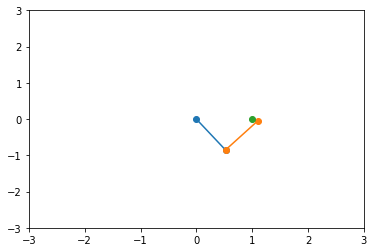

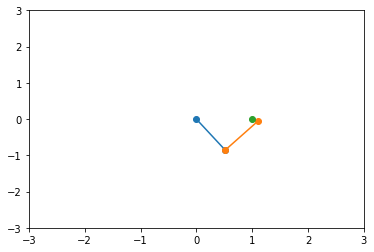

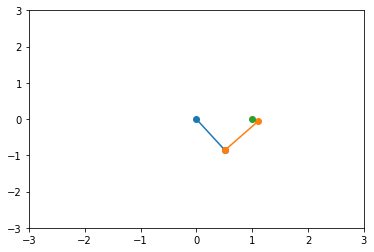

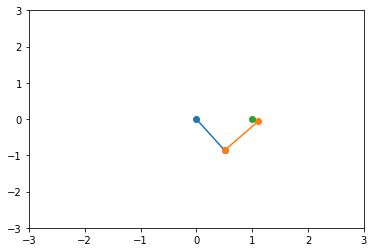

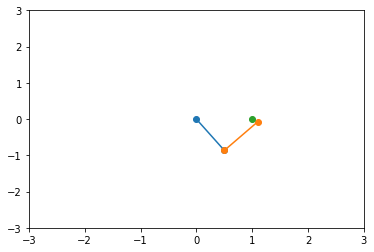

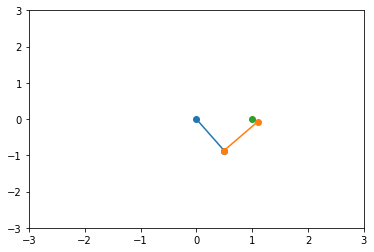

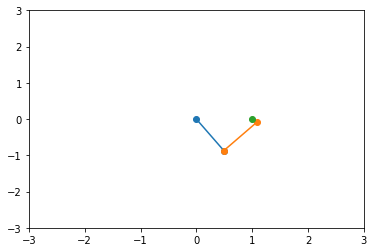

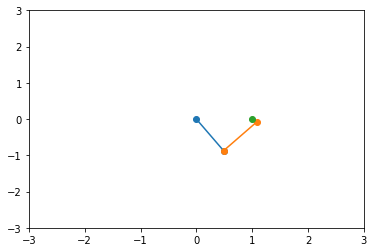

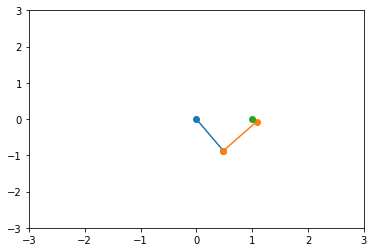

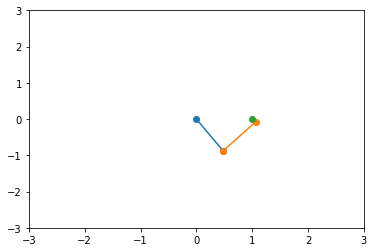

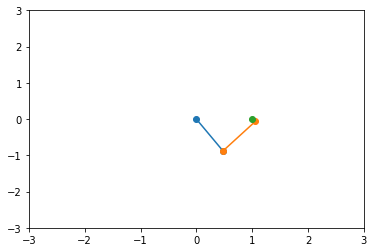

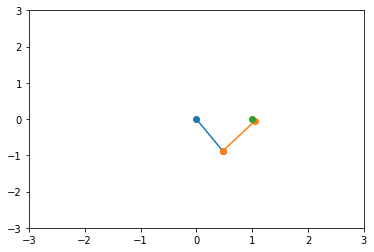

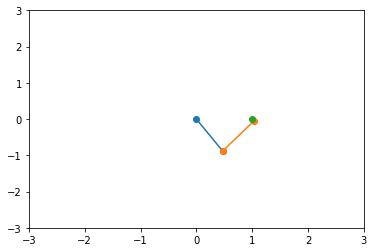

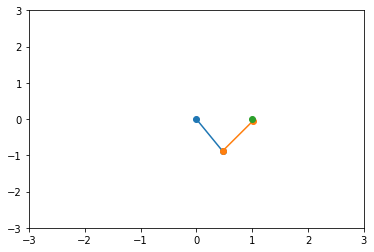

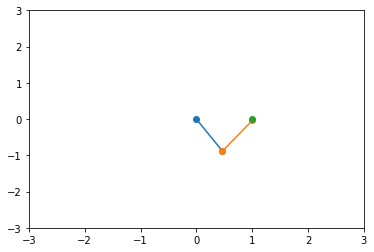

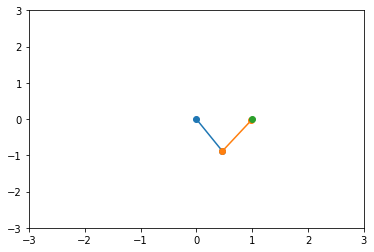

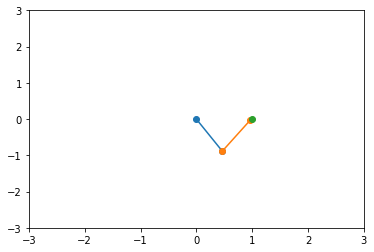

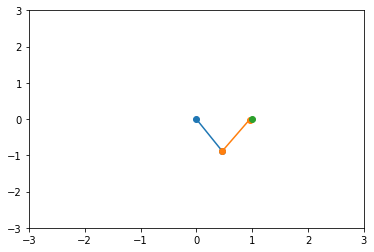

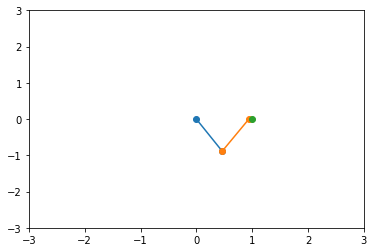

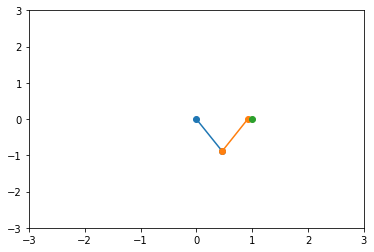

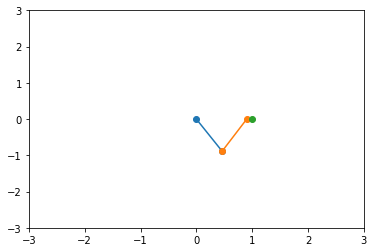

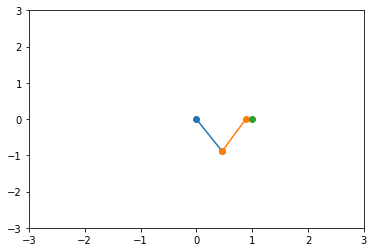

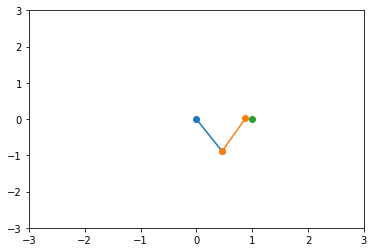

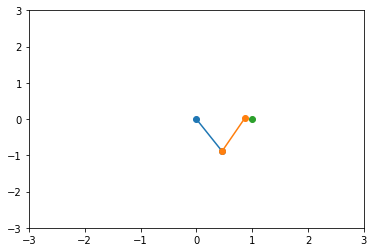

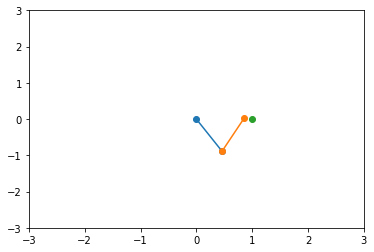

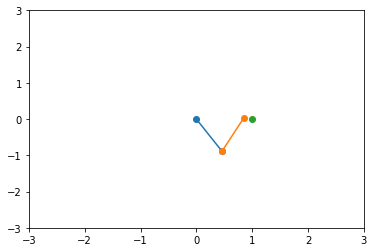

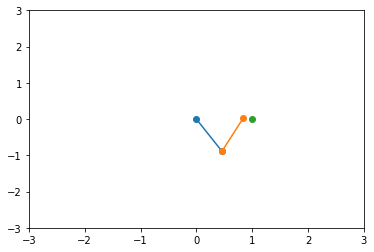

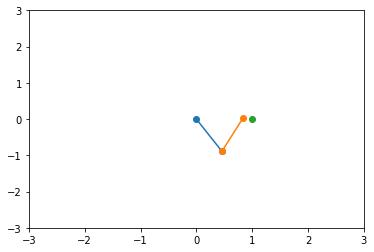

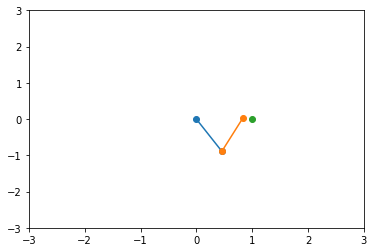

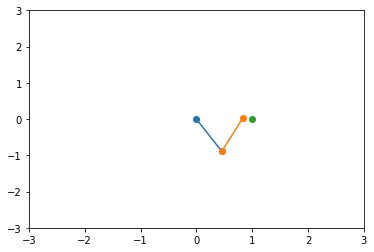

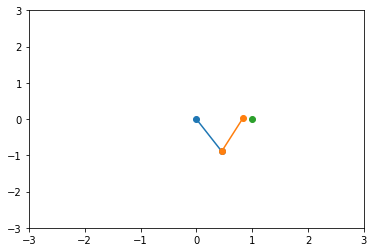

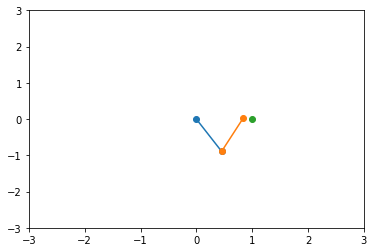

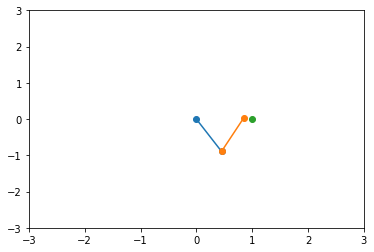

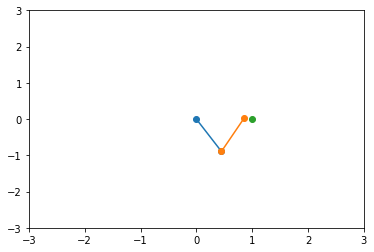

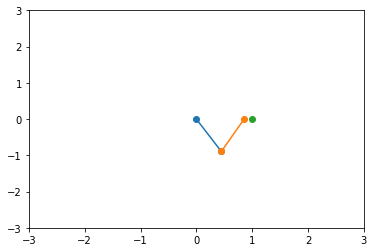

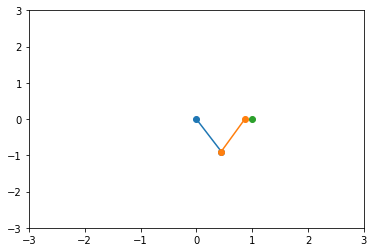

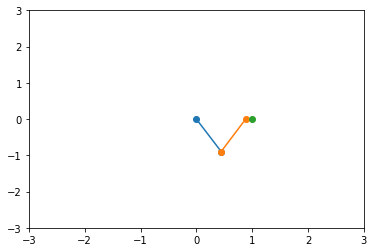

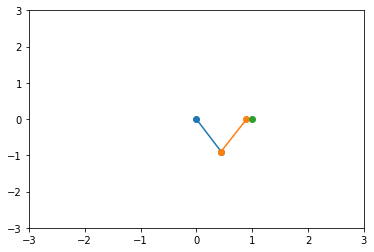

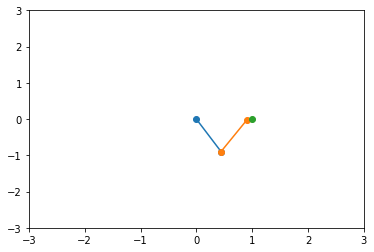

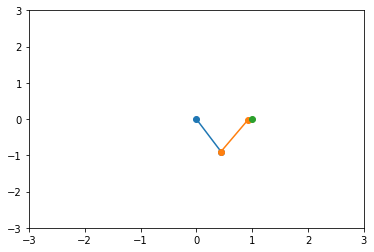

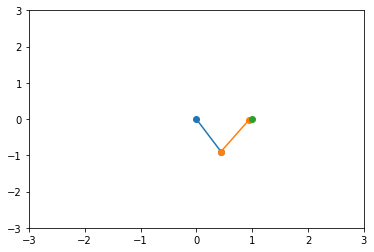

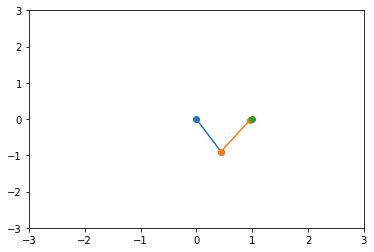

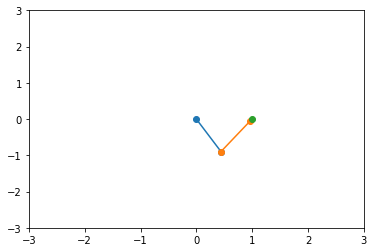

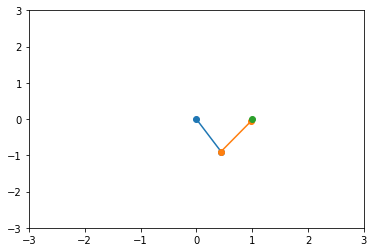

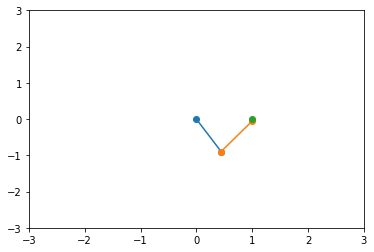

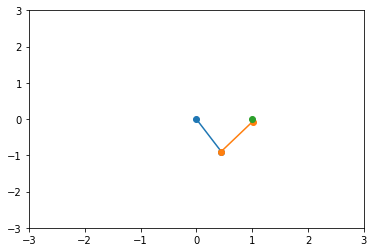

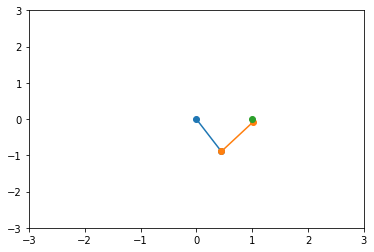

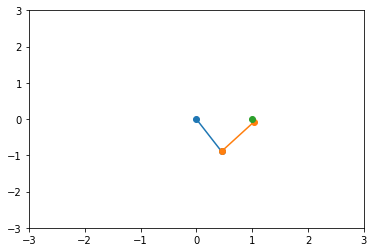

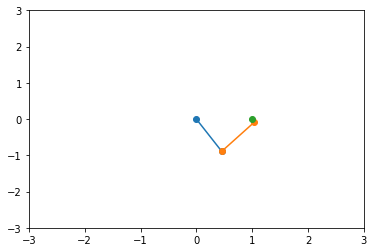

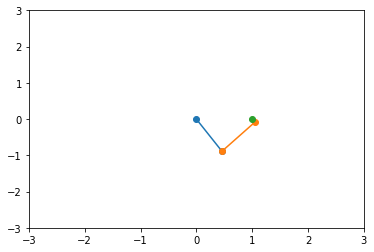

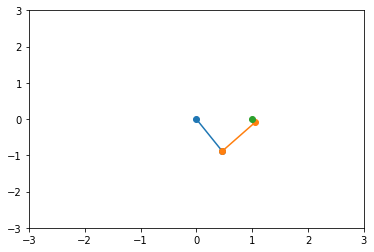

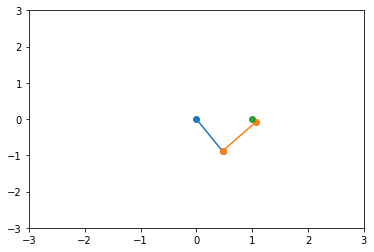

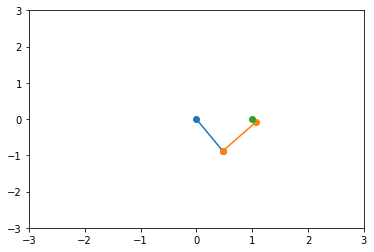

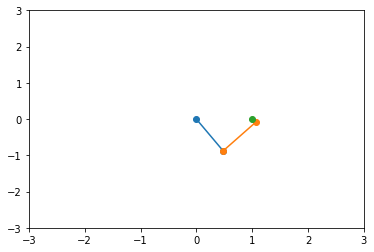

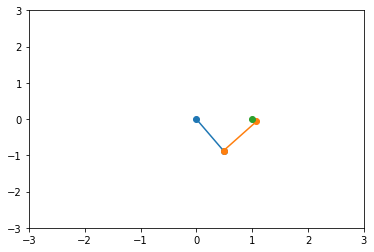

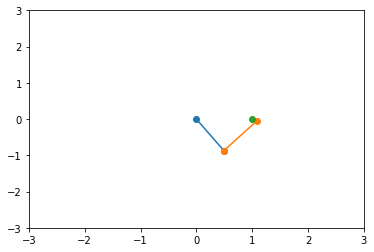

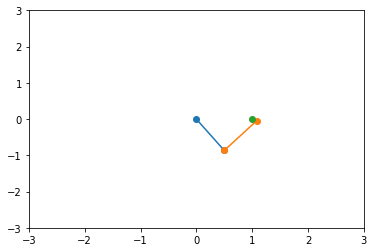

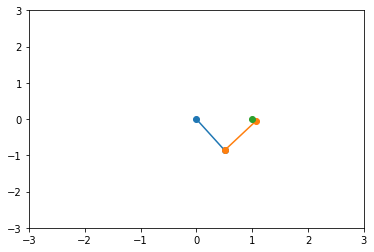

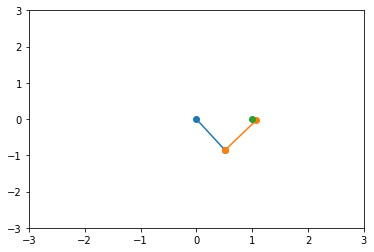

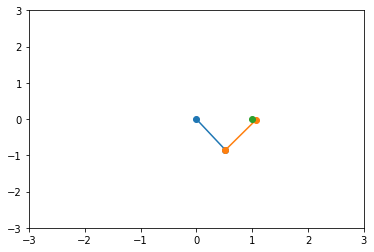

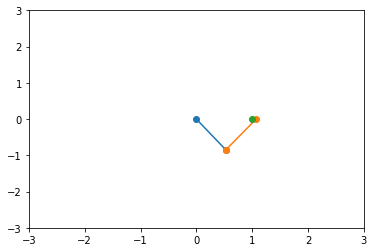

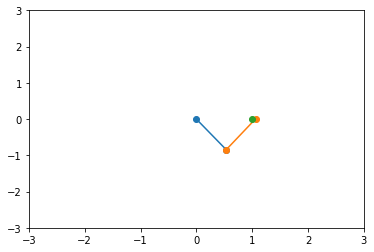

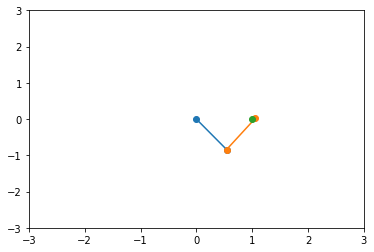

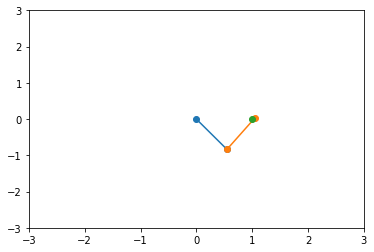

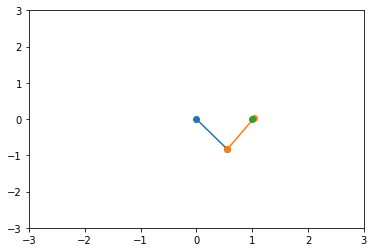

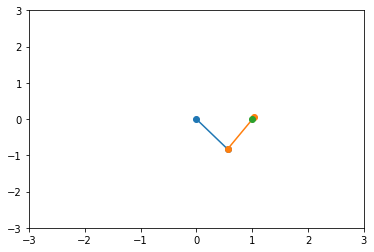

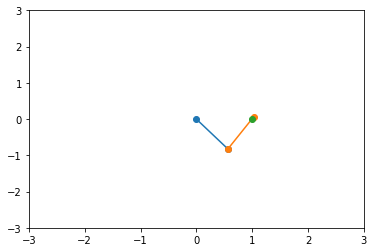

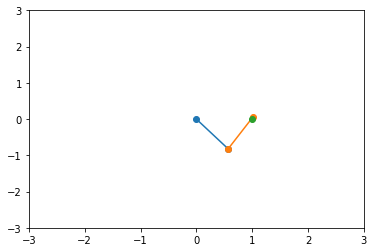

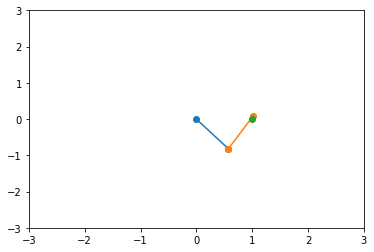

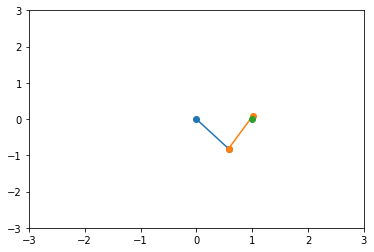

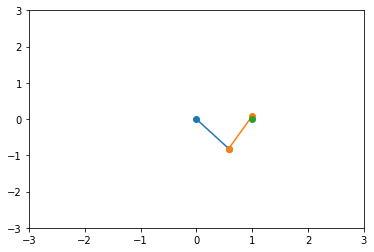

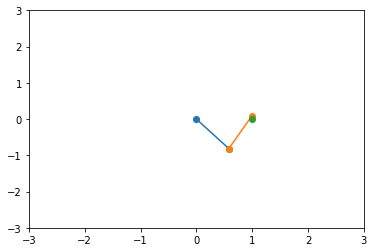

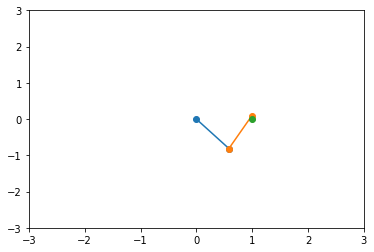

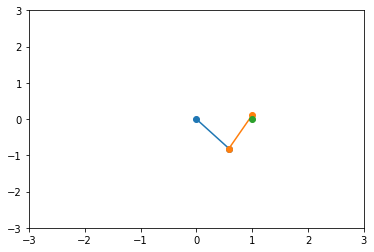

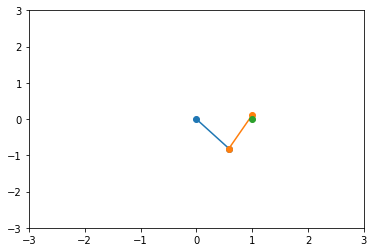

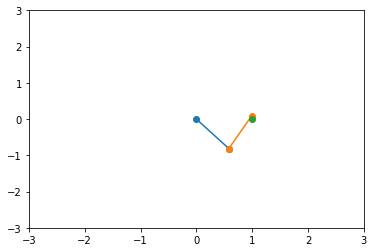

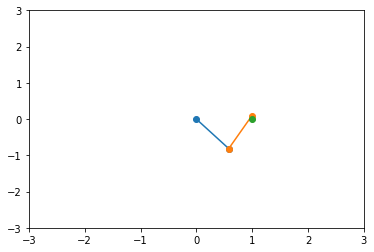

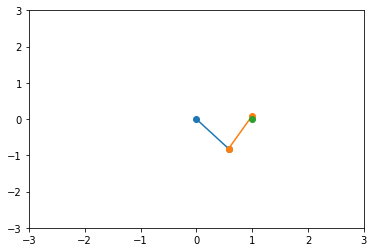

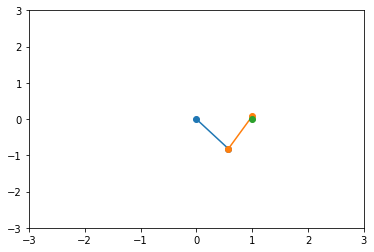

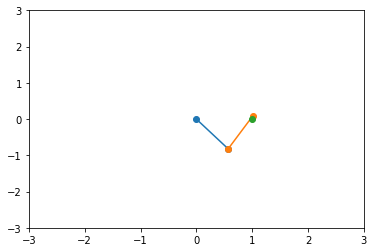

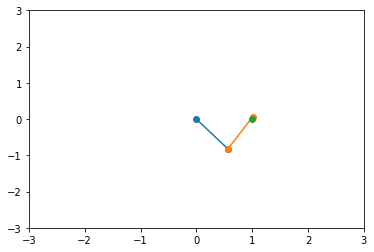

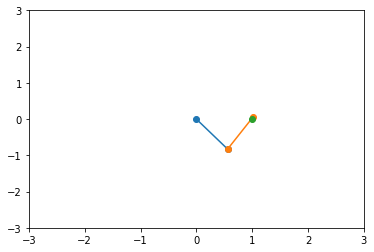

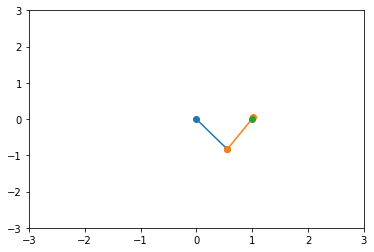

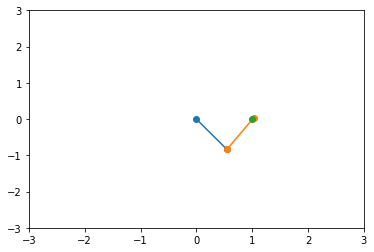

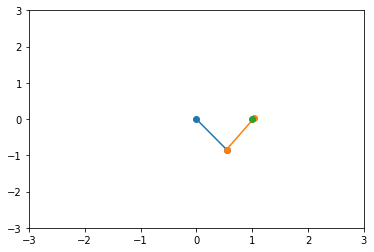

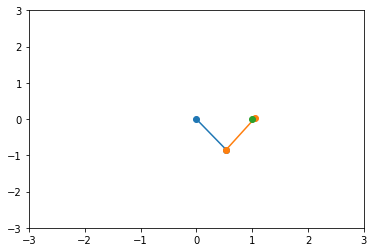

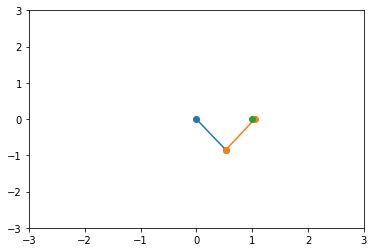

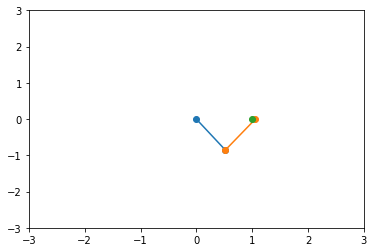

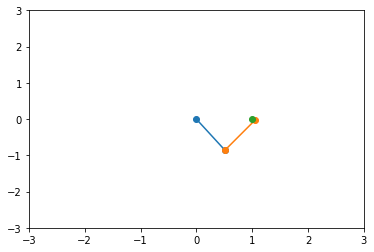

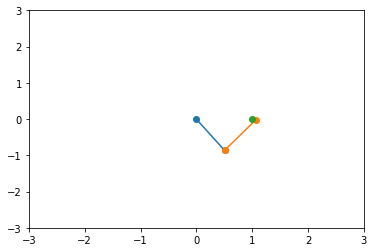

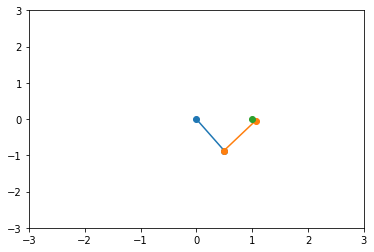

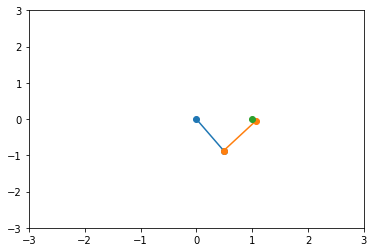

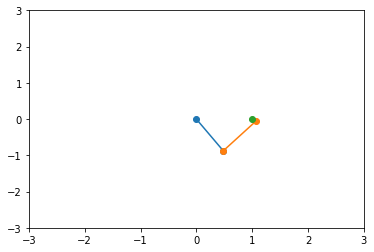

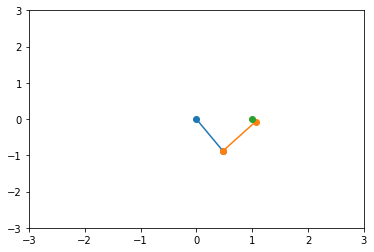

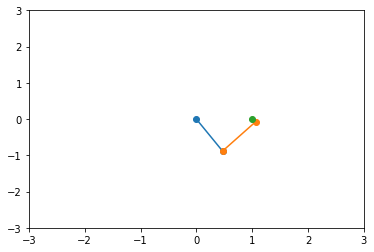

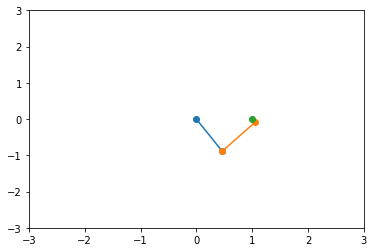

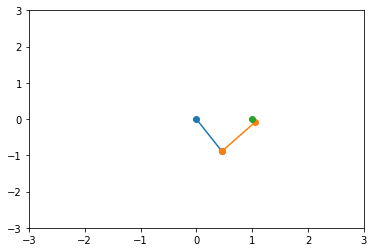

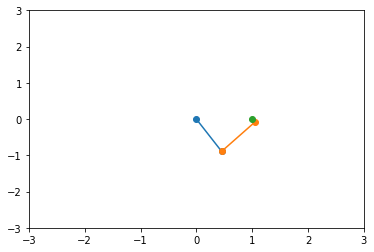

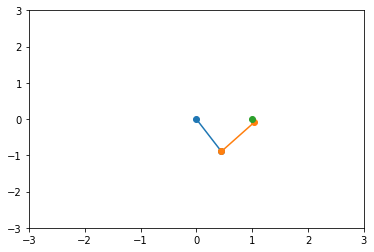

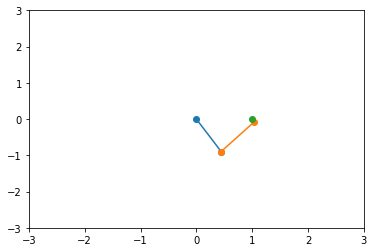

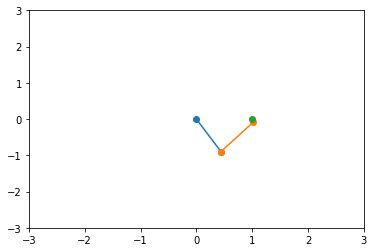

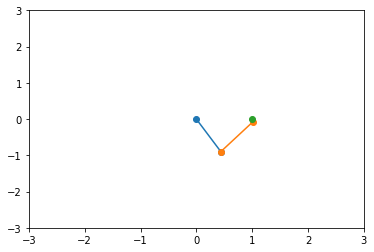

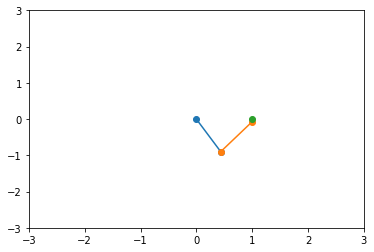

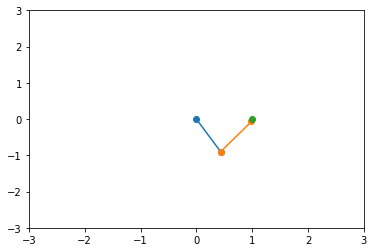

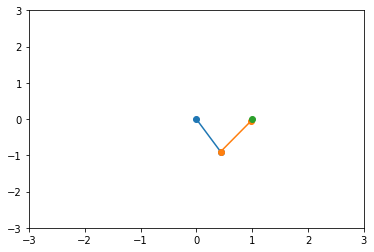

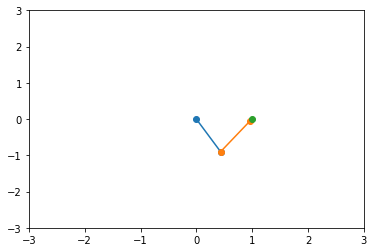

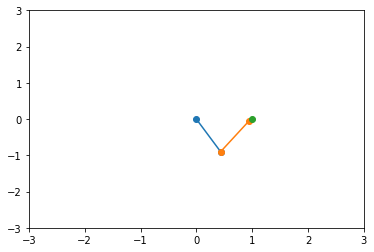

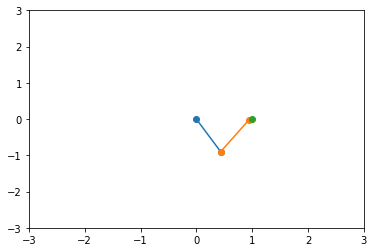

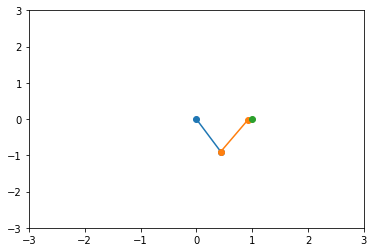

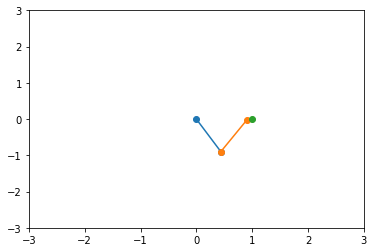

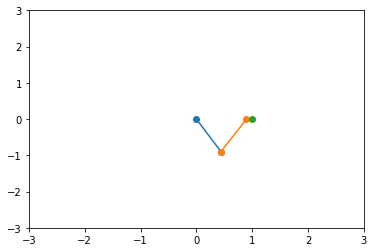

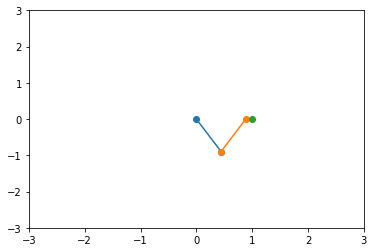

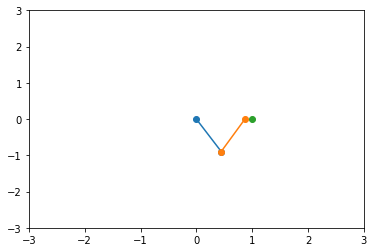

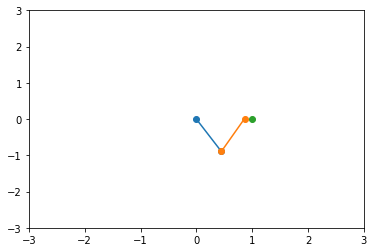

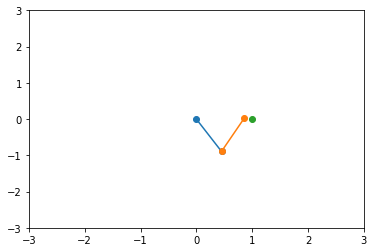

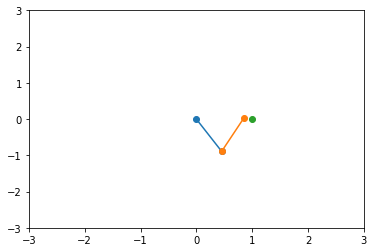

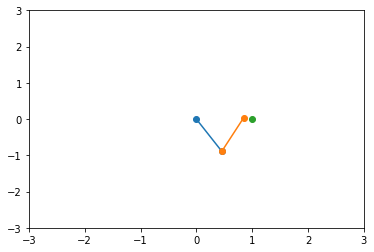

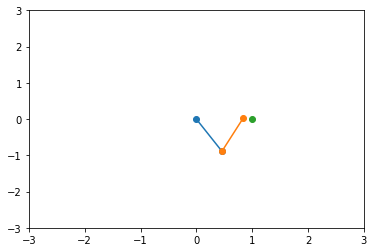

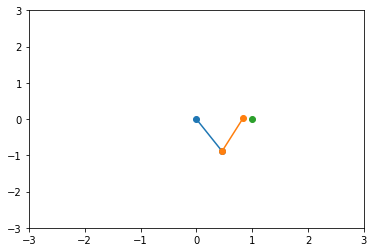

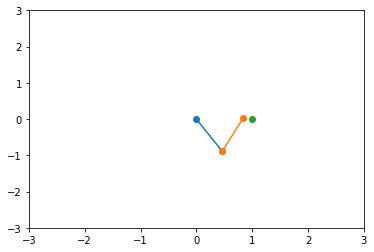

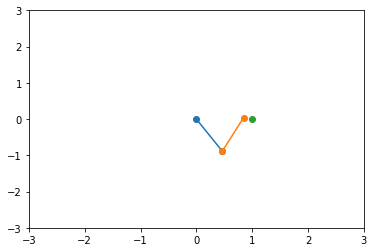

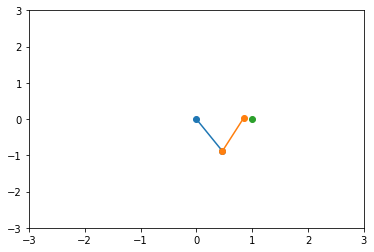

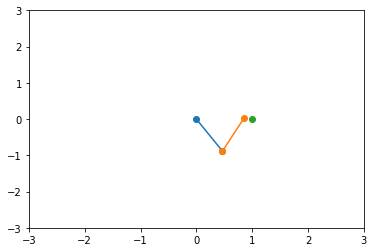

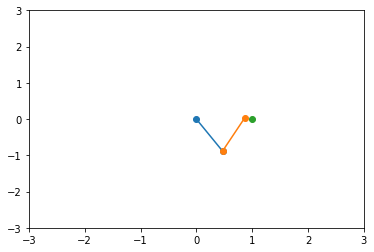

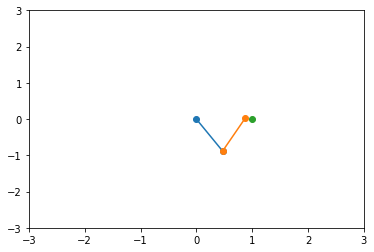

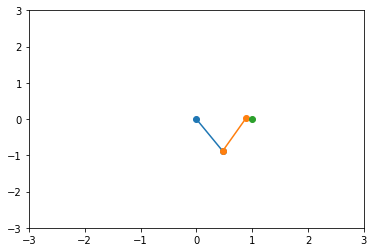

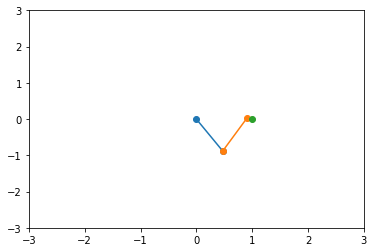

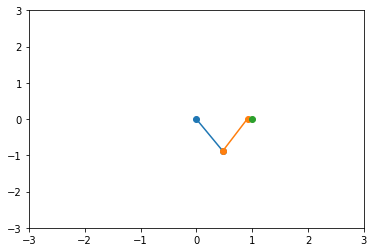

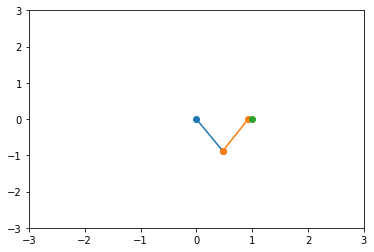

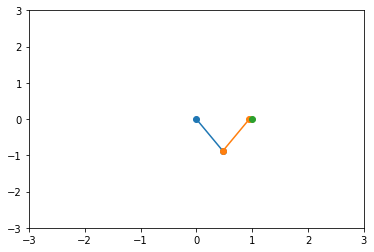

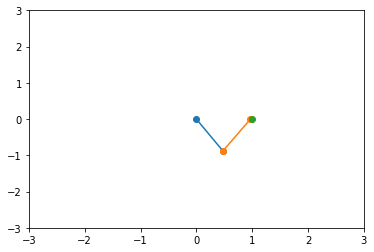

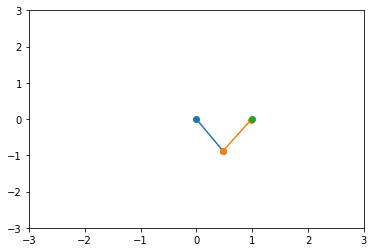

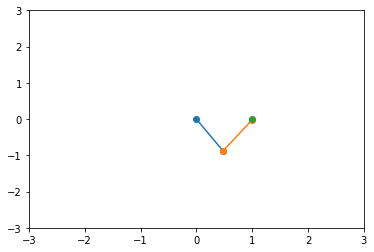

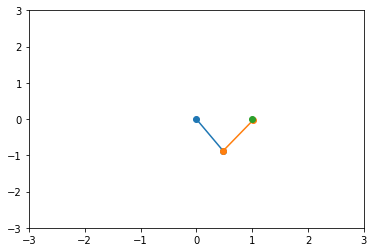

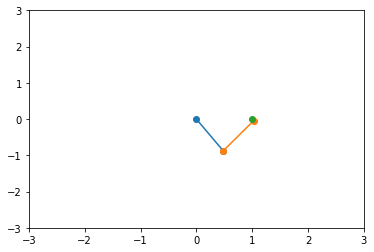

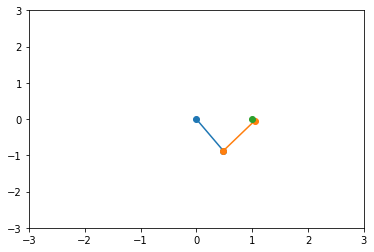

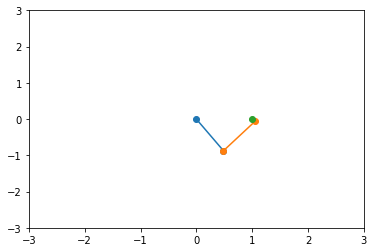

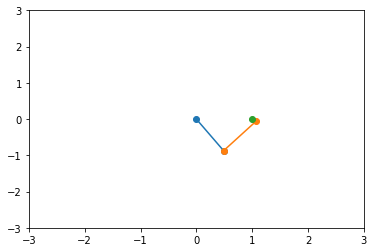

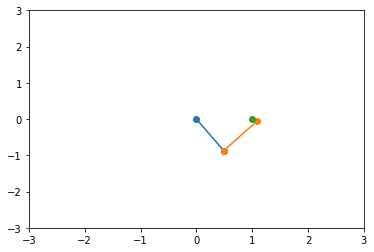

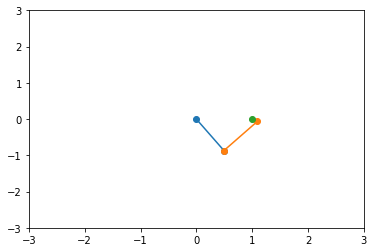

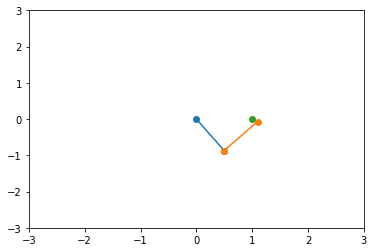

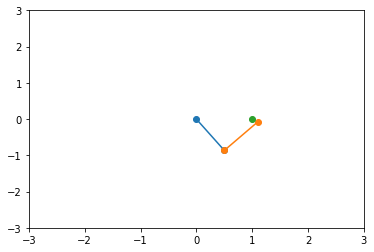

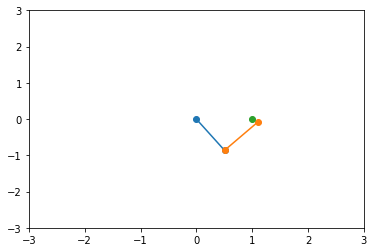

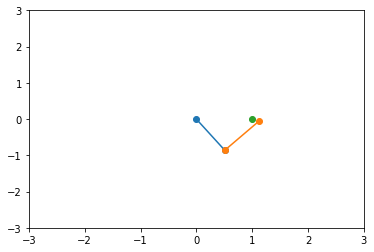

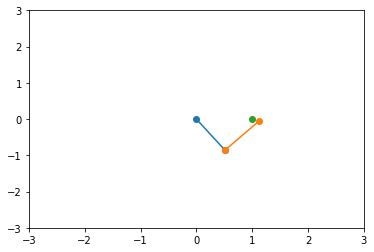

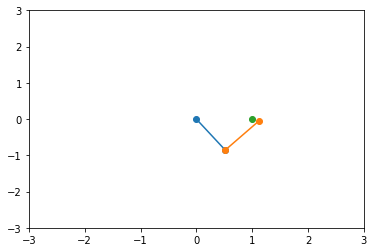

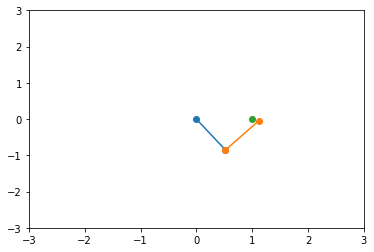

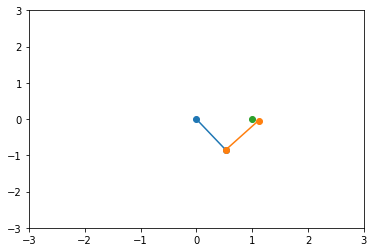

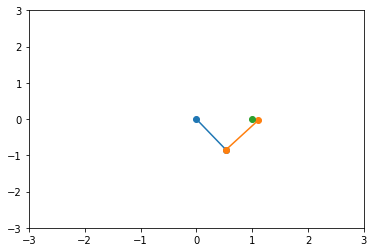

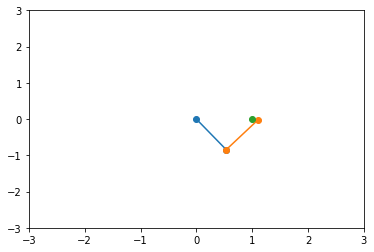

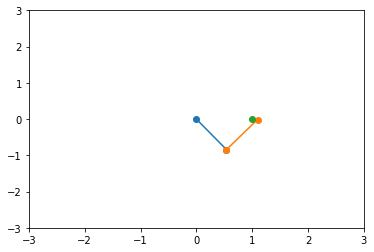

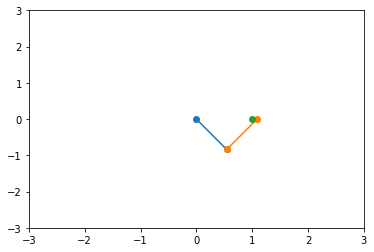

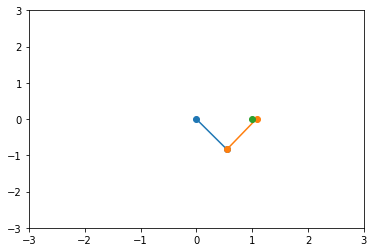

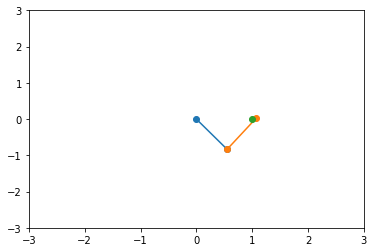

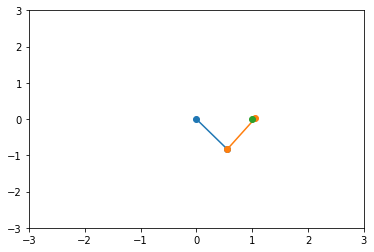

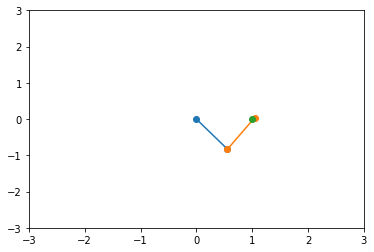

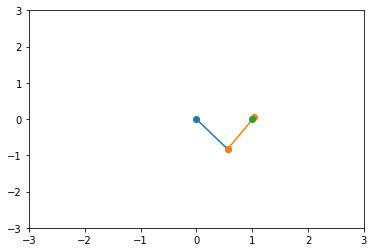

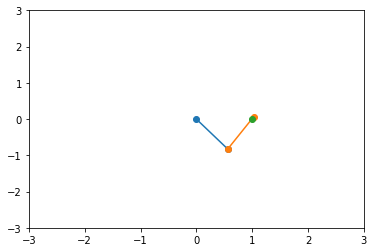

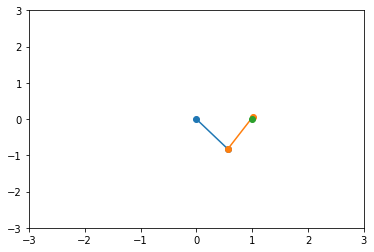

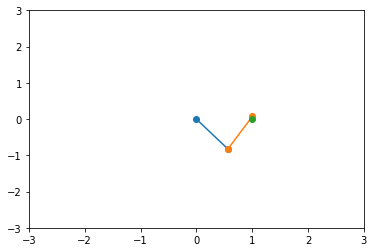

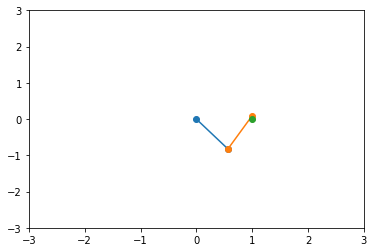

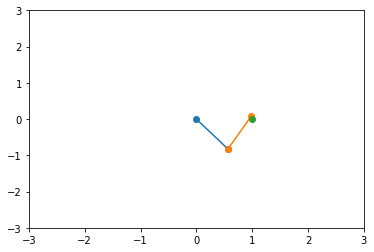

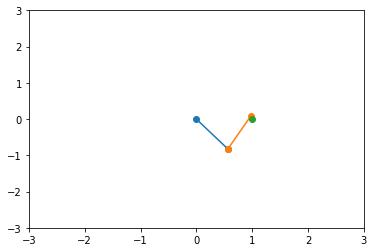

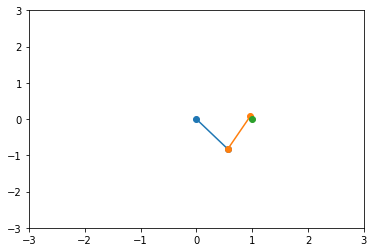

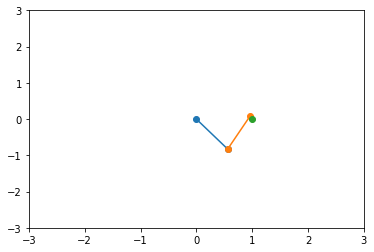

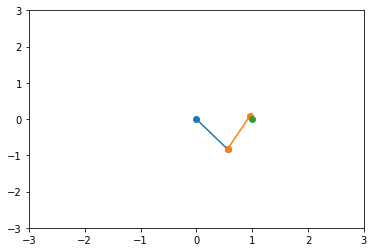

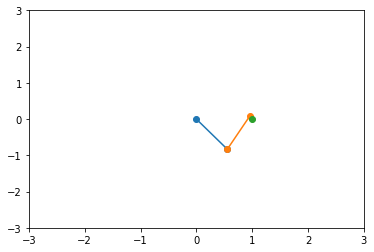

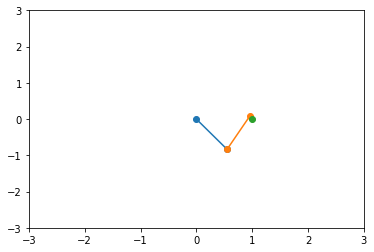

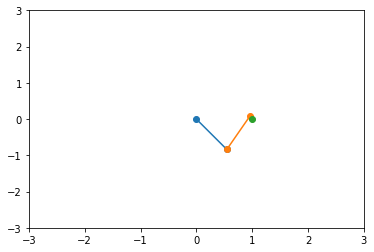

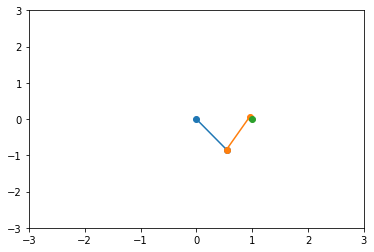

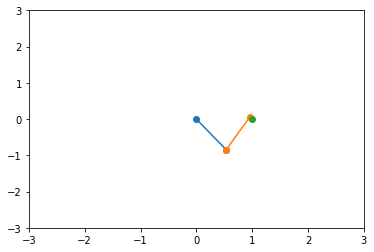

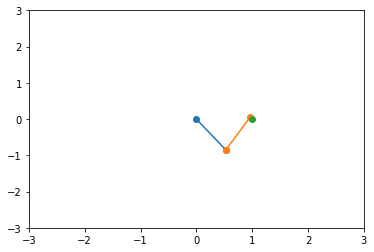

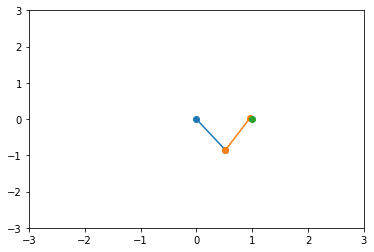

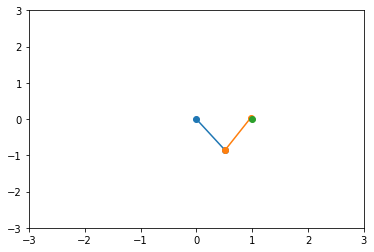

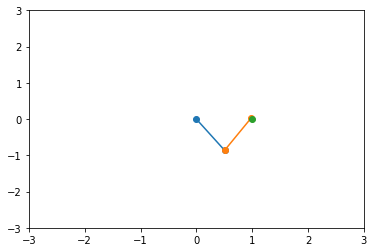

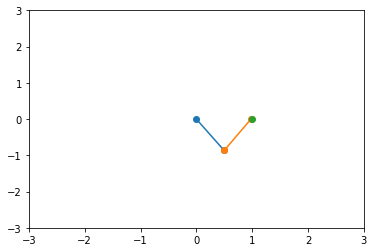

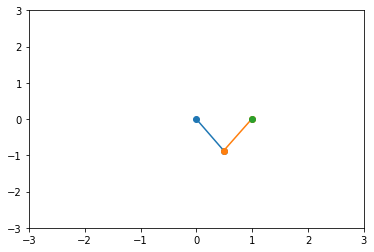

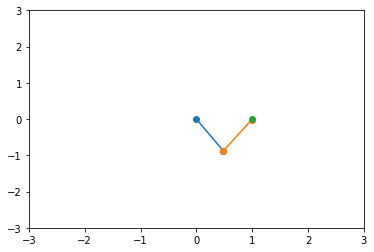

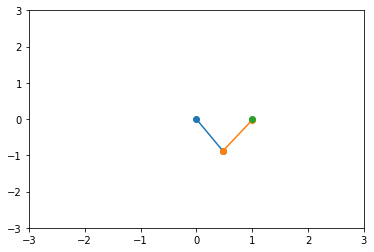

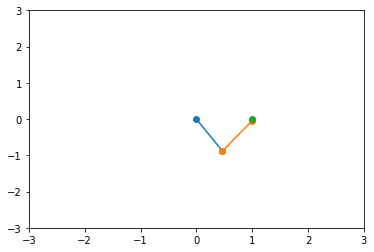

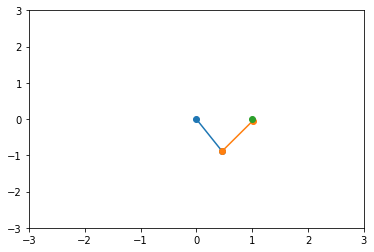

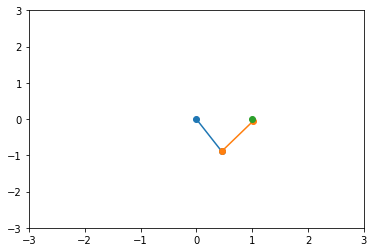

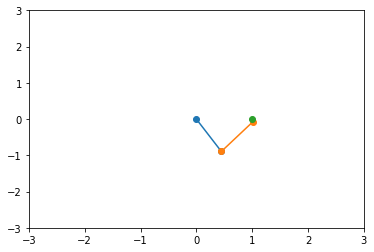

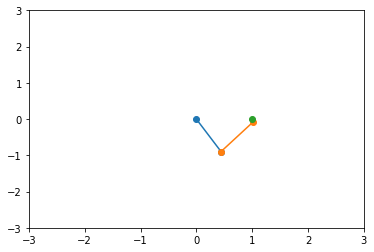

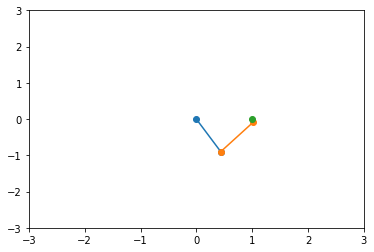

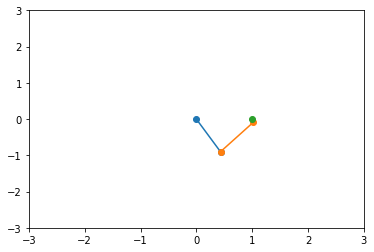

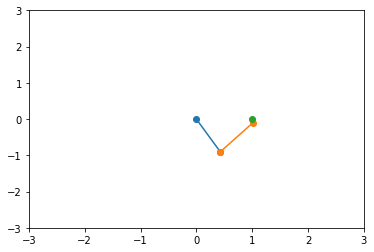

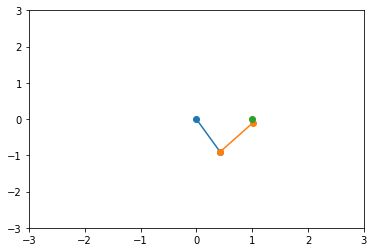

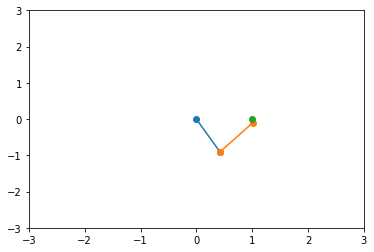

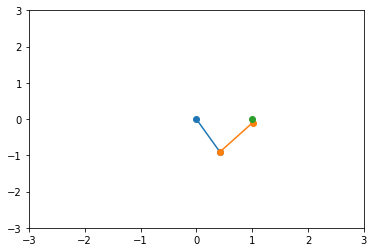

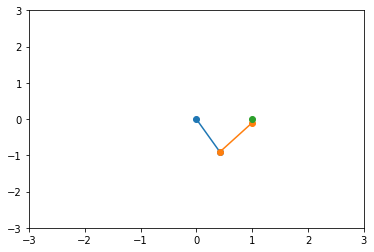

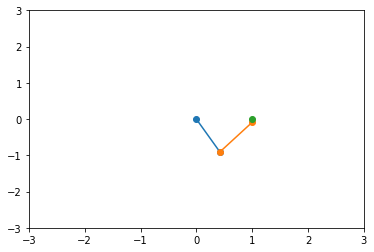

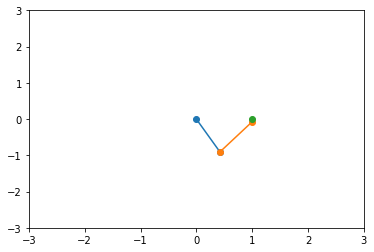

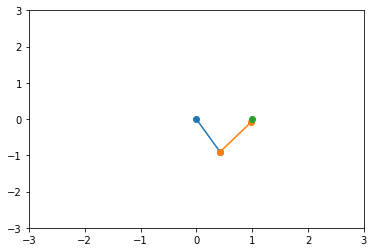

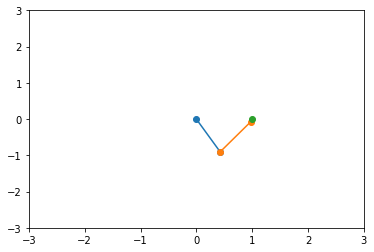

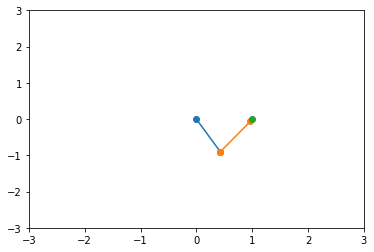

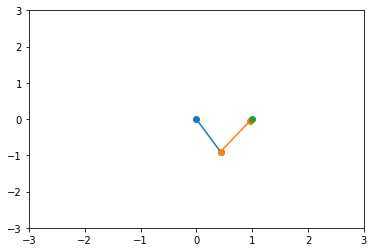

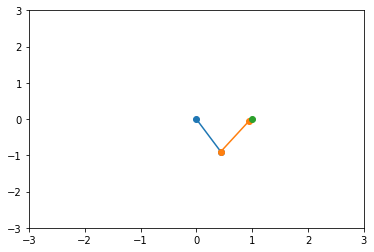

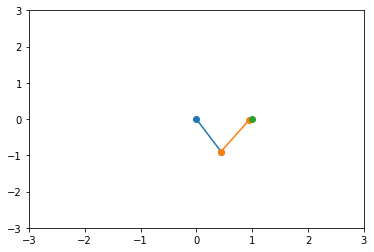

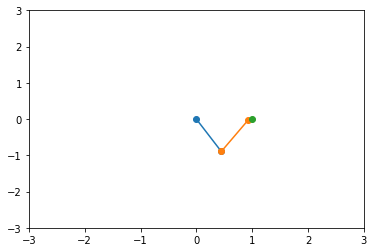

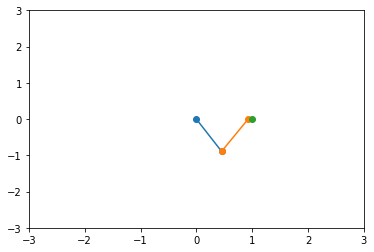

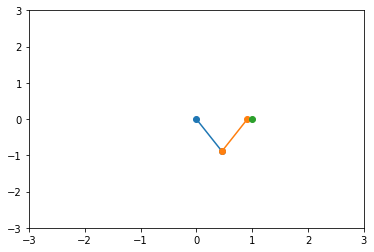

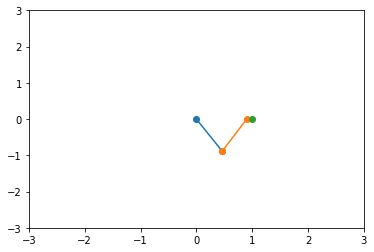

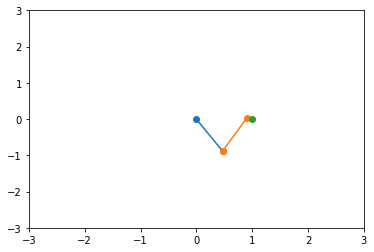

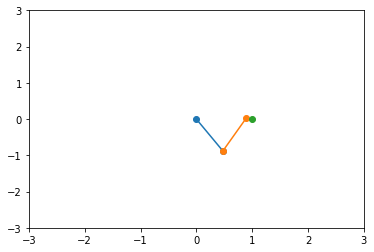

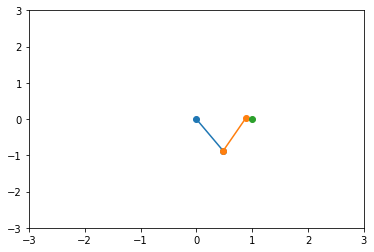

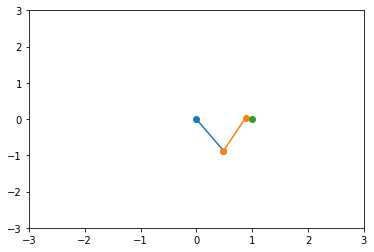

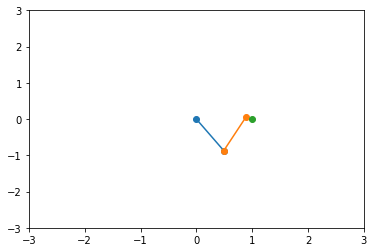

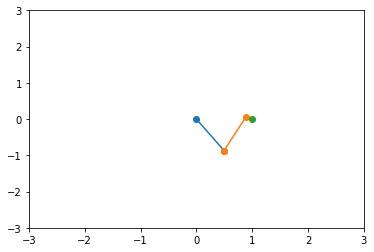

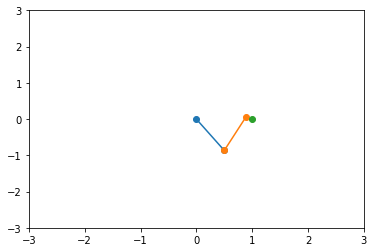

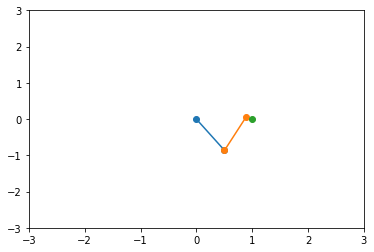

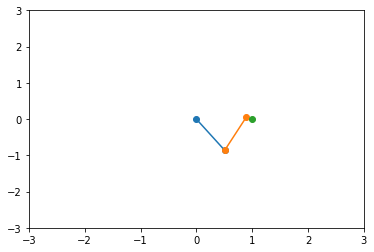

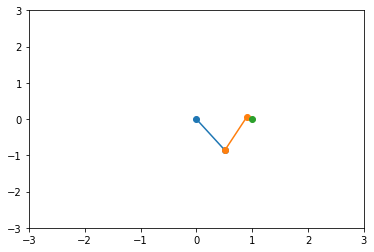

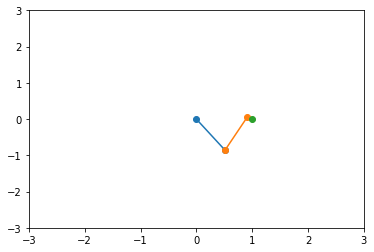

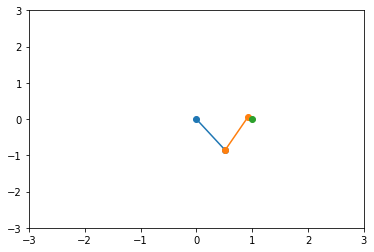

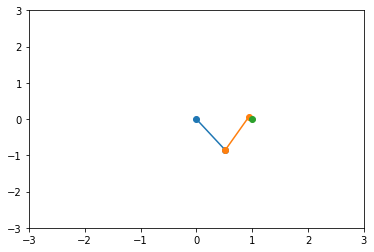

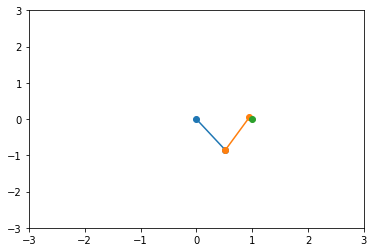

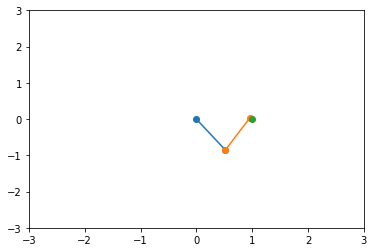

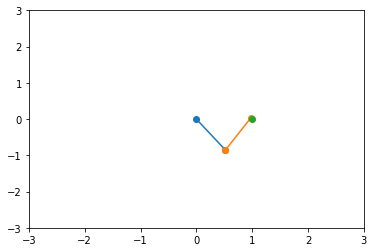

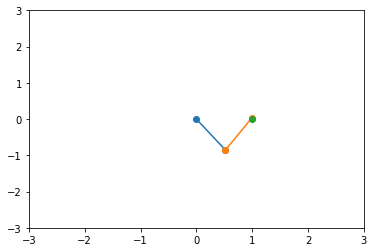

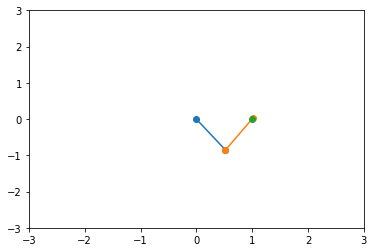

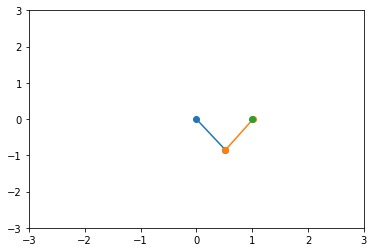

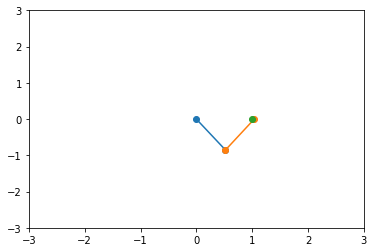

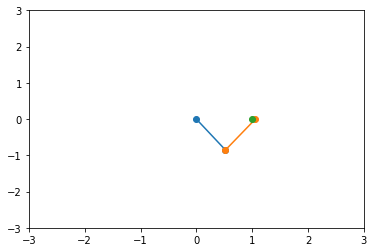

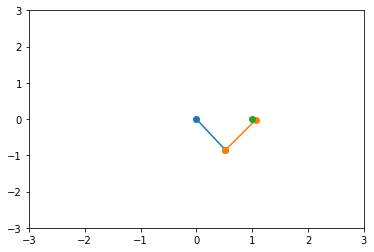

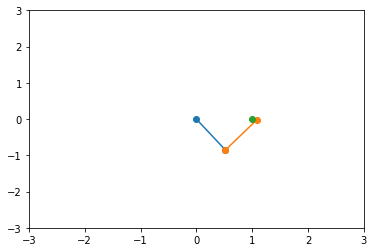

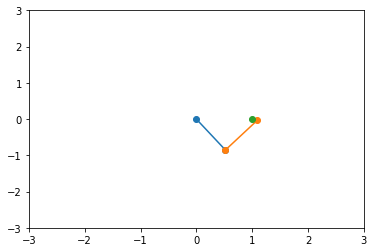

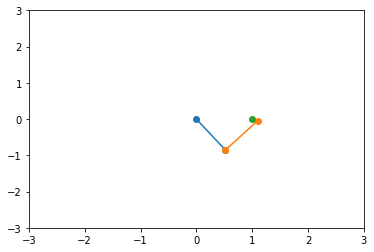

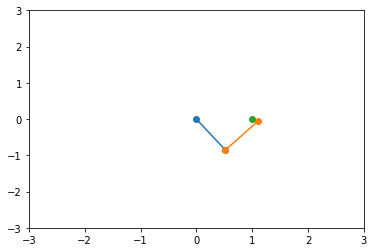

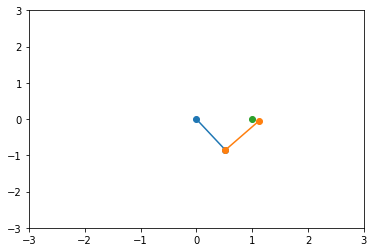

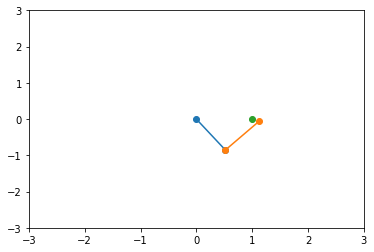

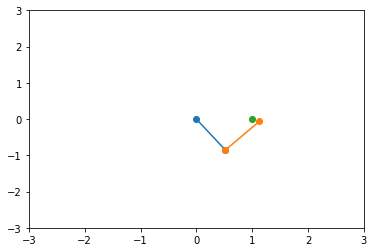

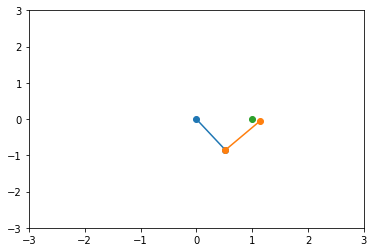

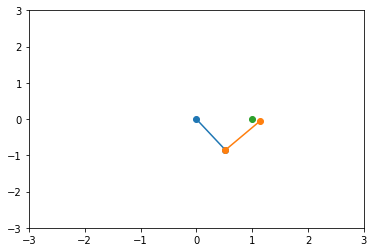

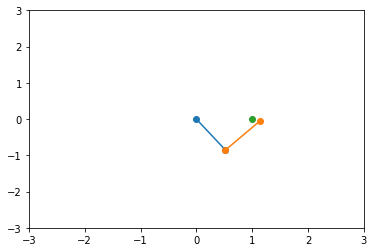

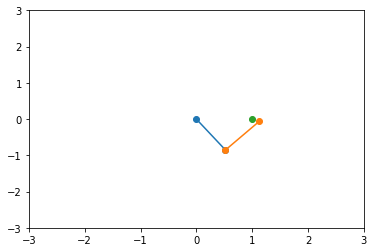

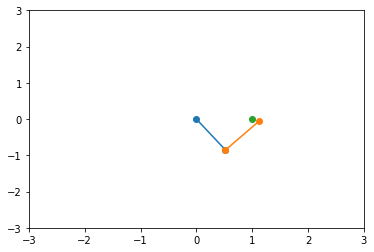

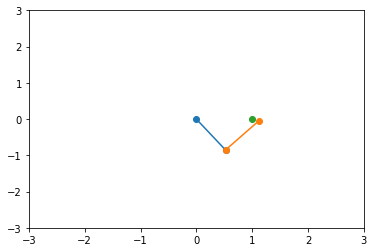

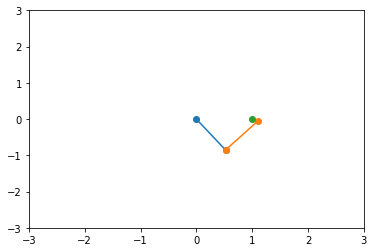

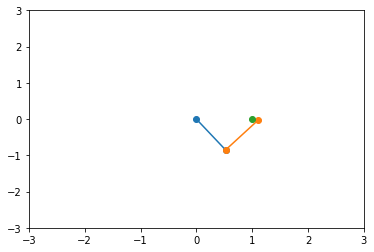

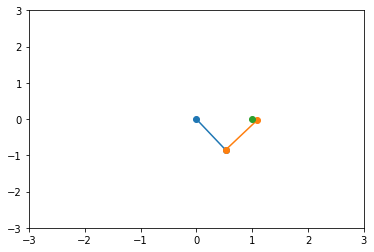

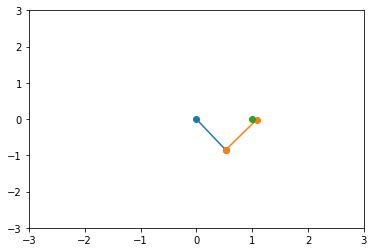

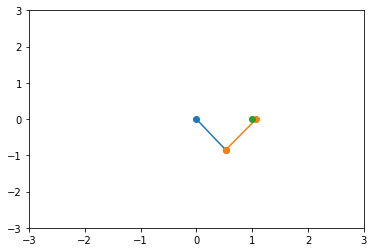

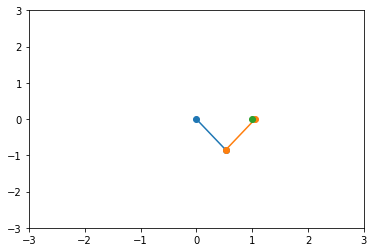

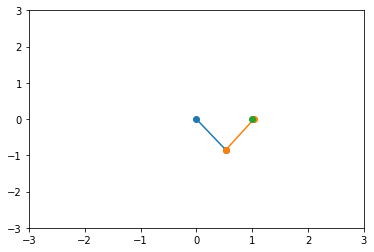

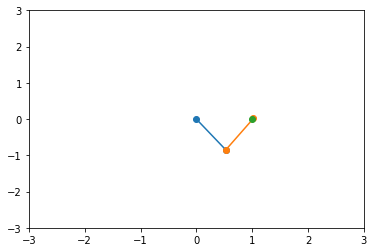

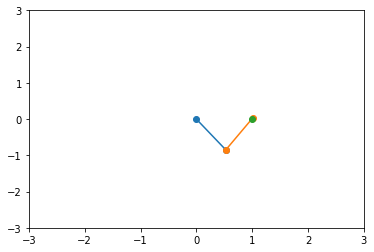

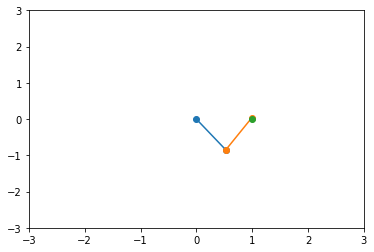

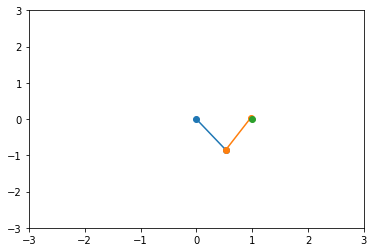

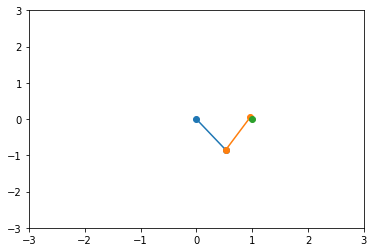

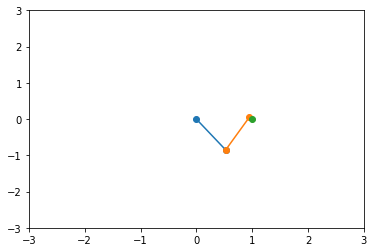

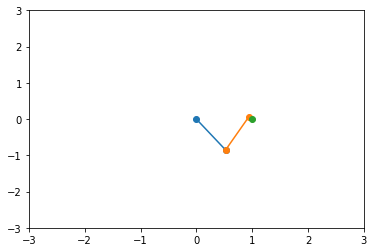

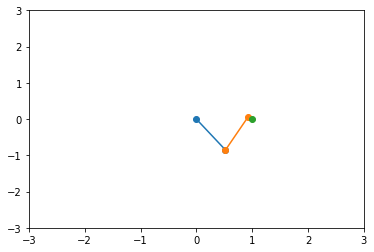

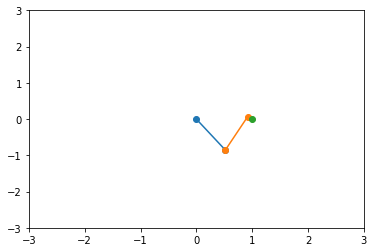

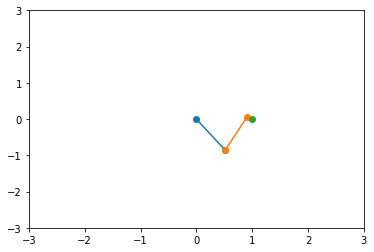

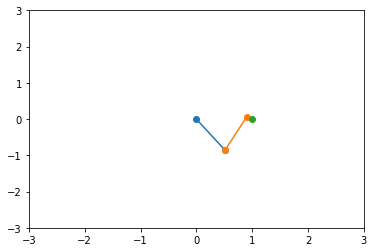

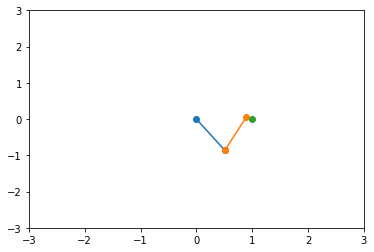

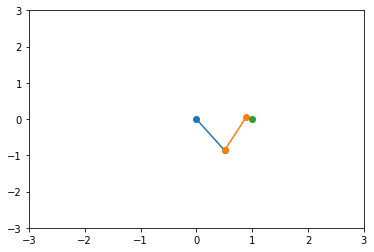

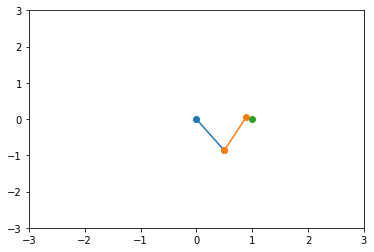

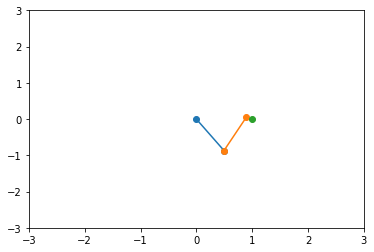

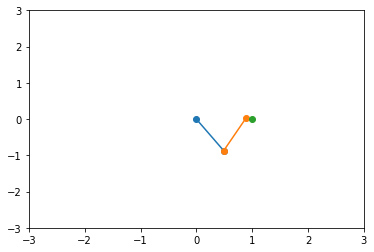

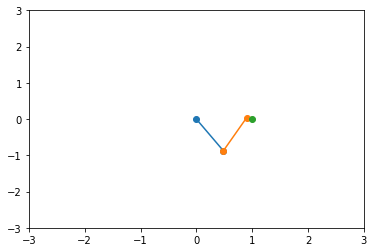

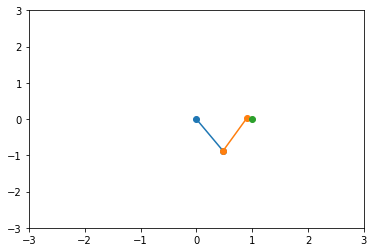

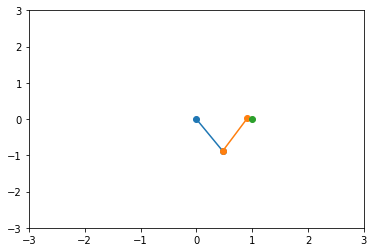

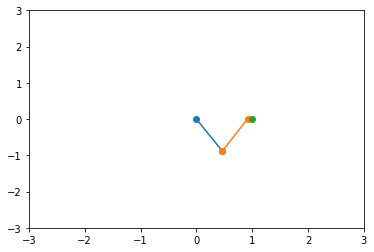

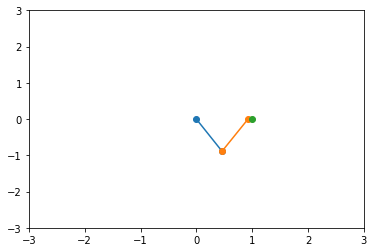

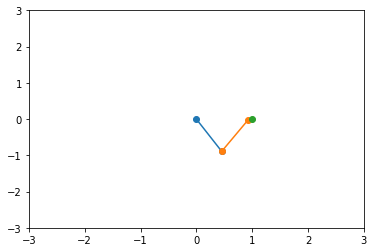

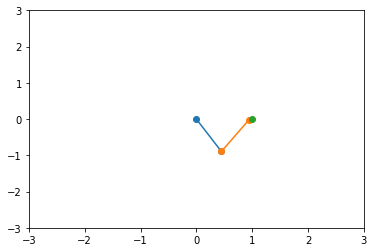

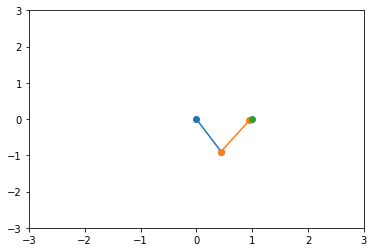

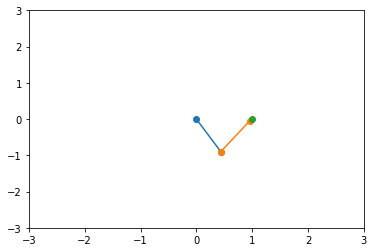

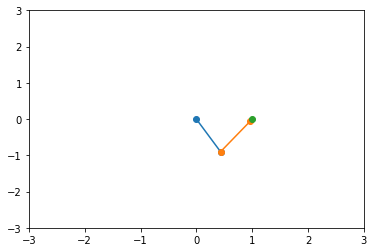

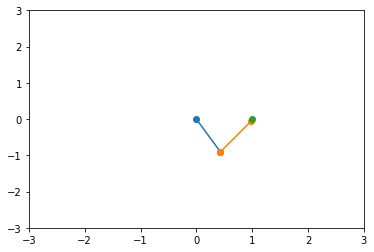

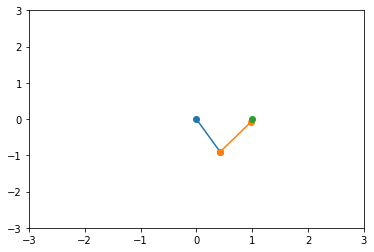

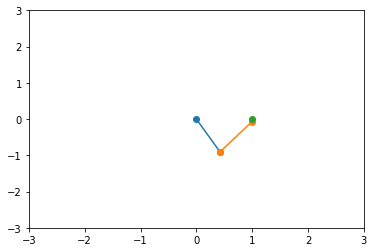

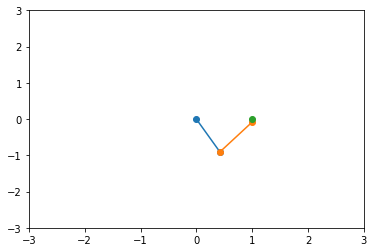

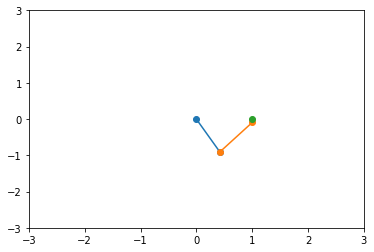

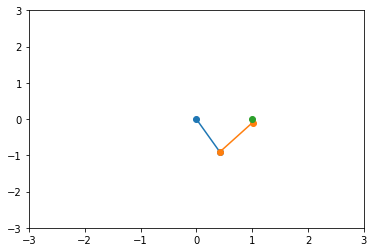

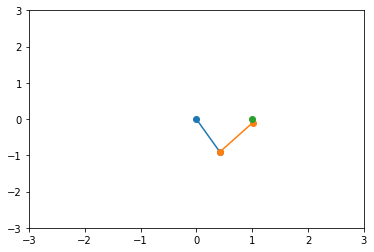

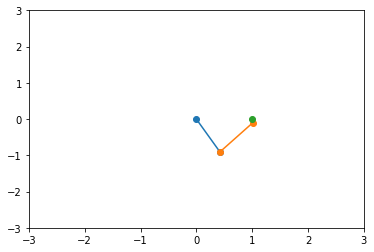

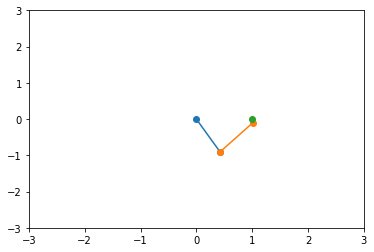

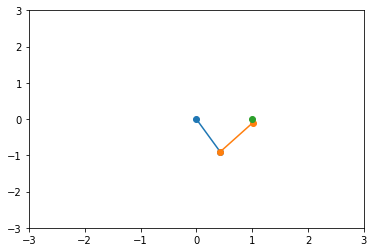

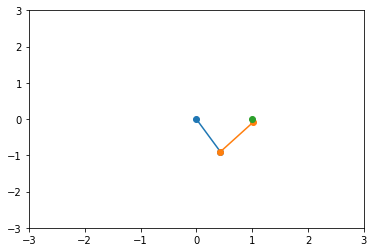

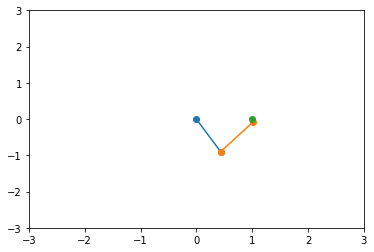

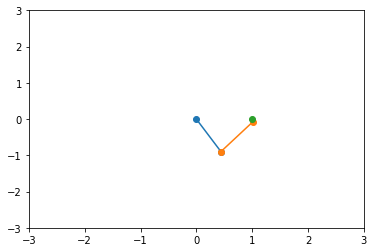

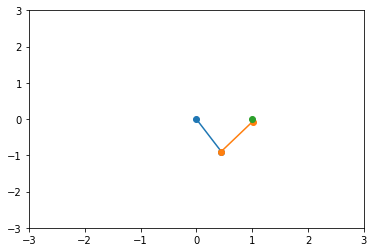

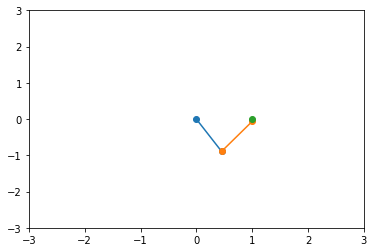

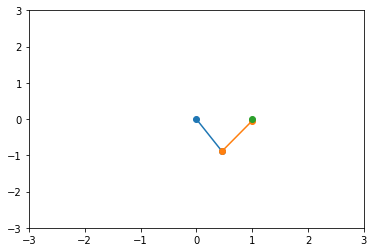

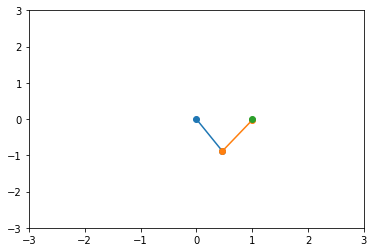

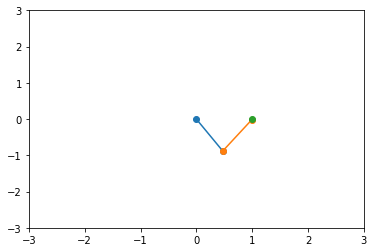

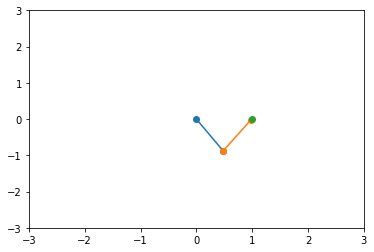

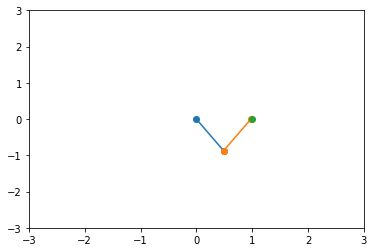

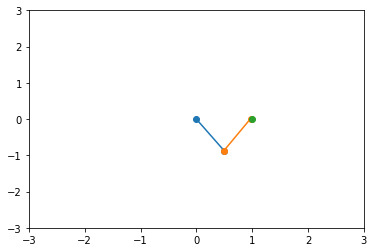

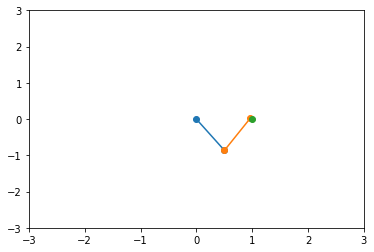

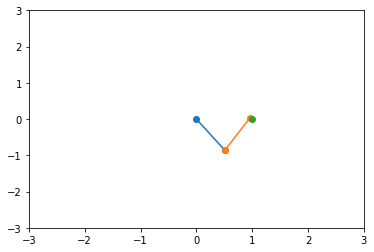

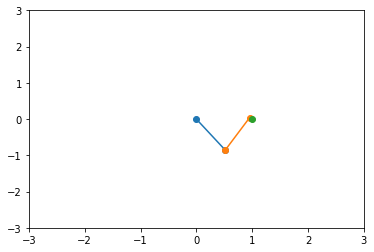

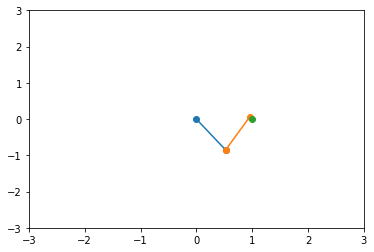

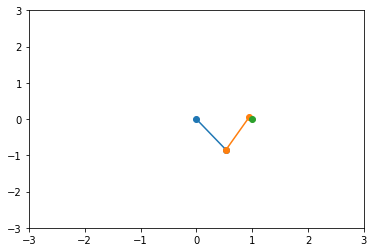

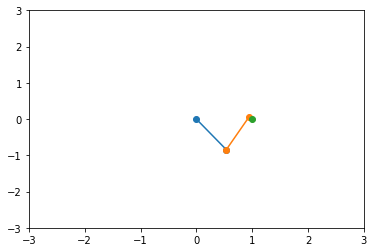

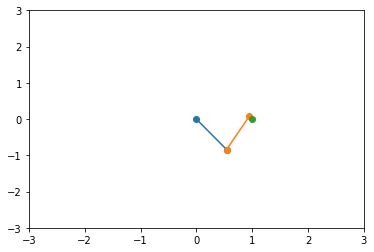

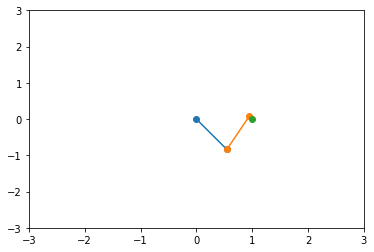

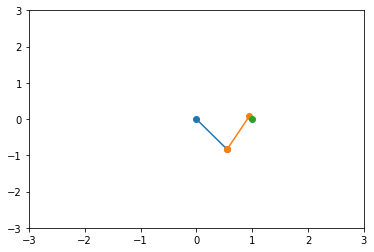

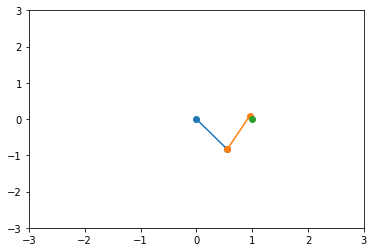

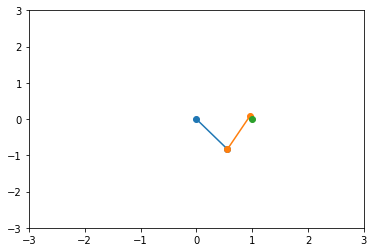

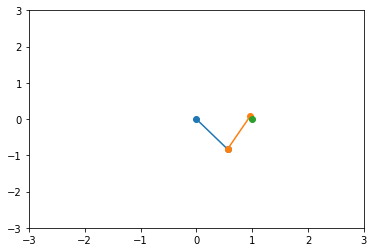

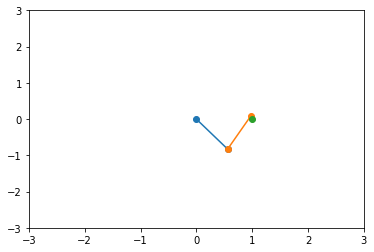

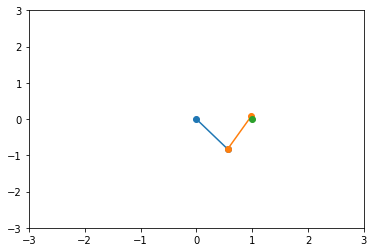

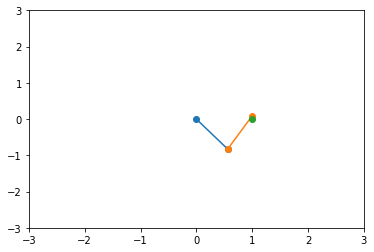

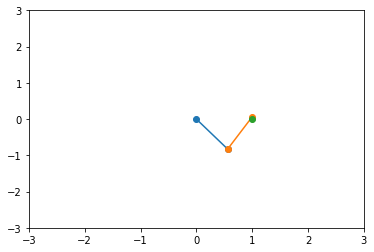

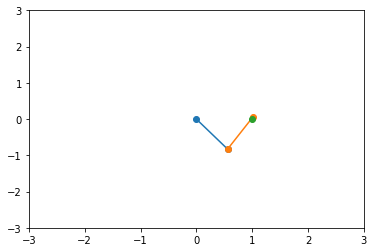

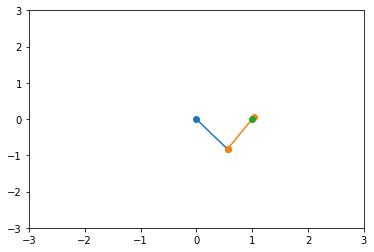

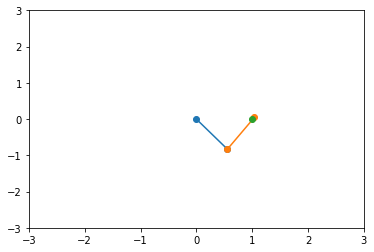

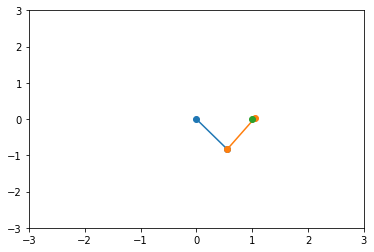

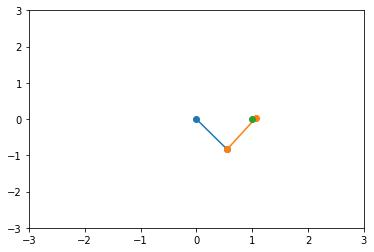

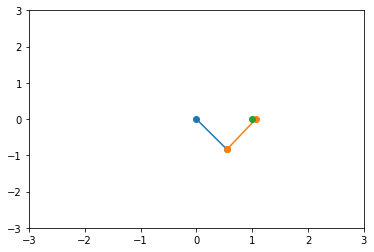

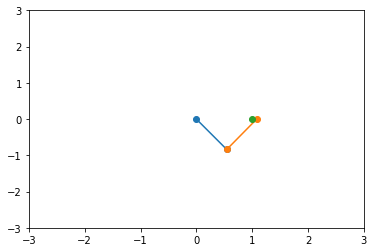

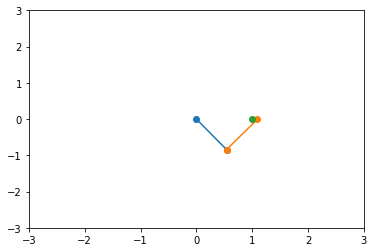

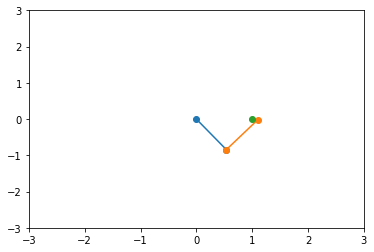

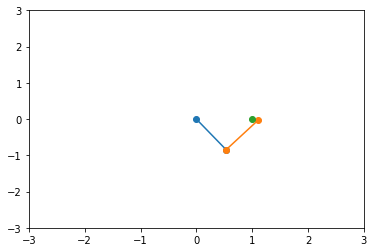

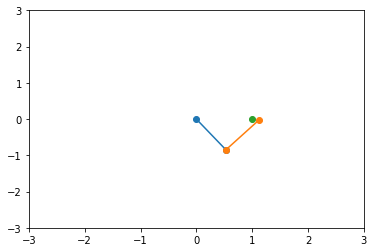

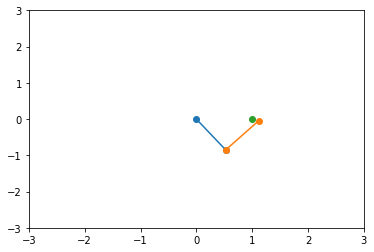

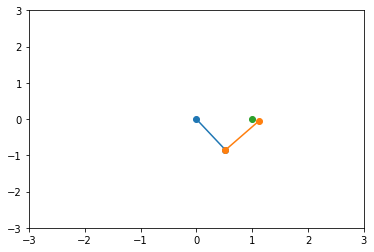

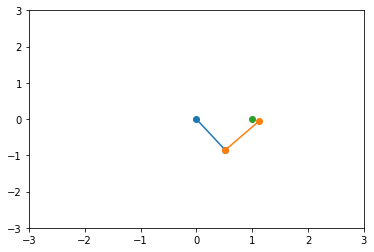

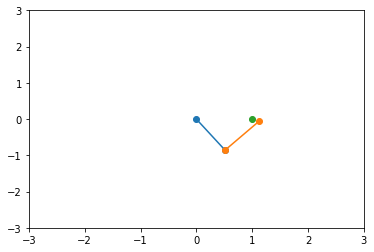

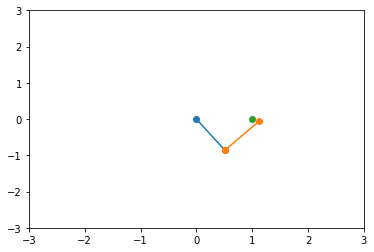

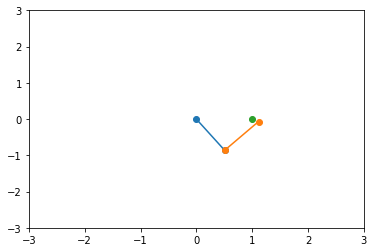

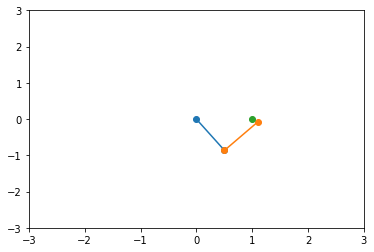

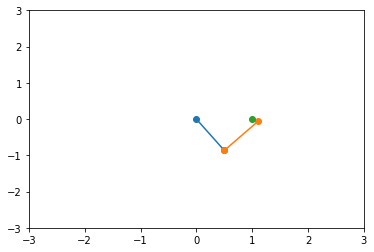

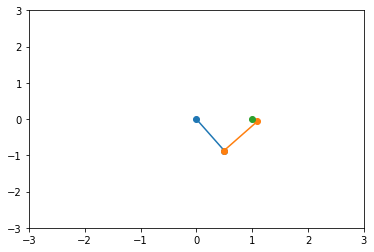

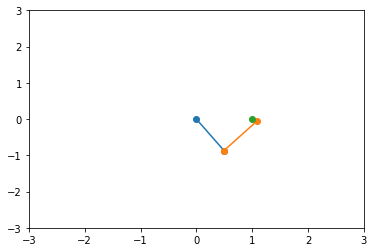

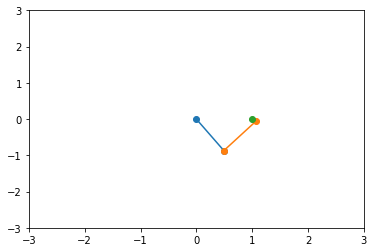

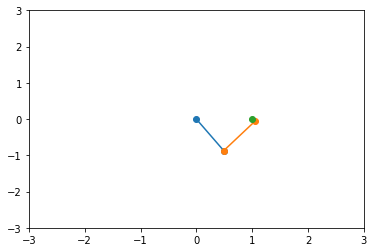

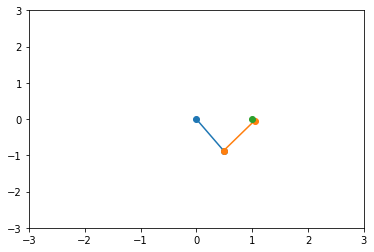

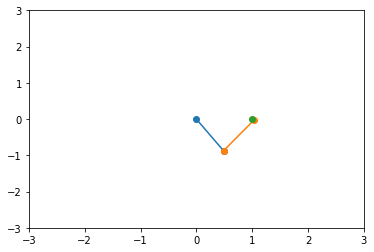

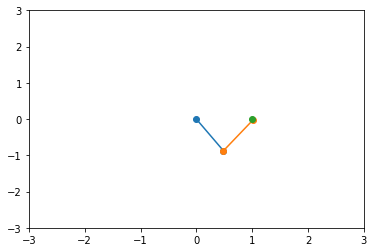

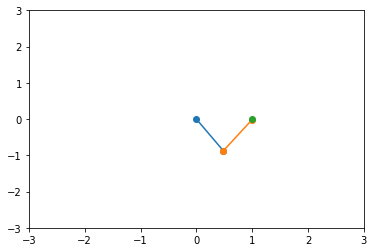

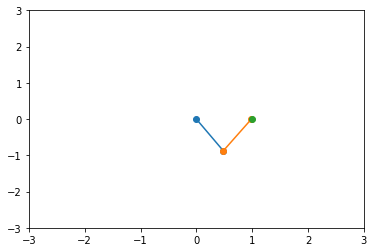

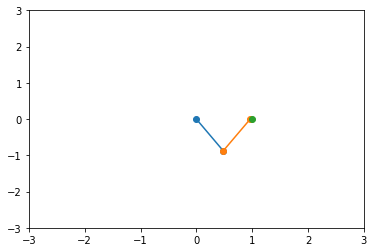

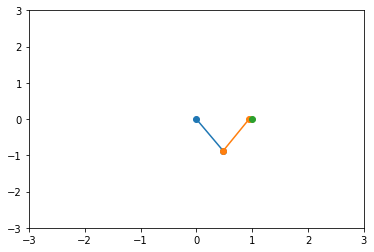

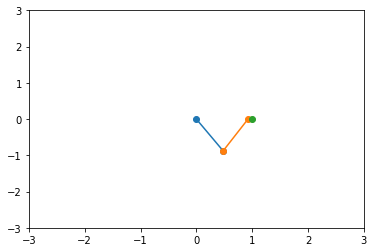

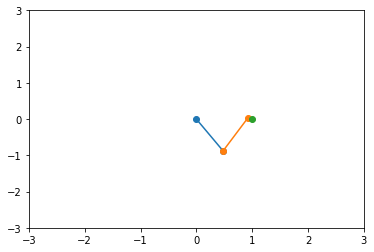

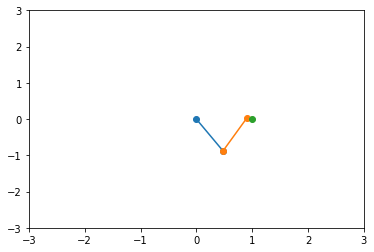

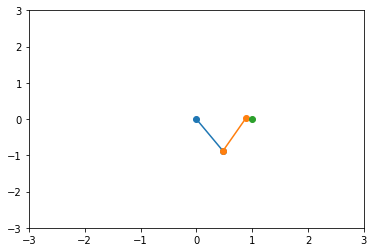

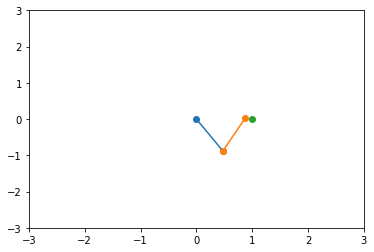

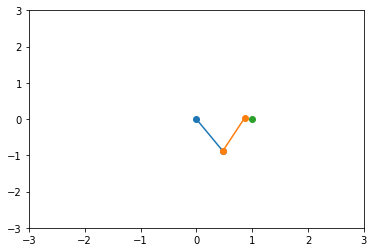

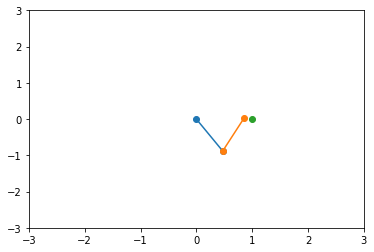

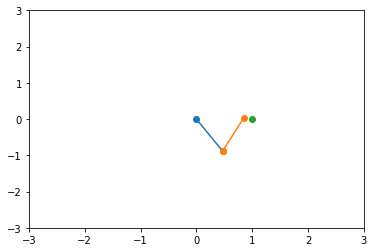

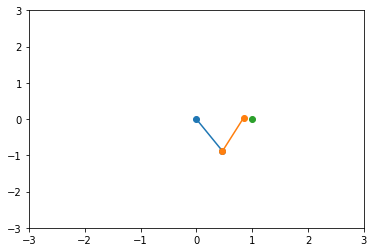

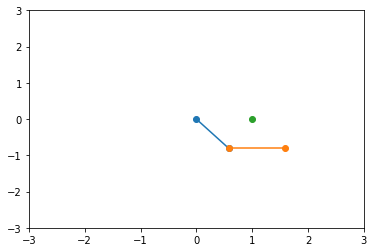

In [ ]:
import pandas as pd

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
import sympy as sp


def forward_kinematics(q1, q2, l1, l2):
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = l1 * np.cos(q1) + l2 * np.cos(q2)  # l2*np.cos(q2+q1) will be second term if q2 measured from link1
    y2 = l1 * np.sin(q1) + l2 * np.sin(q2)  # l2*np.sin(q2+q1) will be second term if q2 measured from link1
    return x1, y1, x2, y2


def inverse_kinematics(x, y, l1, l2, elbow):  # elbow parameter = 1 or -1 for elbow down and up configurations
    D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
    if elbow == 1:
        D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    if elbow == -1:
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    return q1, q2


def animate2R(t, q1t, q2t):  # simplest animation function very similar to matlab
    x1 = np.zeros(np.size(q1t))
    x2 = np.zeros(np.size(q1t))
    y1 = np.zeros(np.size(q1t))
    y2 = np.zeros(np.size(q1t))
    for i in range(np.size(q1t)):
        plt.clf()  # clear screen
        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        # forward kinematics to get end points of both links
        x1[i] = l1 * np.cos(q1t[i])
        y1[i] = l1 * np.sin(q1t[i])
        x2[i] = x1[i] + l2 * np.cos(q2t[i])
        y2[i] = y1[i] + l2 * np.sin(q2t[i])
        plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
        plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-o')  # draw link2
        plt.plot([1],[0],'o')
        plt.pause(0.0001)
    plt.show()

#
# def inversedynamics(m1, m2, l1, l2, q1, q2, q1dot, q2dot, q1ddot, q2ddot):
#     # g = 0 in case of robot in horizontal plane
#     g = 9.81
#     tau1 = (m1 * (l1 ** 2) + m2 * (l1 ** 2 + l1 * l2 * np.cos(q2 - q1))) * q1ddot + m2 * (
#                 l1 * l2 * np.cos(q2 - q1) + l2 ** 2) * q2ddot - m2 * l1 * l2 * np.sin(q2 - q1) * (
#                        q2dot ** 2 - q1dot ** 2) + (m1 + m2) * l1 * g * np.cos(q1) + m2 * g * l2 * np.cos(q2)
#     tau2 = m2 * (l1 * l2 * np.cos(q2 - q1)) * q1ddot + m2 * (l2 ** 2) * q2ddot + m2 * l1 * l2 * np.sin(
#         q2 - q1) * q1dot ** 2 + m2 * g * l2 * np.cos(q2)
#     return tau1, tau2

# xd yd is desired location about which spring action is required
def forwarddynamicscontrol(m1, m2, l1, l2, xd, yd, prev_state):
    # g = 0 in case of robot in horizontal plane
    g = 9.81
    q1 = prev_state[0][0]

    print("q1",q1)
    q2 = prev_state[1][0]
    print("q2",q2)
    q1dot = prev_state[2][0]
    q2dot = prev_state[3][0]
    d11 = (m1 * ((l1/2)** 2) + m2 * (l1 ** 2) + m1*(l1**2)/3)
    d12 = m2 * (l1 * (l2/2) * np.cos(q2 - q1))
    d21 = m2 * (l1 * (l2/2) * np.cos(q2 - q1))
    d22 = m2 * (l2/2 ** 2) +  m1*(l1**2)/3
    D = np.array([[d11, d12], [d21, d22]])
    C = np.array([[-m2 * l1 * (l2/2) * np.sin(q2 - q1) * ((q2dot) ** 2) ],
                  [m2 * l1 * (l2/2) * np.sin(q2 - q1) * (q1dot) ** 2]], dtype=float)
    V = np.array([[(m1*(l1/2)+m2*l1) * g * np.cos(q1)], [m2 * g * (l2/2) * np.cos(q2)]],
                 dtype=float)
    gain = np.array([[100,0],[0,100]])            ### GAIN MATRIX FOR STIFFNESS
    #x1,y1,x,y = forward_kinematics(np.pi/4,np.pi/4,l1,l2)
    q1d,q2d = inverse_kinematics(xd,yd,l1,l2,elbow)
    print(q1d,q2d)
    X = np.array([[q1],[q2]])
    Xd = np.array([[q1d],[q2d]])
    Qdot = np.array([[q1dot],[q2dot]])
    gain2 = np.array([[0,0],[0,0]])      # GAIN MATRIX FOR DAMPING
    tau = C+V+np.matmul(gain,Xd-X)-0*np.matmul(gain2,Qdot)
    detinv = (1 / ((D[0][0]) * (D[1][1]) - ((D[0][1]) * (D[1][0]))))
    di11 = detinv * D[1][1]
    di12 = -1 * detinv * D[0][1]
    di21 = -1 * detinv * D[1][0]
    di22 = detinv * D[0][0]
    Dinv = np.array([[di11, di12], [di21, di22]])
    # print(Dinv)
    sum = -C - V + tau
    qddot = np.matmul(Dinv, sum)
    qdot = np.array([[q1dot], [q2dot]])
    print(qdot)
    statedot = np.row_stack([qdot, qddot])
    return statedot


def runge_kutta_fourth_order(f, ut, prev_state, t0, tn, h, m1, m2, l1, l2):
    X = np.zeros([prev_state.shape[0], int((tn - t0) / h) + 1])
    X[:][0] = prev_state[:][0]
    t = t0
    i = 0
    time = np.zeros([1, int((tn - t0) / h) + 1])
    time[0][0] = t0
    while t <= tn:
        xd = ut[0][i]
        yd = ut[1][i]
        # print(prev_state)
        k1 = f(m1, m2, l1, l2, xd, yd, prev_state)
        t = t + h / 2
        k2 = f(m1, m2, l1, l2, xd, yd, (prev_state + (k1 * h / 2)))
        k3 = f(m1, m2, l1, l2, xd, yd, prev_state + (k2 * h / 2))
        t = t + h / 2
        k4 = f(m1, m2, l1, l2, xd, yd, prev_state + (k3 * h))
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x_new = prev_state + k * h
        # print(x_new)
        # store the result of integration for each time step as a column in X
        X[:, i] = x_new[:, 0]
        print(np.shape(x_new))
        i = i + 1
        print(np.shape(prev_state))
        prev_state = x_new

        # print("i",i)
    return X


def jacobianinv2R(q1, q2, xdot, ydot, xddot, yddot, l1, l2):
    Xdot = np.array([[xdot], [ydot]])
    Xddot = np.array([[xddot], [yddot]])
    J = np.array([[-l1 * np.sin(q1), -l2 * np.sin(q2)], [l1 * np.cos(q1), l2 * np.cos(q2)]])
    Jinv = np.linalg.inv(J)
    RE = np.array([[0, -1], [1, 0]])
    Qdot = np.matmul(Jinv, Xdot)
    A = (Xddot - np.matmul(np.matmul(RE, J), Qdot))
    Qddot = np.matmul(Jinv, A)
    q1dot = Qdot[0]
    q2dot = Qdot[1]
    q1ddot = Qddot[0]
    q2ddot = Qddot[1]
    return q1dot, q2dot, q1ddot, q2ddot

def circular_traj_slow(inverse_kinematics, jacobianinv2R, l1, l2, elbow, t):
    n = 10
    x = 1 + 0.5 * np.sin(n*t)
    y = 0.5 * np.cos(n*t)
    plt.plot(x, y)
    xdot = 0.5 *n* np.cos(t)
    ydot = -0.5 *n* np.sin(t)
    xddot = -0.5 *n*n* np.sin(t)
    yddot = -0.5 * n*n*np.cos(t)
    q1t = np.zeros(np.size(x))
    q2t = np.zeros(np.size(x))
    q1dott = np.zeros(np.size(x))
    q2dott = np.zeros(np.size(x))
    q1ddott = np.zeros(np.size(x))
    q2ddott = np.zeros(np.size(x))
    for i in range(np.size(x)):
        q1, q2 = inverse_kinematics(x[i], y[i], l1, l2, elbow)
        q1dot, q2dot, q1ddot, q2ddot = jacobianinv2R(q1, q2, xdot[i], ydot[i], xddot[i], yddot[i], l1, l2)
        q1t[i] = q1
        q2t[i] = q2
        q1dott[i] = q1dot
        q2dott[i] = q2dot
        q1ddott[i] = q1ddot
        q2ddott[i] = q2ddot
    return q1t, q2t, q1dott, q2dott, q1ddott, q2ddott

def torque_traj(inversedynamics, m1, m2, l1, l2, q1t, q2t, q1dott, q2dott, q1ddott, q2ddott):
    tau1t = np.zeros(np.size(q1t))
    tau2t = np.zeros(np.size(q1t))
    for i in range(np.size(q1t)):
        q1 = q1t[i]
        q2 = q2t[i]
        q1dot = q1dott[i]
        q2dot = q2dott[i]
        q1ddot = q1ddott[i]
        q2ddot = q2ddott[i]
        tau1, tau2 = inversedynamics(m1, m2, l1, l2, q1, q2, q1dot, q2dot, q1ddot, q2ddot)
        tau1t[i] = tau1
        tau2t[i] = tau2
    return tau1t, tau2t

# def circular_traj_fast(t):
#   x = 1 + 0.5*np.sin(2*t)
#   y = 0.5*np.cos(2*t)
#   xdot = np.cos(t)
#   ydot = -np.sin(t)
#   q1t = np.zeros(np.size(x)[0],np.size(x)[1])
#   q2t = np.zeros(np.size(x)[0],np.size(x)[1])
#   q1dott = np.zeros(np.size(x)[0],np.size(x)[1])
#   q2dott = np.zeros(np.size(x)[0],np.size(x)[1])
#   return x,y,xdot,ydot

t = np.linspace(0,10,1001,endpoint=True)
l1 = 1
l2 = 1
elbow = 1
m1 = 1
m2 = 1
#q1t,q2t,q1dott,q2dott,q1ddott,q2ddott=circular_traj_slow(inverse_kinematics,jacobianinv2R,l1,l2,elbow,t)
#print(q1t,q2t)
#print(q2t)
xd = np.ones(np.size(t))
yd = np.zeros(np.size(t))
qq1,qq2 = inverse_kinematics(1,0,l1,l2,elbow)
print(qq1,qq2)
ut = np.row_stack([xd,yd])
prev_state = np.array([[qq1+0.1],[qq2+0.1],[0],[0]])
#print("PS",prev_state)
X= runge_kutta_fourth_order(forwarddynamicscontrol,ut,prev_state,0,10,0.01,m1,m2,l1,l2)

animate2R(t,X[0,:],X[1,:])
